# Case Fraude

Fraudes financeiras são atos ilícitos que visam obter benefícios financeiros indevidos por meio de engano, falsificação, manipulação ou omissão de informações. Essas ações têm o potencial de causar danos financeiros e reputacionais às vítimas, que podem ser pessoas físicas, empresas ou instituições públicas.

Para proteger o patrimônio, a reputação e a confiança dos envolvidos nas transações financeiras, é fundamental evitar fraudes financeiras. Além disso, a prevenção de fraudes financeiras ajuda a combater a lavagem de dinheiro, a corrupção, o terrorismo e outros crimes que ameaçam a segurança e an estabilidade da sociedade.

É necessário adotar controle interno, educação financeira, monitoramento e denúncia para evitar fraudes financeiras. Algumas dessas ações incluem:

* Verifique se os documentos, as assinaturas e os dados cadastrais dos clientes são verdadeiros de acordo com as regras e procedimentos internos de uma instituição financeira.
* Usar senhas fortes e exclusivas, evitar compartilhar senhas com outras pessoas e alterá-las regularmente.
* Não abra e-mails, mensagens ou links suspeitos que possam conter phishing, vírus ou malware.
* Não fornecer dados pessoais, bancários ou financeiros por telefone, e-mail ou redes sociais sem verificar an identidade e an origem do solicitante
* Desconfie de ofertas extremamente vantajosas que prometem lucros garantidos, rápidos ou fáceis.
* Verifique se houve movimentações ou cobranças indevidas nos relatórios de investimentos, faturas de cartão de crédito e extratos bancários.
* Denunciar imediatamente qualquer suspeita ou ocorrência de fraude financeira aos órgãos competentes, como a polícia, o banco, o órgão regulador ou o serviço de proteção ao crédito.

Com um cientistas de dados em sua equipe a empresa poderá tomar medidas como:

* Examinar dados de várias fontes e formatos, como registros, documentos, transações, mídias sociais e dispositivos, entre outros, para encontrar padrões, anomalias, comportamentos e relações que possam indicar an ocorrência ou a tentativa de fraude.
* Desenvolver e aplicar modelos estatísticos, algoritmos e técnicas de aprendizado de máquina para detectar e prever eventos fraudulentos com dados históricos e em tempo real.
* Construir e executar soluções de inteligência artificial, como sistemas de pontuação, alertas, recomendações e bloqueios, para automatizar e otimizar o processo de prevenção de fraudes e reduzir os falsos positivos, os custos operacionais e os riscos legais.
* Os resultados das análises devem ser transmitidos de forma compreensível, visual e clara para ajudar os gestores, auditores, investigadores e autoridades competentes a tomar decisões e agir.

Como resultado, o cientista de dados é um profissional que ajuda a proteger o patrimônio, a legitimidade e a confiança das instituições financeiras e de seus clientes utilizando dados e análises para combater a fraude.

# Dataset

No Dataframe que iremos trabalhar, temos as seguintes informações:

* A pontuação de 1 a 10 são notas de um escritório de crédito que a empresa obteve para descobrir se o comprador é confiável ou outros dados anonimizados que não temos informações sobre o país: pais de compra
* Produto: produto que está sendo comprado no e-commerce
* A categoria_produto indica a categoria na qual esse produto se encaixa.
* Entrega_doc_1 a entrega_doc_3: Documentos necessários para fazer a conta. 0 = N = não forneceu nada. Y = 1 = entregou. Se estiver vazio, pense que não entregou
* Score_fraude_modelo é a pontuação que o modelo atual fornece. É a probabilidade de que essa compra seja um engano. A probabilidade de que o modelo seja fraudulento aumenta à medida que se aproxima de 100.
* Fraude: informações sobre se a compra foi falsa ou não. Foi adicionado após alguns dias para obter opiniões reais sobre se era fraudulento ou não. 0 se não era fraudulento e 1 se era.

Informações relevantes:

* Para esse caso, os dados são propositalmente anonimizados.
* Você precisará fazer algumas suposições para resolvê-lo. Verifique todas as suposições que fazer.
* Sabemos que a empresa perde cem por cento do valor de cada pagamento aprovado corretamente, enquanto perdemos cem por cento do valor de cada fraude aprovada.

# 1 - Importando dados

In [1]:
# Bibliotecas padrão para manipulação dos dados
import pandas as pd
import numpy as np
import datetime as dt
import mlflow
import mlflow.lightgbm

# Bibliotecas estatisticas e matematicas
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, chi2_contingency, kstest, ks_2samp, mannwhitneyu
from scipy.stats import shapiro
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Análise dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Machine Learning
from sklearn.model_selection import (train_test_split, cross_val_score, StratifiedKFold, 
                                     GridSearchCV, KFold, RandomizedSearchCV)
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             ConfusionMatrixDisplay, roc_curve, auc, accuracy_score,
                             precision_score, recall_score, f1_score)
from sklearn.feature_extraction.text import TfidfVectorizer
from category_encoders import TargetEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import shap
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

c:\Users\winic\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_original = pd.read_csv('C:/Users/winic/Documents/Dados/dados-dados.csv')

In [3]:
# Criando uma cópia para casos de fazer alterações, ainda teremos o principal
df = df_original.copy()

# 2 - Análise Explratória dos dados (EDA)

In [4]:
# Verificando as 5 primeiras colunas para nos familiarizarmos com os dados
df.head()

score_1  score_2    score_3  score_4   score_5  score_6 pais  score_7  \
0        4   0.7685   94436.24     20.0  0.444828      1.0   BR        5   
1        4   0.7550    9258.50      1.0  0.000000     33.0   BR        0   
2        4   0.7455  242549.09      3.0  0.000000     19.0   AR       23   
3        4   0.7631   18923.90     50.0  0.482385     18.0   BR       23   
4        2   0.7315    5728.68     15.0  0.000000      1.0   BR        2   

                                             produto categoria_produto  \
0  Máquininha Corta Barba Cabelo Peito Perna Pelo...       cat_8d714cd   
1  Avental Descartavel Manga Longa  - 50 Un. Tnt ...       cat_64b574b   
2  Bicicleta Mountain Fire Bird Rodado 29 Alumini...       cat_e9110c5   
3  Caneta Delineador Carimbo Olho Gatinho Longo 2...       cat_d06e653   
4           Resident Evil Operation Raccoon City Ps3       cat_6c4cfdc   

    score_8  score_9  score_10  entrega_doc_1 entrega_doc_2 entrega_doc_3  \
0  0.883598    240.0     102.0              1           NaN             N   
1  0.376019   4008.0       0.0              1             Y             N   
2  0.516368   1779.0      77.0              1           NaN             N   
3  0.154036   1704.0    1147.0              1           NaN             Y   
4  0.855798   1025.0     150.0              1           NaN             N   

           data_compra  valor_compra  score_fraude_modelo  fraude  
0  2020-03-27 11:51:16          5.64                   66       0  
1  2020-04-15 19:58:08        124.71                   72       0  
2  2020-03-25 18:13:38        339.32                   95       0  
3  2020-04-16 16:03:10          3.54                    2       0  
4  2020-04-02 10:24:45          3.53                   76       0

In [5]:
# Verificando o tamanho do Dataframe
print(f'Entradas: ', df.shape[0])
print(f'Variáveis: ', df.shape[1])

Entradas:  150000
Variáveis:  20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

## 2.1 - Valores ausentes

A presença de valores ausentes em um Dataframe pode comprometer a precisão e a robustez dos modelos de machine learning utilizados para identificar atividades fraudulentas.

Tá, mas por que a verificação de valores ausentes é tão importante?

Existem vários motivos, vou exemplificar apenas 3, para a explicação não ficar tão longa:

1. Apresenta um bom impacto na aualidade dos modelos, podendo introduzir viéses, gerando resultados imprecisos aumentando a taxa de falsos positivos ou falsos negativos. Além disso a maioria dos modelos de machine learning só funcionam corretamente com os dados completos.


2. Pode dificultar nas interpretações da análise exploratória, impedindo que padrões e relações importantes sejam identificadas.


3. Nos leva a tomar decisões errôneas, modelos com dados incompletos podem levar a decisões equivocadas, o que gera uma grande perda financeira para as empresas. Em especial para a detecção de fraudes, modelos imprecisos podem comprometer a confiança dos clientes, confiança essa que é crucial para a reputação de qualquer empresa.

Agora que você entendeu a importância de verificar valores ausentes, que tal entendermos como lidar com esses valres?

Existem muitas técnicas para lidar com valores ausentes, e cada uma tem vantagens e desvantagens especificas, algumas dessas técnicas são:

* Remoção: A eliminação de valores ausentes é uma medida fácil, porém pode resultar na perda de dados relevantes, principalmente se existirem muitos valores ausentes.
* Imputação: Consiste em preencher os valores ausentes com valores estimados. Algumas das técnicas de imputação mais comuns são:
  * Média, mediana ou moda: Adequada para dados numéricos.
  * Imputação por valor mais frequente: Adequada para dados categóricos.
  * Imputação por modelo: Utiliza modelos de machine learning para prever os valores ausentes.
  * K-Nearest Neighbors (KNN): Utiliza os k vizinhos mais próximos para estimar o valor ausente.
* Criação de uma nova categoria: Para variáveis categóricas, cria-se uma nova categoria que irá representar os valores ausentes.
* Utilização de algoritmos que lidam com dados faltantes: Alguns algoritmos, como as árvores de decisão e as redes neurais, são capazes de lidar com valores ausentes.

In [7]:
# Verificando a quantidade de valores faltantes
df.isnull().sum()

score_1                     0
score_2                 12984
score_3                 12984
score_4                   365
score_5                     0
score_6                    11
pais                      194
score_7                     0
produto                     0
categoria_produto           0
score_8                     0
score_9                    11
score_10                  365
entrega_doc_1               0
entrega_doc_2          108857
entrega_doc_3               0
data_compra                 0
valor_compra                0
score_fraude_modelo         0
fraude                      0
dtype: int64

In [8]:
# Verificando a porcentagem dos valores faltantes
(df.isnull().sum()/df.shape[0]*100).round(3)

score_1                 0.000
score_2                 8.656
score_3                 8.656
score_4                 0.243
score_5                 0.000
score_6                 0.007
pais                    0.129
score_7                 0.000
produto                 0.000
categoria_produto       0.000
score_8                 0.000
score_9                 0.007
score_10                0.243
entrega_doc_1           0.000
entrega_doc_2          72.571
entrega_doc_3           0.000
data_compra             0.000
valor_compra            0.000
score_fraude_modelo     0.000
fraude                  0.000
dtype: float64

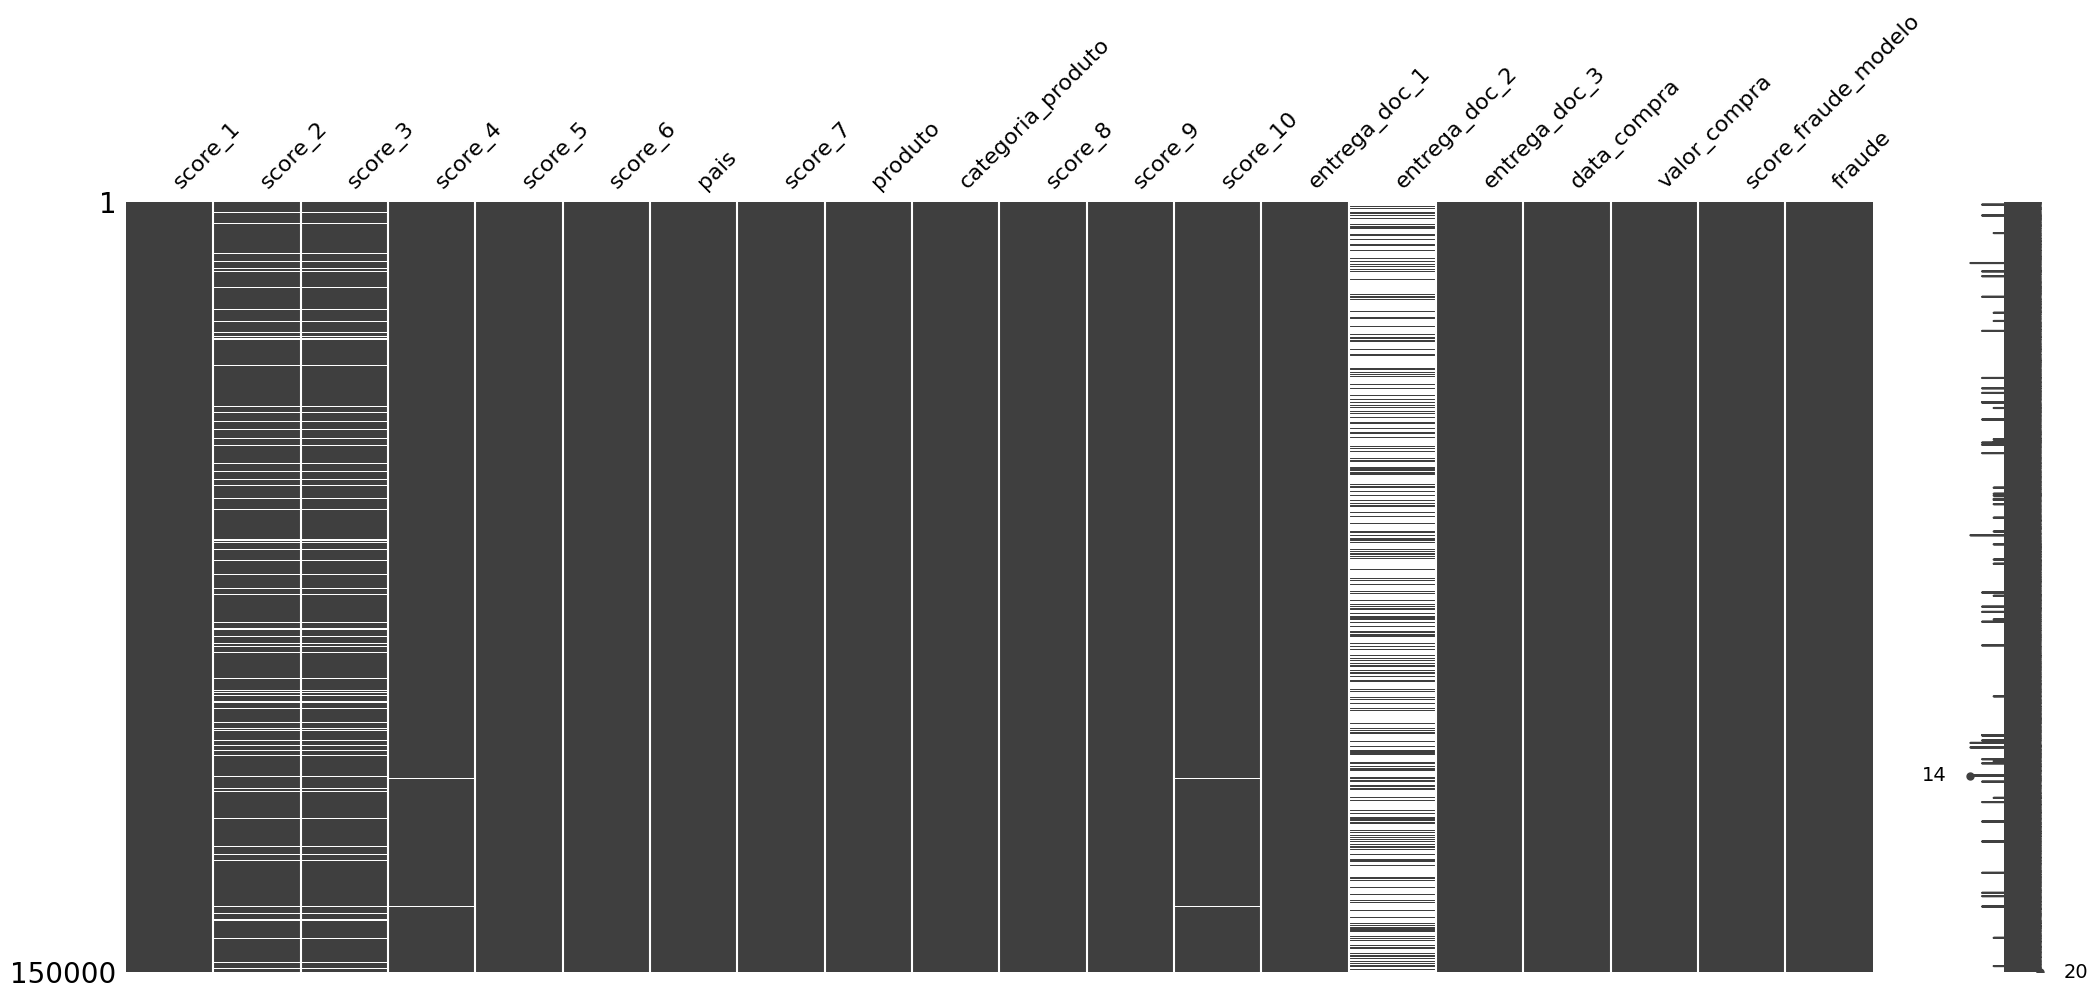

In [9]:
missingno.matrix(df);

É evidente que a variável entrega_doc_2 apresenta uma grande quantidade de valores ausentes, mas essa falta de informação pode ser um bom indicador para detectar possíveis fraudadores. Tendo isso em mente, mais adiante, como explicado anteriormente iremos fazer a criação de uma nova categoria transformando essa variável em uma coluna booleana, na qual os clientes que não entregaram os documentos serão representados por 0 e os que entregaram por 1.

## 2.2 - Estatistica Descritiva

In [10]:
# Seleciona apenas as colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Faz um describe apenas nas colunas numéricas
df_numerico.describe()


score_1        score_2       score_3        score_4  \
count  150000.000000  137016.000000  1.370160e+05  149635.000000   
mean        3.705407       0.728115  2.604451e+05      21.677669   
std         0.753206       0.132943  8.464361e+05      20.062146   
min         1.000000       0.000000  1.600000e-01       0.000000   
25%         4.000000       0.678400  9.679915e+03       2.000000   
50%         4.000000       0.755500  4.371165e+04      14.000000   
75%         4.000000       0.806500  1.454436e+05      50.000000   
max         4.000000       1.000000  1.387874e+07      50.000000   

             score_5        score_6        score_7        score_8  \
count  150000.000000  149989.000000  150000.000000  150000.000000   
mean        0.220641      51.169352      14.193513       0.497532   
std         2.434995     709.472904      14.161216       0.288348   
min         0.000000      -5.000000       0.000000       0.000004   
25%         0.000000       1.000000       3.000000       0.246819   
50%         0.104875       8.000000       9.000000       0.495990   
75%         0.282938      33.000000      21.000000       0.746508   
max       833.333333  145274.000000      58.000000       0.999995   

             score_9       score_10  entrega_doc_1   valor_compra  \
count  149989.000000  149635.000000  150000.000000  150000.000000   
mean     2305.409403     299.969579       0.902353      43.523134   
std      1712.379601     321.075806       0.296837      91.557888   
min         0.000000       0.000000       0.000000       0.020000   
25%       910.000000      42.000000       1.000000       9.380000   
50%      1937.000000     193.000000       1.000000      20.610000   
75%      3445.000000     459.000000       1.000000      40.692500   
max      7544.000000    2225.000000       1.000000    3696.350000   

       score_fraude_modelo         fraude  
count        150000.000000  150000.000000  
mean             48.066240       0.050000  
std              28.995122       0.217946  
min               0.000000       0.000000  
25%              23.000000       0.000000  
50%              48.000000       0.000000  
75%              73.000000       0.000000  
max             100.000000       1.000000

score_1 e score_2:

* A média do score_1 é de aproximadamente 3.71, com um desvio padrão de 0.75.
* A média do score_2 é de aproximadamente 0.73, com um desvio padrão de 0.13.
* Ambos os atributos parecem ter uma distribuição próxima de uma distribuição normal, pois a média e a mediana (valor mediano) estão próximas.

score_3 e score_4:

* O score_3 tem uma média de cerca de 260.445 e um desvio padrão de aproximadamente 846.436, o que indica uma alta variabilidade nos scores. O valor mínimo é 0.16 e o valor máximo é 13878740, o que mostra uma grande amplitude na distribuição. Com o valor do terceiro quartil sendo 145443.6, mostrando que 75% dos clientes têm score menor ou igual a esse valor, enquanto os 25% restantes têm scores muito maiores, o que pode indicar a presença de outliers.
* O score_4 tem uma média de cerca de 21.68 e um desvio padrão de aproximadamente 20.06.
* Ambos os atributos têm uma variabilidade considerável, como indicado pelo desvio padrão.

score_5 e score_6:

* O score_5 tem uma média de cerca de 0.22 e um desvio padrão de aproximadamente 2.43.
* O score_6 tem uma média de cerca de 51.17 e um desvio padrão de aproximadamente 709.47.
* Ambos os atributos têm valores que variam grandemente, como indicado pelo desvio padrão.

score_7, score_8, score_9 e score_10

* O score_7 tem uma média de cerca de 14.19 e um desvio padrão de aproximadamente 14.16.
* O score_8 tem uma média de cerca de 0.50 e um desvio padrão de aproximadamente 0.29.
* O score_9 tem uma média de cerca de 2305.41 e um desvio padrão de aproximadamente 1712.38.
* O score_10 tem uma média de cerca de 300.97 e um desvio padrão de aproximadamente 321.08.
* Os quatro atributos possuem valores que variam em um intervalo bastante apertado, próximo ao valor da média.

Entrega de Documentos (entrega_doc_1)

* A maioria dos compradores entregou o primeiro documento (média = 0.902), com um desvio padrão relativamente baixo de 0.297.
* Valores de min de 0 e max de 1 indicam que essa variável é binária.

Valor da Compra (valor_compra)

* O valor da compra varia muito um desvio padrão de 91.56, com um valor máximo de 3696.35.
* A mediana (50% = 20.61) é bem menor que a média de 43.52, indicando uma distribuição assimétrica, possivelmente com outliers muito altos.

Score do Modelo de Fraude (score_fraude_modelo)

* A média de fraude é de 48.07%, com um desvio padrão de 28.99%, sugerindo uma ampla distribuição das pontuações.
* Valores vão de 0 a 100, mostrando uma escala completa de probabilidades de fraude.

Fraude (fraude)

* Apenas 5% das transações são fraudulentas, devido a média de 0.05, com um desvio padrão de 0.218.
* A maioria das transações não é fraudulenta (max = 1).

Conclusões:

* Distribuição de Fraude: Com uma média de fraude em 5%, a maior parte das transações não é fraudulenta. Isso pode indicar a necessidade de um modelo altamente preciso para detectar essa minoria de fraudes.
* Correlação com Score de Fraude: Será interessante analisar a correlação entre as pontuações de crédito e o score_fraude_modelo para identificar possíveis padrões.

Quantidade de não fraudulentas: 142500
Quantidade de fraudulentas: 7500


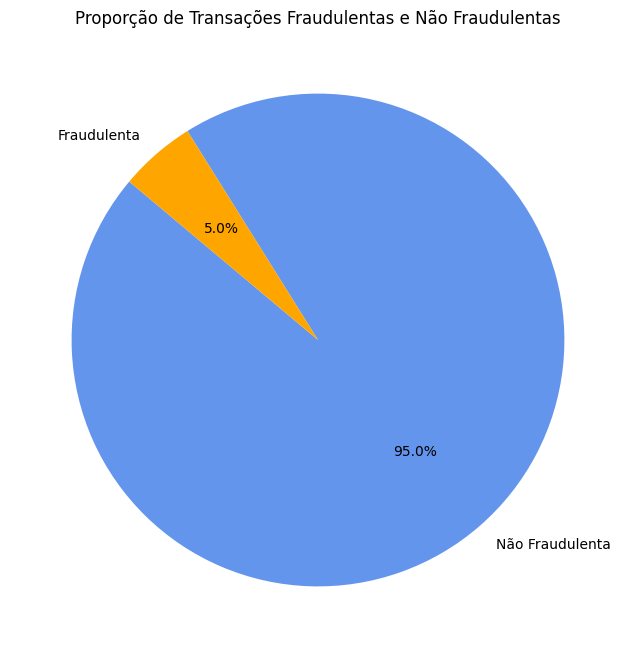

In [11]:
# Contaando a quantidade de fraudes e não fraudes
fraud_counts = df['fraude'].value_counts()

# Imprimindo a quantidade de cada
print(f"Quantidade de não fraudulentas: {fraud_counts[0]}")
print(f"Quantidade de fraudulentas: {fraud_counts[1]}")

# Criando o gráfico de pizza
labels = ['Não Fraudulenta', 'Fraudulenta']
sizes = [fraud_counts[0], fraud_counts[1]]
colors = ['CornflowerBlue', 'orange']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
plt.title('Proporção de Transações Fraudulentas e Não Fraudulentas')
plt.show()

Como visto na estatistica descritiva, apenas 5% dos dados são de transações fraudulentas.

Para sabermos se a proporção de fraudes de 5% se estende para uma população maior, iremos usar um intervalo de confiança para proporções. Esse intervalo nos ajudará a estimar a faixa na qual a verdadeira proporção de fraudes na população se encontra, com um nível de confiança de 99%.

Passos para Calcular o Intervalo de Confiança para Proporções
1. Calcular a Proporção Observada:
* Proporção de fraudes no seu dataset.

2. Calcular o Intervalo de Confiança:
* Usar a fórmula do intervalo de confiança para proporções.

In [12]:
# n: Total de transações
# x: Número de fraudes identificadas
n = len(df)  # Total de transações
x = sum(df['fraude'])  # Número de fraudes identificadas
p_hat = x / n  # Proporção observada de fraudes
alpha = 0.01  # Nível de significância para um intervalo de confiança de 95%

# Calcular o intervalo de confiança
ci_low, ci_upp = sm.stats.proportion_confint(count=x, nobs=n, alpha=alpha, method='normal')

print(f"Proporção Observada de Fraudes: {p_hat}")
print(f"Intervalo de Confiança de 99%: [{ci_low}, {ci_upp}]")

Proporção Observada de Fraudes: 0.05
Intervalo de Confiança de 99%: [0.04855049988260664, 0.05144950011739337]


A proporção observada de fraudes é exatamente 5%. O intervalo de confiança de 99% [0.0486, 0.0514] inclui 5%, indicando que a proporção de fraudes no dataset é consistente com uma proporção de 5% na população maior. Além disso, o intervalo de confiança estreito demonstra que a estimativa de 5% é precisa e confiável, com uma faixa muito pequena em torno da proporção observada.



## 2.3 - Pais

In [13]:
df.pais.unique()

array(['BR', 'AR', 'UY', 'US', 'GB', nan, 'SE', 'FR', 'MX', 'RU', 'CL',
       'CO', 'AU', 'ES', 'IT', 'PT', 'AD', 'CA', 'GE', 'EC', 'DE', 'CR',
       'PY', 'BE', 'KR', 'HN', 'NI', 'GR', 'CH', 'NZ', 'AE', 'IN', 'PR',
       'BO', 'NL', 'CN', 'PE', 'TR', 'BS', 'PA', 'DO', 'EG', 'GH', 'PH',
       'UA', 'FI', 'TW', 'NO', 'LB', 'IL', 'JP', 'ZA'], dtype=object)

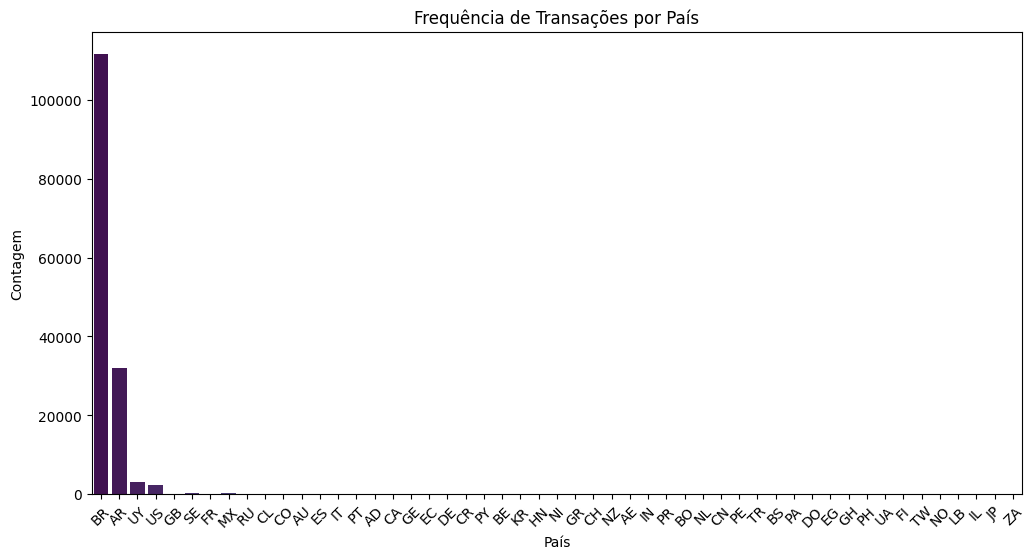

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pais', data=df, palette='viridis')
plt.title('Frequência de Transações por País')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

Como temos muitos países com um número muito baixo de transações, vamos focar nossa análise e modelagem apenas nas transações realizadas no Brasil. Isso garantirá uma base de dados mais robusta e significativa para desenvolver nosso modelo preditivo.

In [15]:
# Filtrando o DataFrame para transações no Brasil
df = df[df['pais'] == 'BR']

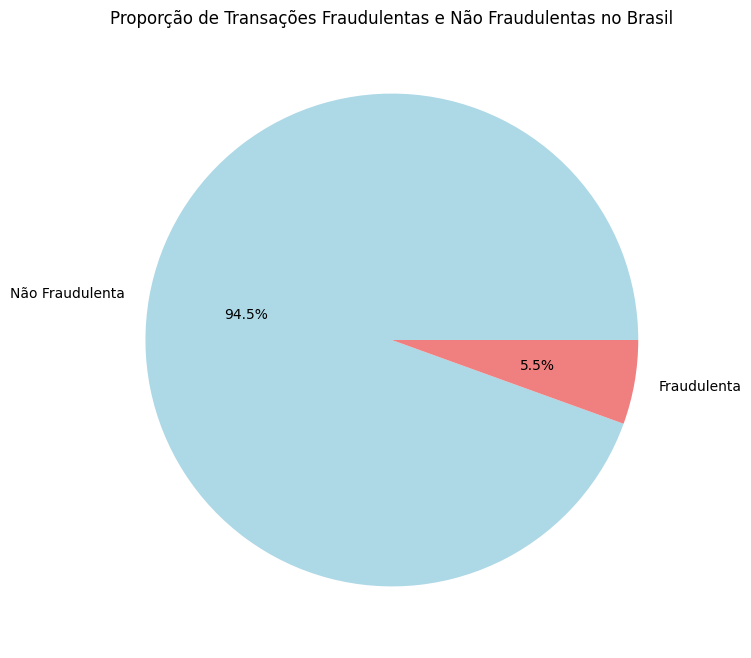

In [16]:
# Contando a quantidade de fraudes e não fraudes no Brasil
fraud_counts_brasil = df['fraude'].value_counts()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts_brasil, labels=['Não Fraudulenta', 'Fraudulenta'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proporção de Transações Fraudulentas e Não Fraudulentas no Brasil')
plt.show()

In [17]:
# n: Total de transações
# x: Número de fraudes identificadas
n = len(df)  # Total de transações
x = sum(df['fraude'])  # Número de fraudes identificadas
p_hat = x / n  # Proporção observada de fraudes
alpha = 0.01  # Nível de significância para um intervalo de confiança de 95%

# Calcular o intervalo de confiança
ci_low, ci_upp = sm.stats.proportion_confint(count=x, nobs=n, alpha=alpha, method='normal')

print(f"Proporção Observada de Fraudes: {p_hat}")
print(f"Intervalo de Confiança de 99%: [{ci_low}, {ci_upp}]")

Proporção Observada de Fraudes: 0.05520120399899667
Intervalo de Confiança de 99%: [0.053440548252811616, 0.05696185974518172]


## 2.4 - Score

### 2.4.1 - Score 1

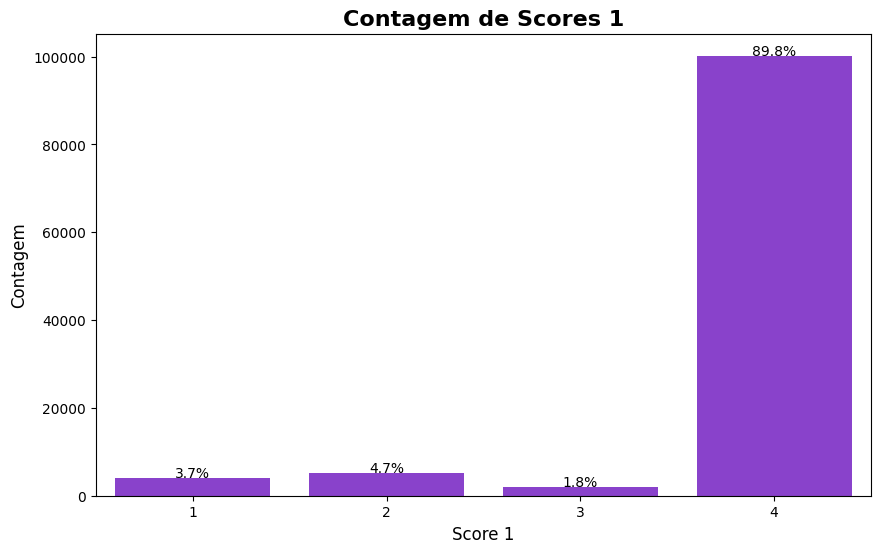

In [18]:
# Criando o countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='score_1', color='BlueViolet')

# Calculando as porcentagens e adicionando rótulos
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/total*100),
            ha="center") 

# Personalizando o gráfico
plt.title('Contagem de Scores 1', fontsize=16, fontweight='bold')
plt.xlabel('Score 1', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

# Mostrando o gráfico
plt.show()

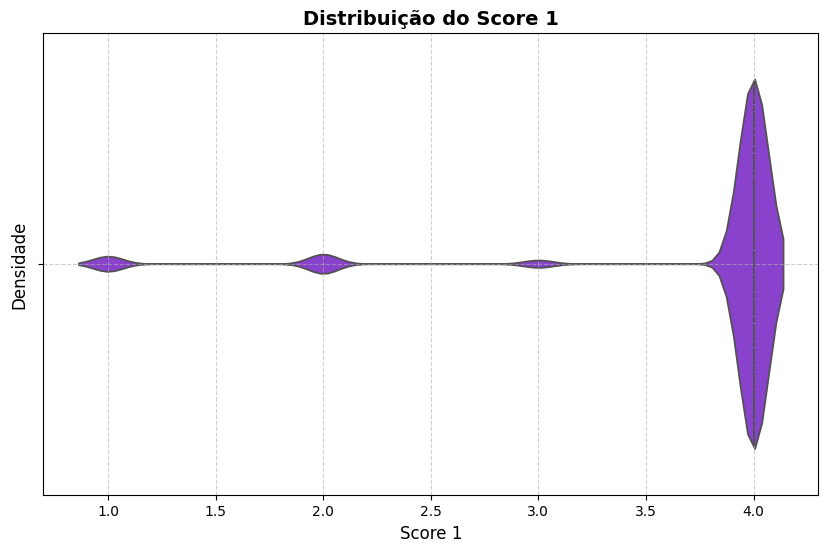

In [19]:
# Criando o violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="score_1",
    y=None,  # Sem necessidade de variável no eixo y para violin plot
    data=df,
    color='BlueViolet',
    inner='quartile',  # Fill com quartis
)

# Personalizando o gráfico
plt.title('Distribuição do Score 1', fontsize=14, fontweight='bold')
plt.xlabel('Score 1', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Nota-se uma grande diferença para os usuários presentes na categoria 4.

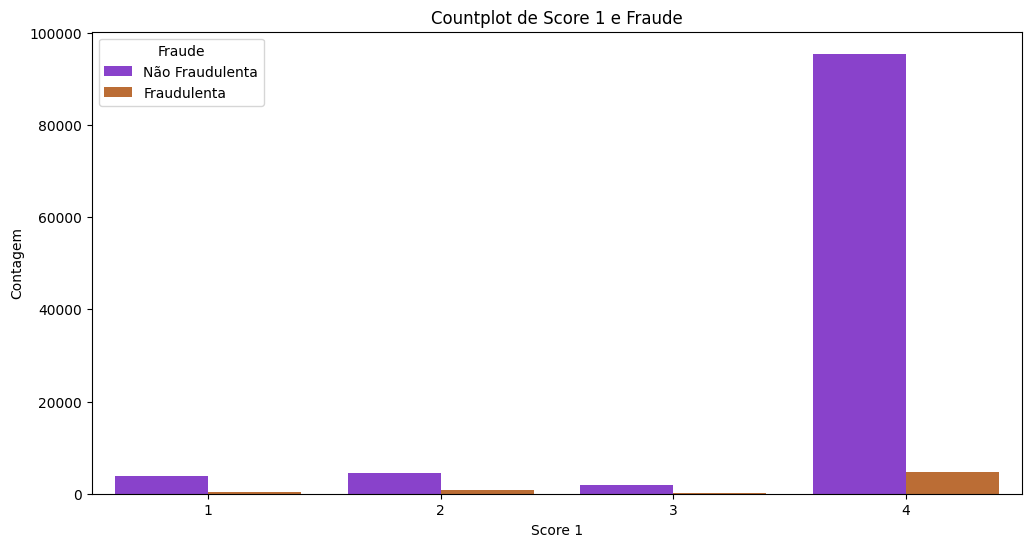

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='score_1', hue='fraude', data=df, palette=['BlueViolet', 'Chocolate'])
plt.title('Countplot de Score 1 e Fraude')
plt.xlabel('Score 1')
plt.ylabel('Contagem')
plt.legend(title='Fraude', labels=['Não Fraudulenta', 'Fraudulenta'])
plt.show()

In [21]:
# Agrupando por score1 e calculando a contagem de fraudes e não fraudes
grouped_score1_perc = df.groupby('score_1')['fraude'].value_counts(normalize=True).unstack() * 100

# Renomeando as colunas para algo mais compreensível
grouped_score1_perc.columns = ['Não Fraudulenta (%)', 'Fraudulenta (%)']

grouped_score1_perc

Não Fraudulenta (%)  Fraudulenta (%)
score_1                                      
1                  90.507246         9.492754
2                  84.874905        15.125095
3                  88.602577        11.397423
4                  95.268180         4.731820

Relação entre Score 1 e Fraude:
* Aparentemente, os valores mais baixos de score_1 estão associados a transações fraudulentas, ou seja, um score_1 baixo pode ser um indicador de maior probabilidade de fraude.

Para termos certeza do insight obtido iremos realizar teste de hipótese para confirmar ou refutar a relação observada entre o score 1 e a ocorrência de fraudes.

Hipóteses:
* Hipótese Nula (H0): A proporção de transações fraudulentas não é diferente entre os diferentes níveis de score_1.
* Hipótese Alternativa (H1): A proporção de transações fraudulentas é diferente entre os diferentes níveis de score_1

Iremos usar um teste qui-quadrado de independência para verificar se há ou não uma associação significativa entre score_1 e fraude.

In [22]:
# Criando uma tabela de contingência para score_1 e fraude
contingency_table = pd.crosstab(df['score_1'], df['fraude'])

# Realizando o teste qui-quadrado de independência
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Estatística Qui-Quadrado: {chi2}')
print(f'P-valor: {p}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p < alpha:
    print("Rejeitamos a Hipótese Nula: Há uma associação significativa entre score_1 e fraude.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma associação significativa entre score_1 e fraude.")

Estatística Qui-Quadrado: 1311.5885736674031
P-valor: 4.5012131742499066e-284
Rejeitamos a Hipótese Nula: Há uma associação significativa entre score_1 e fraude.


Como o p-valor é menor que 0.01, podemos concluir que há uma associação significativa entre score_1 e fraude, ou seja, valores baixos de score_1 estão associados a uma maior probabilidade de fraude. Portanto, score_1 é um bom indicador de fraude.

### 2.4.2 - Score 2

In [23]:
def criar_histograma(df, coluna, titulo, cor='skyblue', numero_bins=20, mostrar_media=True, log=False):
  """
  Cria um histograma com personalização, com opção de aplicar logaritmo.

  Args:
    df (pandas.DataFrame): O DataFrame com os dados.
    coluna (str): O nome da coluna a ser plotada.
    titulo (str): O título do gráfico.
    cor (str, optional): A cor do histograma. Defaults to 'skyblue'.
    numero_bins (int, optional): O número de bins do histograma. Defaults to 20.
    mostrar_media (bool, optional): Se True, mostra uma linha vertical para a média. Defaults to True.
    log (bool, optional): Se True, aplica o logaritmo natural aos dados antes de plotar. Defaults to False.
  """

  plt.figure(figsize=(10, 6))

  if log:
    sns.histplot(data=df, x=np.log(df[coluna]), bins=numero_bins, kde=True, color=cor, edgecolor='black')
    plt.xlabel(f'Log({coluna})', fontsize=12)
    media_log = np.log(df[coluna].mean())
  else:
    sns.histplot(data=df, x=coluna, bins=numero_bins, kde=True, color=cor, edgecolor='black')
    plt.xlabel(coluna, fontsize=12)
    media_log = df[coluna].mean()

  plt.title(titulo, fontsize=16, fontweight='bold')
  plt.ylabel('Frequência', fontsize=12)

  if mostrar_media:
    plt.axvline(media_log, color='red', linestyle='--', label='Média')
    plt.legend()

  sns.despine()  # Removendo algumas bordas para um visual mais limpo

  plt.show()

In [24]:
def criar_violin_plot(df, coluna, titulo, cor='lightblue', inner='quartile', log=False):
  """
  Cria um violin plot com personalização, com opção de aplicar logaritmo.

  Args:
    df (pandas.DataFrame): O DataFrame com os dados.
    coluna (str): O nome da coluna a ser plotada.
    titulo (str): O título do gráfico.
    cor (str, optional): A cor do violin plot. Defaults to 'lightblue'.
    inner (str, optional): Tipo de representação interna do violin plot. Defaults to 'quartile'.
    log (bool, optional): Se True, aplica o logaritmo natural aos dados antes de plotar. Defaults to False.
  """

  plt.figure(figsize=(10, 6))

  if log:
    sns.violinplot(
        x=np.log(df[coluna]),  # Aplicando log aos dados
        y=None,
        data=df,
        color=cor,
        inner=inner
    )
    plt.xlabel(f'Log({coluna})', fontsize=12)  # Ajustando o rótulo do eixo x
  else:
    sns.violinplot(
        x=coluna,
        y=None,
        data=df,
        color=cor,
        inner=inner
    )
    plt.xlabel(coluna, fontsize=12)

  plt.title(titulo, fontsize=14, fontweight='bold')
  plt.ylabel('Densidade', fontsize=12)  # Alterando rótulo do eixo y

  plt.show()

In [25]:
def criar_boxplot(df, coluna, titulo, cor='lightblue', log=False):
  """
  Cria um boxplot com personalização, com opção de aplicar logaritmo.

  Args:
    df (pandas.DataFrame): O DataFrame com os dados.
    coluna (str): O nome da coluna a ser plotada.
    titulo (str): O título do gráfico.
    cor (str, optional): A cor do boxplot. Defaults to 'lightblue'.
    log (bool, optional): Se True, aplica o logaritmo natural aos dados antes de plotar. Defaults to False.
  """

  plt.figure(figsize=(10, 6))

  if log:
    sns.boxplot(x=np.log(df[coluna]), color=cor)  # Aplicando log aos dados
    plt.xlabel(f'Log({coluna})')  # Ajustando o rótulo do eixo x
  else:
    sns.boxplot(x=df[coluna], color=cor)
    plt.xlabel(coluna)

  plt.title(titulo)

  plt.show()

In [26]:
def criar_boxplot_fraude(df, coluna_fraude, coluna_score, titulo, cores=['lightblue', 'lightcoral'], log=False):
  """
  Cria um boxplot para comparar a distribuição de um score por fraude, com opção de aplicar logaritmo.

  Args:
    df (pandas.DataFrame): O DataFrame com os dados.
    coluna_fraude (str): O nome da coluna que indica se houve fraude (0 ou 1).
    coluna_score (str): O nome da coluna com o score a ser analisado.
    titulo (str): O título do gráfico.
    cores (list, optional): Lista com as cores para os boxplots (fraude e não fraude). Defaults to ['lightblue', 'lightcoral'].
    log (bool, optional): Se True, aplica o logaritmo natural aos dados antes de plotar. Defaults to False.
  """

  plt.figure(figsize=(10, 6))

  if log:
    sns.boxplot(x=df[coluna_fraude], y=np.log(df[coluna_score]), palette=cores)
    plt.ylabel(f'Log({coluna_score})')
  else:
    sns.boxplot(x=df[coluna_fraude], y=df[coluna_score], palette=cores)
    plt.ylabel(coluna_score)

  plt.title(titulo)
  plt.xlabel(f'{coluna_fraude} (0 = Não, 1 = Sim)')

  plt.show()

In [27]:
def plotar_histogramas_fraude(df, coluna_score, titulo_geral, titulo_fraude, limite_y_fraude=None, cores=['skyblue', 'salmon'], log=False):
    """
    Cria dois histogramas lado a lado: um para todos os dados e outro para fraudes.

    Args:
        df (pandas.DataFrame): O DataFrame com os dados.
        coluna_score (str): O nome da coluna com o score a ser analisado.
        titulo_geral (str): O título para o histograma geral.
        titulo_fraude (str): O título para o histograma de fraudes.
        limite_y_fraude (float, optional): Limite superior do eixo Y para o histograma de fraudes. Defaults to None.
        cores (list, optional): Lista com as cores para os histogramas (geral e fraude). Defaults to ['skyblue', 'salmon'].
        log (bool, optional): Se True, aplica o logaritmo ao score. Defaults to False.
    """
    # Fazendo uma cópia do DataFrame e aplicar logaritmo se necessário
    df_log = df.copy()
    if log:
        df_log[coluna_score] = np.log1p(df_log[coluna_score])  # Aplica logaritmo natural (log1p para log(1 + x))

    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharey=False)

    # Histograma geral
    sns.histplot(data=df_log, x=coluna_score, bins=20, kde=True, color=cores[0], edgecolor='black', ax=axes[0])
    axes[0].set_title(titulo_geral, fontsize=16, fontweight='bold')
    axes[0].set_xlabel(coluna_score, fontsize=12)
    axes[0].set_ylabel('Frequência', fontsize=12)
    axes[0].axvline(df_log[coluna_score].mean(), color='red', linestyle='--', label='Média')
    axes[0].legend()
    sns.despine(ax=axes[0])

    # Histograma para fraudes
    sns.histplot(data=df_log[df_log['fraude'] == 1], x=coluna_score, bins=20, kde=True, color=cores[1], edgecolor='black', ax=axes[1])
    axes[1].set_title(titulo_fraude, fontsize=16, fontweight='bold')
    axes[1].set_xlabel(coluna_score, fontsize=12)
    axes[1].axvline(df_log[df_log['fraude'] == 1][coluna_score].mean(), color='red', linestyle='--', label='Média')
    axes[1].legend()

    if limite_y_fraude is not None:
        axes[1].set_ylim(0, limite_y_fraude)

    sns.despine(ax=axes[1])

    plt.tight_layout()
    plt.show()

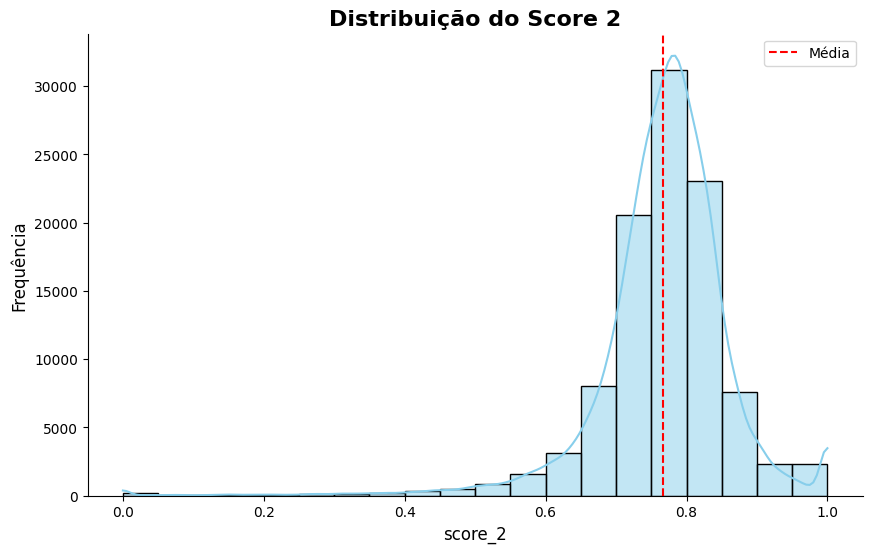

In [28]:
# score_2
criar_histograma(df, 'score_2', 'Distribuição do Score 2')

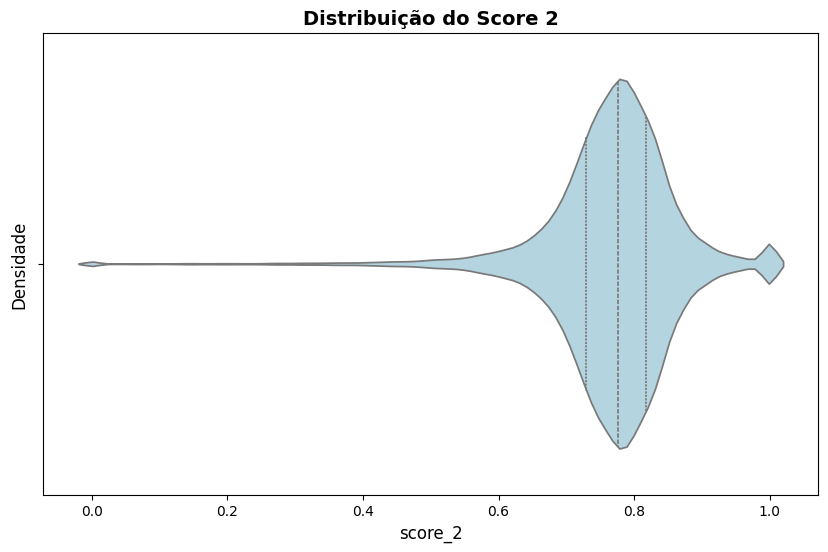

In [29]:
# score_2
criar_violin_plot(df, 'score_2', 'Distribuição do Score 2')

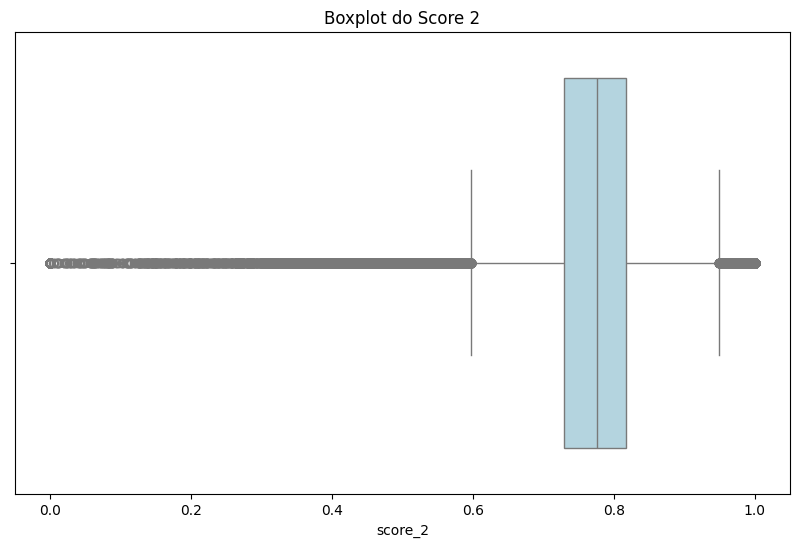

In [30]:
# score_2
criar_boxplot(df, 'score_2', 'Boxplot do Score 2')

Para verificarmos a assimetria dos dados, iremos calcular o Skew, o resultado obtido pode ser interpretado da seguinte maneira:

1. Skew Positivo (Assimetria à Direita): Skew > 0
    * Se o valor da Skew for positivo, então a cauda direita da distribuição é mais longa.

    * A maior parte dos dados está concentrada à esquerda da média, com alguns valores extremos(outliers) à direita.

    * Indica a presença de alguns valores muito altos que elevam a média. Em termos de fraudes, isso pode significar que há algumas transações com scores muito altos.

2. Skew Negativo (Assimetria à Esquerda): Skew < 0
    * Se o valor da Skew for negativo, a cauda esquerda é mais longa.

    * A maior parte dos dados está concentrada à direita da média, com alguns valores extremos(outliers) à esquerda.

    * Indica a presença de alguns valores muito baixos. Para fraudes, isso pode significar que há algumas transações com scores muito baixos.

3. Skew Aproximadamente Zero (Distribuição Simétrica): Skew = 0
    * Se o valor da Skew for aproximadamente zero, a distribuição é aproximadamente simétrica.

    * Os dados são distribuídos igualmente ao redor da média.

    * Não há uma cauda dominante. A média e a mediana são aproximadamente iguais, indicando uma distribuição balanceada.

Relevância para o Modelo:
Skew Positivo e negativo precisam serem tratados, possivelmente com transformações logarítmicas, para normalizar a distribuição e melhorar o desempenho do modelo.

Skew Zero: Geralmente significa que os dados estão bem comportados para modelagem.

In [31]:
# Calculando a Skew da coluna score_2
skewness = df['score_2'].skew()
print(f'Skew da coluna score_2: {skewness}')

Skew da coluna score_2: -2.131286644248105


A curtose aqui será usada para medir o apontamento da distribuição dos dados em relação a uma distribuição normal. Os resultados da curtose podem ser interpretados da seguinte maneira:

1. Curtose Positiva (Leptocúrtica): Curtose > 0

    * Se o valor da curtose for positivo, a distribuição tem caudas mais "gordas" ou pesadas em comparação com uma distribuição normal.

    * A maior parte dos dados está concentrada em torno da média e nas caudas, indicando a presença de muitos valores extremos (outliers).

    * Indica uma alta ocorrência de outliers, o que pode influenciar a média. Em termos de fraudes, isso pode significar que há várias transações com scores de fraude extremamente altos, aumentando a incidência de outliers.

2. Curtose Negativa (Platicúrtica): Curtose < 0

    * Se o valor da curtose for negativo, a distribuição tem caudas mais "finas" ou leves em comparação com uma distribuição normal.

    * A maior parte dos dados está distribuída uniformemente ao redor da média, com menos valores extremos.

    * Indica uma menor ocorrência de outliers, o que pode resultar em dados mais homogêneos. Para fraudes, isso pode significar que a maioria das transações tem scores de fraude menos variados.

3. Curtose Zero (Mesocúrtica): Curtose = 0

    * Se o valor da curtose for aproximadamente zero, a distribuição é semelhante à distribuição normal.

    * Os dados são distribuídos de forma equilibrada ao redor da média, com caudas nem mais gordas nem mais finas.

    * Indica uma distribuição normal, onde a média e a mediana são aproximadamente iguais, sugerindo uma variação equilibrada. Em termos de fraudes, isso pode significar que as transações têm uma distribuição de scores de fraude semelhante à normal, com uma dispersão padrão de valores.

4. Relevância para o Modelo:

    * Curtose Positiva é necessário tratar outliers, possivelmente com transformações para reduzir o impacto desses valores extremos e melhorar a robustez do modelo. 

    * Curtose Negativa: Pode indicar dados mais uniformes.

    * Curtose Zero: Geralmente significa que os dados estão bem distribuídos e prontos para modelagem sem necessidade de transformação adicional.

In [32]:
# Calculando a curtose da coluna score_2
curtosis = df['score_2'].kurtosis()
print(f'Curtose da coluna score_2: {curtosis}')

Curtose da coluna score_2: 12.56637215629463


Com os gráficos apresentados e a skew negativa longe de zero, podemos notar uma distribuição assimétrica à esquerda(Assimetria negativa), com uma cauda longa à esquerda, indicando que a maioria dos valores do Score 2 se concentram na faixa entre 0.6 e 0.9, apresentando uma menor quantidade de valores mais baixos.

* A distribuição não é uma normal, devido há maior quantidade de valores na parte superior da escala do que na inferior e seu skew negativo.
* A maior parte dos dados está agrupada em torno do valor 0,8, sugerindo que este é um valor típico ou comum para o Score 2.
* A presença da cauda longa à esquerda indica uma alta variabilidade nos dados, ou seja, os valores do Score 2 podem variar significativamente.
* A linha vertical vermelha representa a média dos dados. O fato de ela estar localizada à direita do pico da distribuição confirma a assimetria à esquerda.
*  A presença de valores poucos valores baixos na cauda esquerda pode indicar a existência de outliers, pontos de dados que se desviam dos outros.
* A alta curtose na coluna score_2 aponta para uma distribuição com muitos outliers, sugerindo a necessidade de técnicas de tratamento de outliers e ajustes na modelagem para garantir que o modelo de detecção de fraudes seja o mais preciso possível.

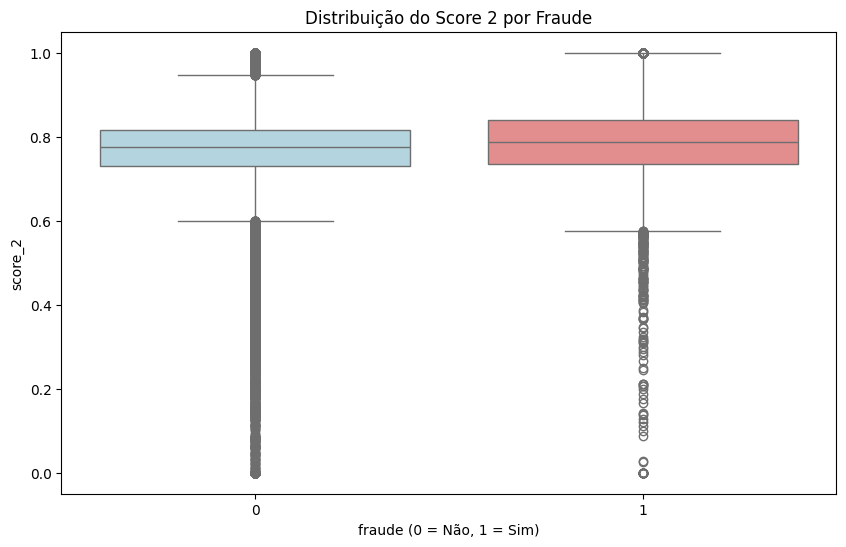

In [33]:
# score_2
criar_boxplot_fraude(df, 'fraude', 'score_2', 'Distribuição do Score 2 por Fraude')

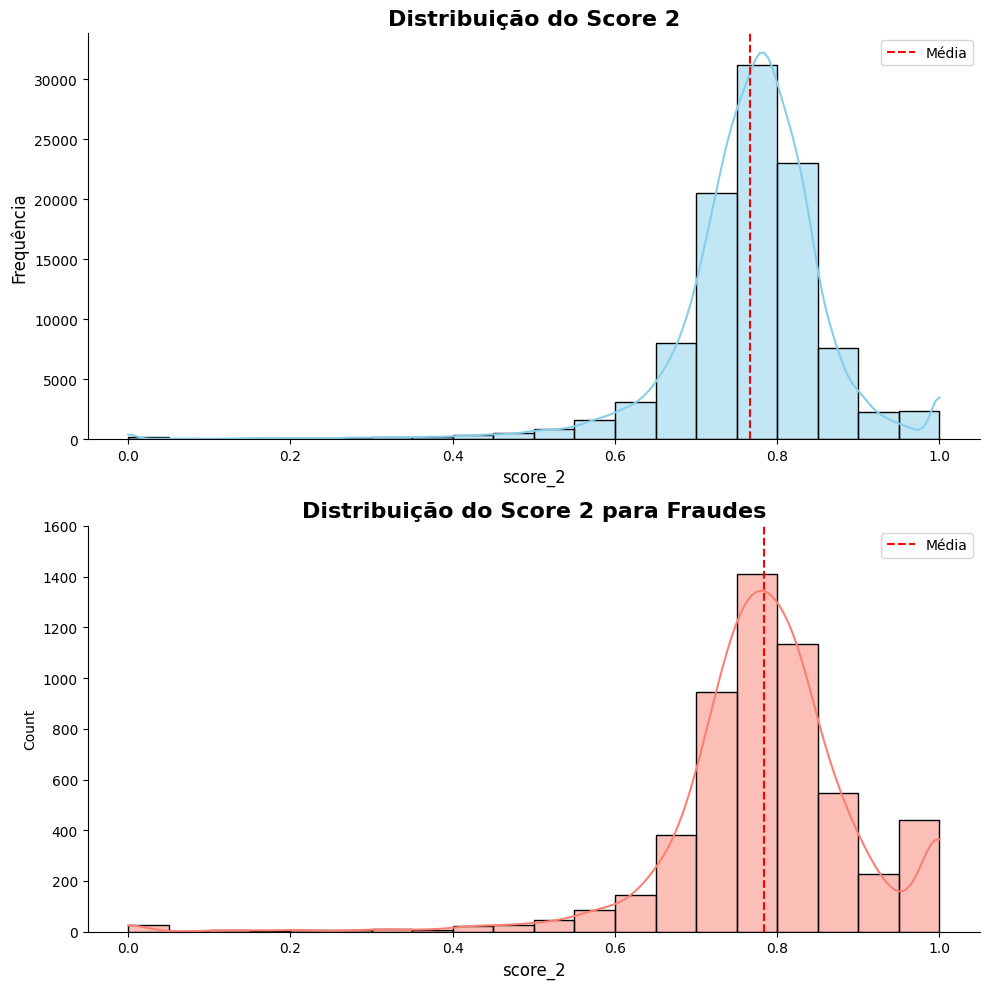

In [34]:
# fraude e score_2
plotar_histogramas_fraude(df, 'score_2', 'Distribuição do Score 2', 'Distribuição do Score 2 para Fraudes', limite_y_fraude=1600)

A partir das análises acima, notamos que o score_2, mesmo apresentando valores altos, não consegue sozinho prever fraudes com precisão. Logo, será necessário usar múltiplos scores e outros fatores no modelo de detecção de fraude. Indicando que, mesmo com altos scores de crédito predominantes, eles não são infalíveis, e um sistema de verificação mais robusto, que leva em conta múltiplos scores e variáveis, sendo essencial para melhorar a detecção de fraudes. 

Iremos fazer um teste de hipóteses para confirmar se há uma diferença significativa entre as distribuições de score_2 para transações fraudulentas e não fraudulentas. Vamos usar o teste de Mann-Whitney U, que é apropriado para comparar distribuições independentes quando não podemos assumir que seguem uma distribuição normal.

Hipóteses
* Hipótese Nula (H0): As distribuições do score_2 para transações fraudulentas e não fraudulentas são iguais.
* Hipótese Alternativa (H1): As distribuições do score_2 para transações fraudulentas e não fraudulentas são diferentes.

In [35]:
# Verificando valores ausentes em score_2 e fraude
print(df['score_2'].isnull().sum())
print(df['fraude'].isnull().sum())

# Removendo linhas com valores ausentes
df_clean = df.dropna(subset=['score_2', 'fraude'])

# Separando os scores_2 para fraudes e não fraudes com o DataFrame limpo
score_2_fraud = df_clean[df_clean['fraude'] == 1]['score_2']
score_2_non_fraud = df_clean[df_clean['fraude'] == 0]['score_2']

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_2_fraud, score_2_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do score_2 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do score_2 para transações fraudulentas e não fraudulentas.")

9248
0
Estatística do Teste: 295760250.5
P-valor: 5.423664265955838e-46
Rejeitamos a Hipótese Nula: As distribuições do score_2 para transações fraudulentas e não fraudulentas são significativamente diferentes.


Como o p-valor é menor que 0.01, rejeitamos a hipótese nula e concluímos que as distribuições de score_2 para transações fraudulentas e não fraudulentas são significativamente diferentes. Portanto, score_2 é uma variável relevante para distinguir as transações fraudulentas e não fraudulentas.

### 2.4.3 - Score 3

**Transformação Logarítmica:** Para realizar as análises do Score_3 será necessário o uso de uma transformação logarítmica, pois os dados originais tem uma distribuição altamente assimétrica com valores extremos. A transformação será usada para normalizar a distribuição e facilitar a visualização e análise.

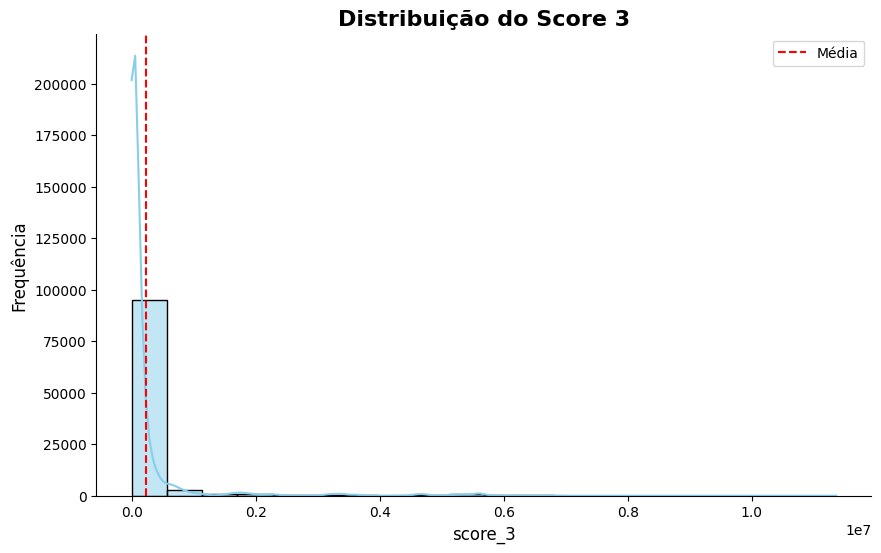

In [36]:
# score_3
criar_histograma(df, 'score_3', 'Distribuição do Score 3')

Iremos aplicar uma transformação logarítmica para a análise.

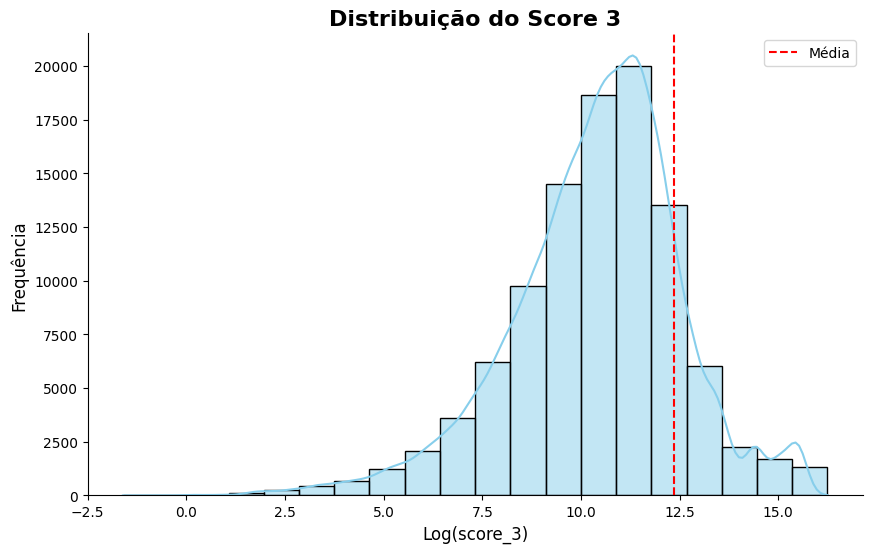

In [37]:
# score_3
criar_histograma(df, 'score_3', 'Distribuição do Score 3', log=True)

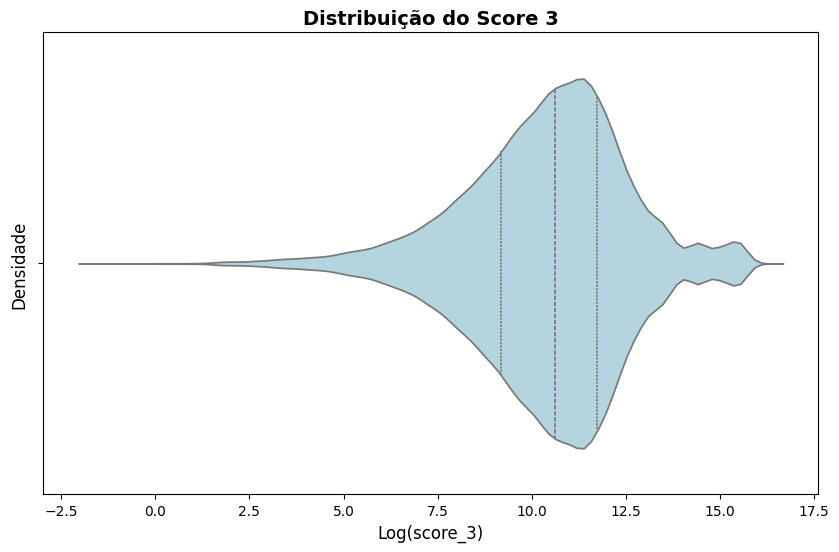

In [38]:
# score_3
criar_violin_plot(df, 'score_3', 'Distribuição do Score 3', log=True)

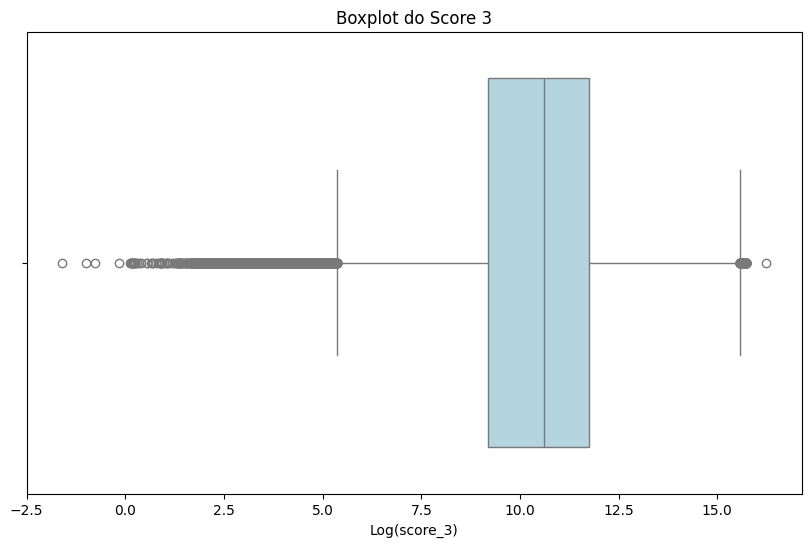

In [39]:
# score_3
criar_boxplot(df, 'score_3', 'Boxplot do Score 3', log=True)

In [40]:
# Calculando a Skew da coluna Score_3
skewness = np.log1p(df['score_3']).skew()
print(f'Skew da coluna Score_3: {skewness}')

Skew da coluna Score_3: -0.5285737598896408


In [41]:
# Calculando a curtose da coluna score_3
curtosis = df['score_3'].kurtosis()
print(f'Curtose da coluna score_3: {curtosis}')

Curtose da coluna score_3: 34.96732842742145


* Após a transformação logarítmica obtivemos um skew negativo de -0.52 indica que a distribuição é ligeiramente assimétrica à esquerda, ou seja, a cauda esquerda é um pouco mais longa ou mais gorda do que a cauda direita.
* A maioria dos valores de score_3 está um pouco à direita da média, com alguns valores mais baixos que puxam a cauda para a esquerda.
* A alta curtose na coluna score_3 sugere uma distribuição com muitos outliers. Indicando a necessidade de técnicas de tratamento de outliers e ajustes na modelagem para garantir que o modelo de detecção de fraudes seja o mais preciso possível.

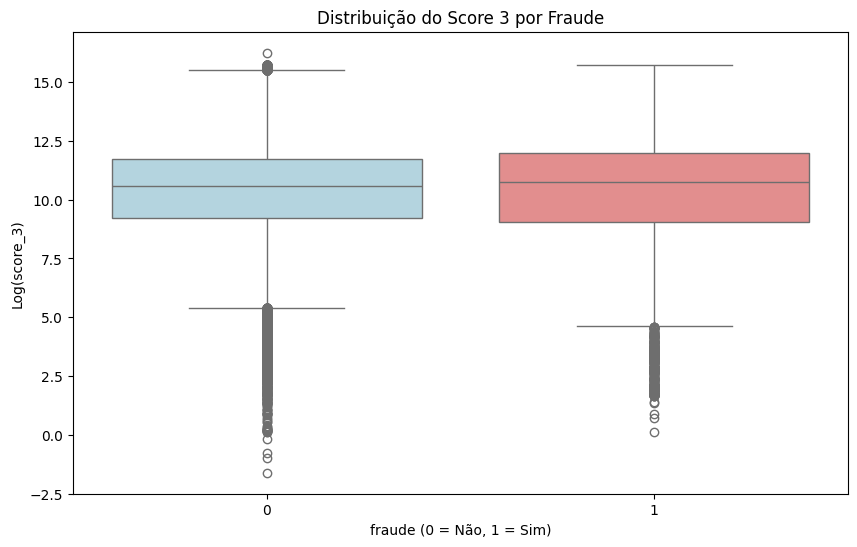

In [42]:
# score_3
criar_boxplot_fraude(df, 'fraude', 'score_3', 'Distribuição do Score 3 por Fraude', log=True)

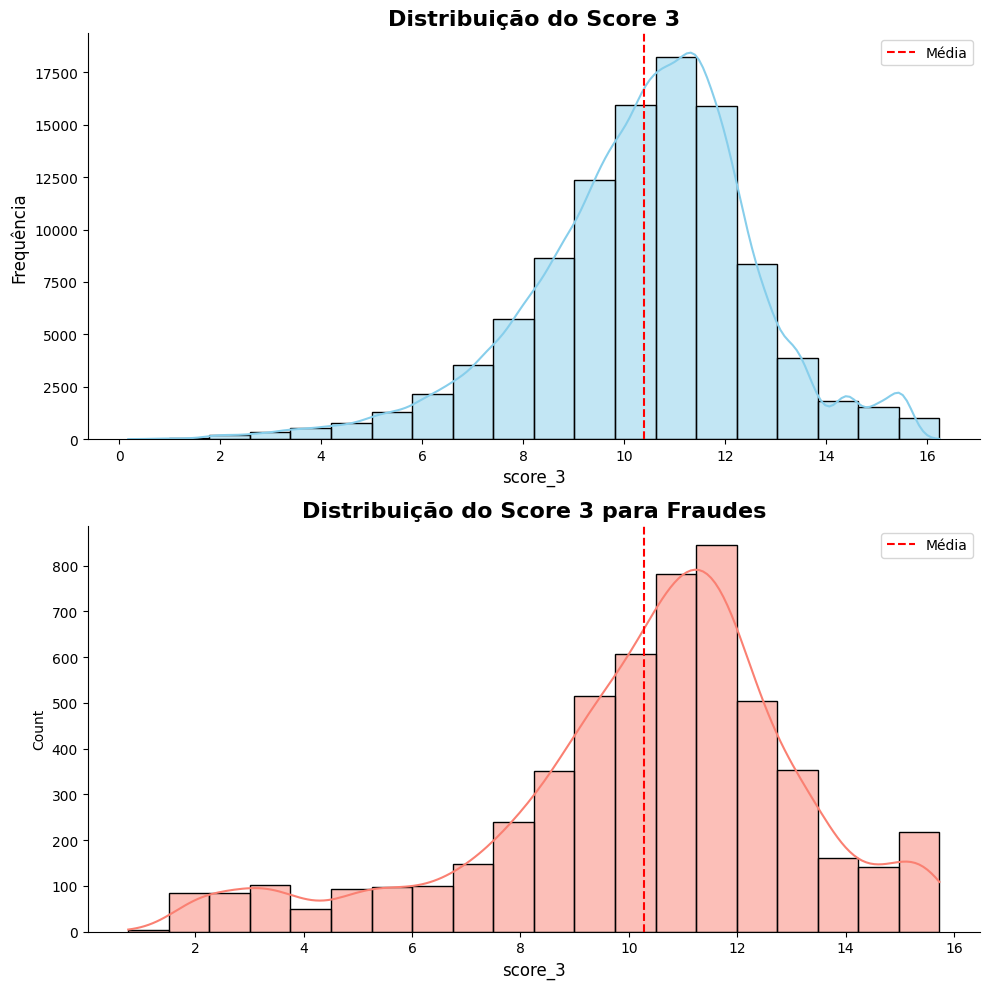

In [43]:
# fraude e score_3
plotar_histogramas_fraude(df, 'score_3', 'Distribuição do Score 3', 'Distribuição do Score 3 para Fraudes', log=True)

* Ambos os gráficos mostram distribuições semelhantes, indicando que a distribuição do Score 3 não varia drasticamente entre transações fraudulentas e não fraudulentas.
* A média do Score 3 é quase a mesma para fraudes e não fraudes, sugerindo que esta variável sozinha pode não ser um forte discriminador entre as duas classes.

Como para score 3, tivemos uma skew proxima de zero(skew = -0.52), iremos realizar um teste de hipoteses para verificar a normalidade dos dados.

* P-valor < 0.05: Rejeitamos a hipótese nula, indicando que os dados não seguem uma distribuição normal.

* P-valor ≥ 0.05: Não rejeitamos a hipótese nula, indicando que os dados seguem uma distribuição normal.

In [44]:
# Verificando valores ausentes em score_2 e fraude
print(df['score_3'].isnull().sum())
print(df['fraude'].isnull().sum())

# Remover linhas com valores ausentes
df_clean = df.dropna(subset=['score_3', 'fraude'])

# Realizando o teste de Shapiro-Wilk para score_3
stat, p_value = shapiro(np.log1p(df_clean['score_3']))

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.05  # 95% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: Os dados não seguem uma distribuição normal.")
else:
    print("Não rejeitamos a Hipótese Nula: Os dados seguem uma distribuição normal.")

9248
0
Estatística do Teste: 0.9786904023688924
P-valor: 2.2849057791322615e-74
Rejeitamos a Hipótese Nula: Os dados não seguem uma distribuição normal.


Sabendo que os dados não seguem uma normal, iremos fazer um teste de hipóteses para confirmar se a variável score 3 é uma boa variável para o modelo. O teste de hipóteses escolhido para isso será o teste de Mann-Whitney U, que vai comparar as distribuições da variável Score 3 entre transações fraudulentas e não fraudulentas.

* P-valor < 0.01: Rejeitamos a hipótese nula, indicando que Score 3 tem distribuições significativamente diferentes para fraudes e não fraudes. Isso sugere que Score 3 pode ser uma boa variável para o modelo de fraude.

* P-valor ≥ 0.01: Não rejeitamos a hipótese nula, indicando que Score 3 não tem distribuições significativamente diferentes para fraudes e não fraudes. Isso sugere que Score 3 pode não ser uma variável útil para o modelo.

In [45]:
# Separando os scores_3 para fraudes e não fraudes
score_3_fraud = (np.log1p(df_clean[df_clean['fraude'] == 1]['score_3']))
score_3_non_fraud = (np.log1p(df_clean[df_clean['fraude'] == 0]['score_3']))

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_3_fraud, score_3_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 3 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 3 para transações fraudulentas e não fraudulentas.")

Estatística do Teste: 272460505.0
P-valor: 0.0010050706028253776
Rejeitamos a Hipótese Nula: As distribuições do Score 3 para transações fraudulentas e não fraudulentas são significativamente diferentes.


O Score 3 não parece ser um forte discriminador sozinho, mas pode contribuir para um modelo de machine learning mais robusto se for combinado com outras variáveis. Suas distribuições similares sugerem que ele não deve ser a única feature, mas pode agregar valor no contexto de um conjunto maior de dados.

### 2.4.4 - Score 4

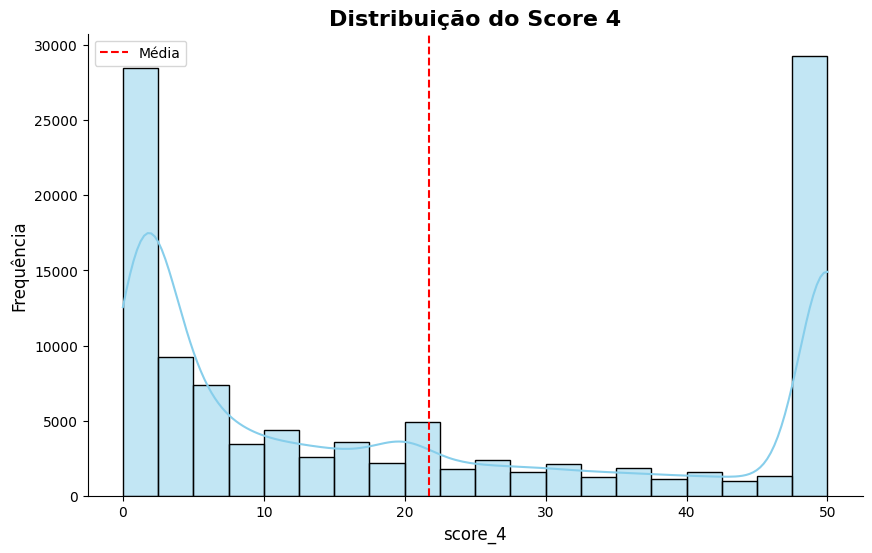

In [46]:
# score_4
criar_histograma(df, 'score_4', 'Distribuição do Score 4')

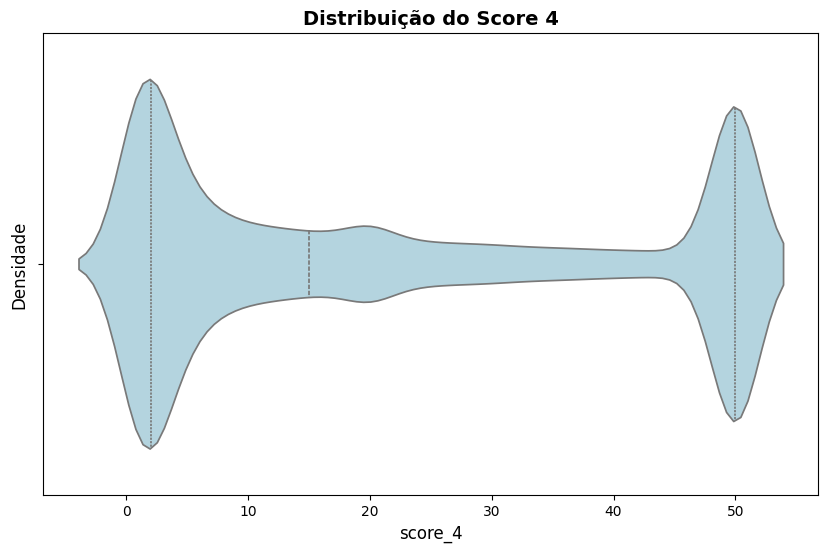

In [47]:
# score_4
criar_violin_plot(df, 'score_4', 'Distribuição do Score 4')

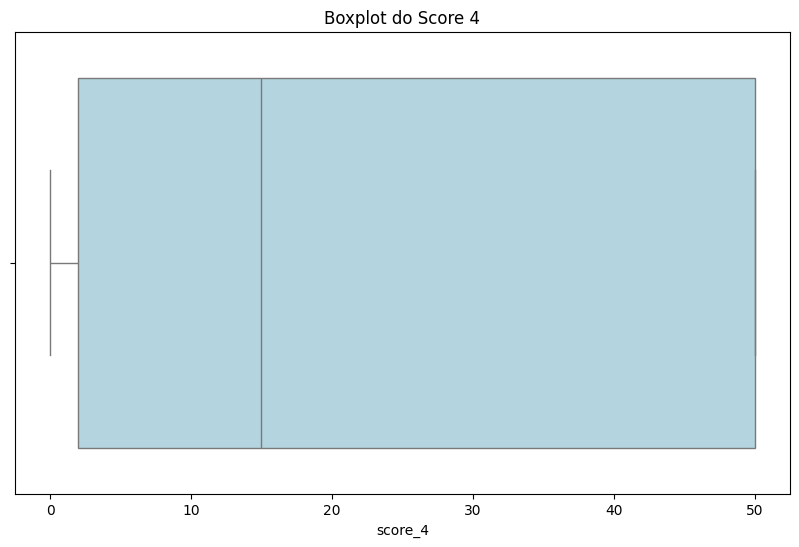

In [48]:
# score_4
criar_boxplot(df, 'score_4', 'Boxplot do Score 4')

In [49]:
# Calculando a curtose da coluna score_4
curtosis = df['score_4'].kurtosis()
print(f'Curtose da coluna score_4: {curtosis}')

Curtose da coluna score_4: -1.5221119022432357


* Podemos notar picos significativos em torno de valores baixos. Esses picos indicam que muitos compradores recebem pontuações próximas a zero, o que pode ser um indicativo de uma avaliação de risco inicial baixa.
* A curtose negativa na coluna score_4 sugere uma distribuição com menos outliers e uma variabilidade mais uniforme. Isso pode tornar os dados mais fáceis de modelar e reduzir a necessidade de técnicas intensivas de tratamento de outliers

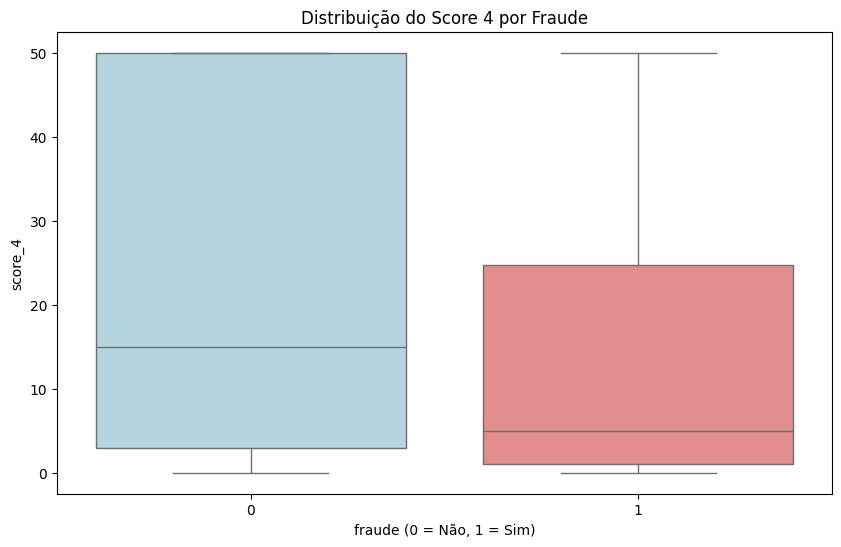

In [50]:
# score_4
criar_boxplot_fraude(df, 'fraude', 'score_4', 'Distribuição do Score 4 por Fraude')

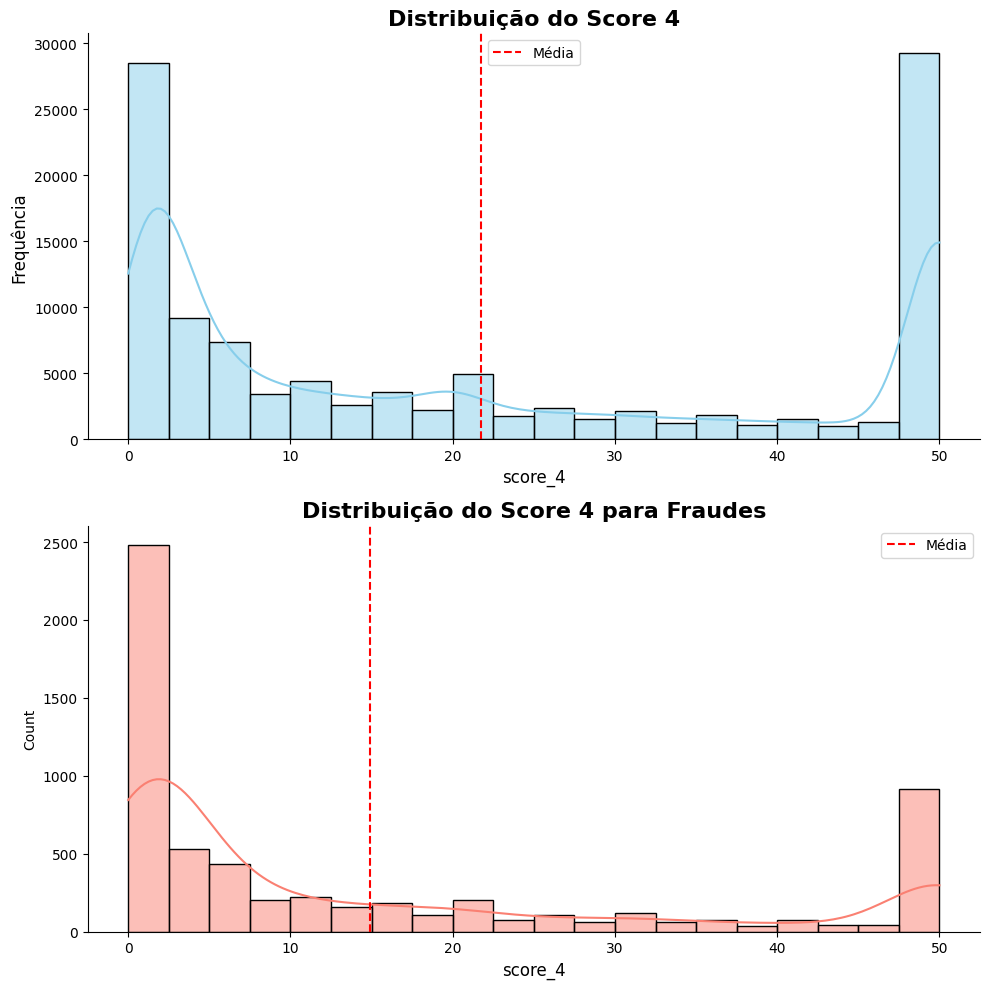

In [51]:
# fraude e score_4
plotar_histogramas_fraude(df, 'score_4', 'Distribuição do Score 4', 'Distribuição do Score 4 para Fraudes')

A semelhança entre as distribuições para fraudes e a população geral sugere que Score 4, quanto menor o Score 4 maior a probabilidade de fraude, indicando ser um bom discriminador entre transações fraudulentas e não fraudulentas.

Para avaliar se Score 4 é uma boa variável para o modelo de detecção de fraudes, iremos usar o teste de Mann-Whitney U.

Hipóteses:

* Hipótese Nula (H0): As distribuições do Score 4 são iguais para transações fraudulentas e não fraudulentas.
* Hipótese Alternativa (H1): As distribuições do Score 4 são diferentes para transações fraudulentas e não fraudulentas.

In [52]:
# Verificando valores ausentes em score_2 e fraude
print(df['score_4'].isnull().sum())
print(df['fraude'].isnull().sum())

# Remover linhas com valores ausentes
df_clean = df.dropna(subset=['score_4', 'fraude'])

# Separando os scores_4 para fraudes e não fraudes
score_4_fraud = df_clean[df_clean['fraude'] == 1]['score_4']
score_4_non_fraud = df_clean[df_clean['fraude'] == 0]['score_4']

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_4_fraud, score_4_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 4 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 4 para transações fraudulentas e não fraudulentas.")

223
0
Estatística do Teste: 248043776.0
P-valor: 1.3798247765843767e-211
Rejeitamos a Hipótese Nula: As distribuições do Score 4 para transações fraudulentas e não fraudulentas são significativamente diferentes.


O Score 4 é uma variável significativa para distinguir entre transações fraudulentas e não fraudulentas. Essa diferença nas distribuições sugere que o Score 4 tem um padrão diferente para transações fraudulentas, tornando-se uma boa variável para o modelo preditivo.

### 2.4.5 - Score 5

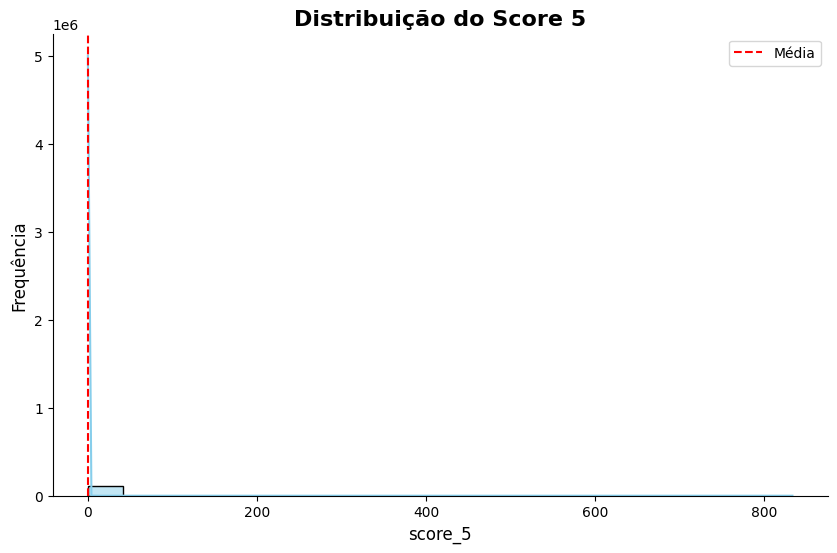

In [53]:
# score_5
criar_histograma(df, 'score_5', 'Distribuição do Score 5')

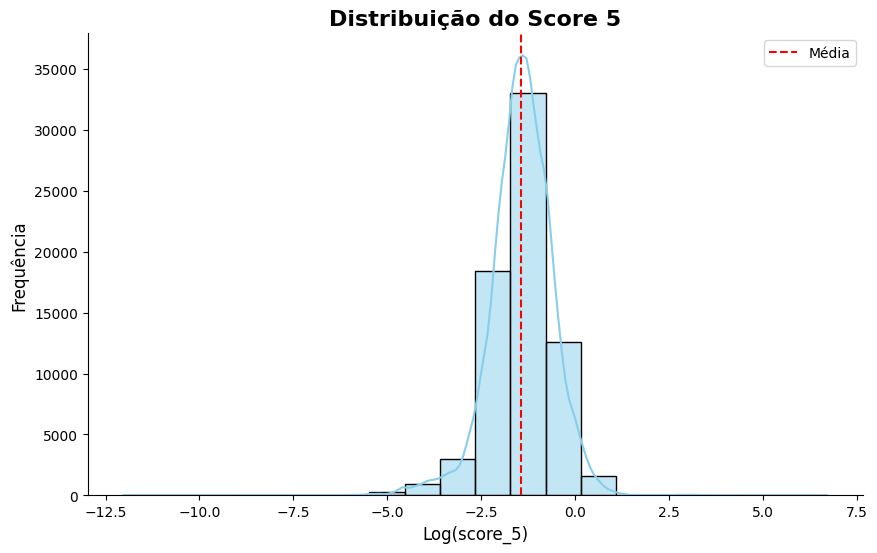

In [54]:
# score_5
criar_histograma(df, 'score_5', 'Distribuição do Score 5', log=True)

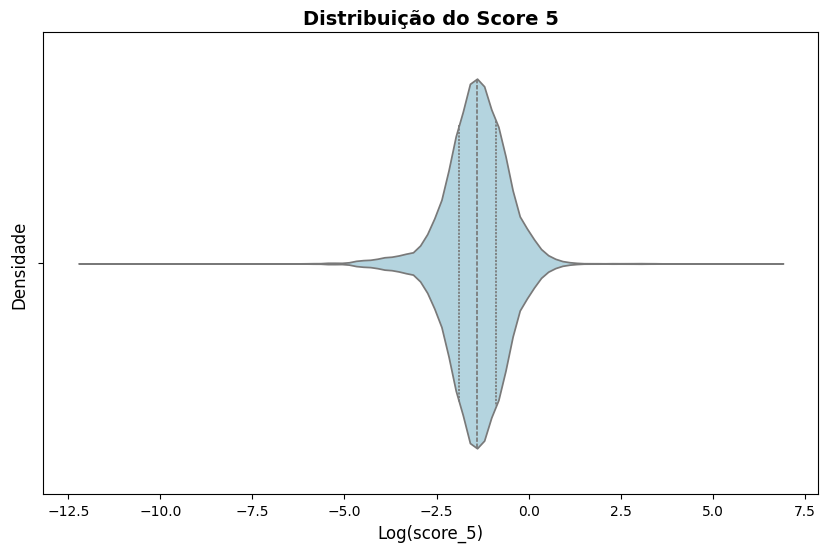

In [55]:
# score_5
criar_violin_plot(df, 'score_5', 'Distribuição do Score 5', log=True)

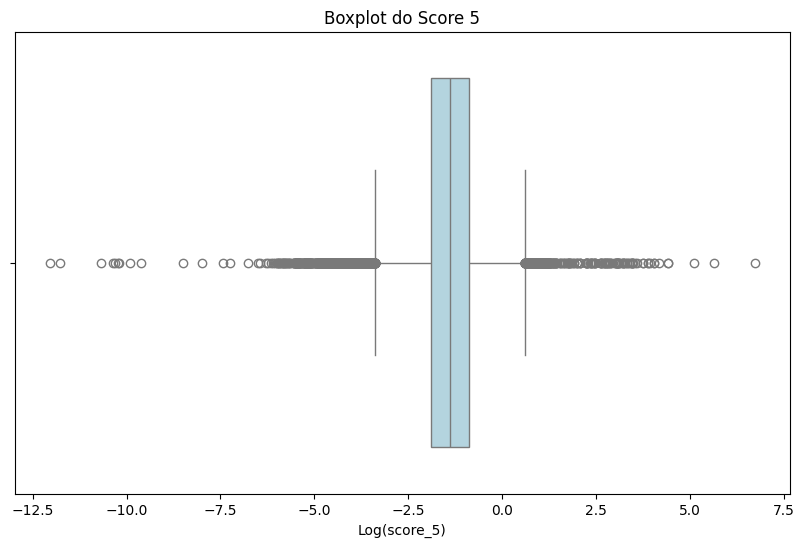

In [56]:
# score_5
criar_boxplot(df, 'score_5', 'Boxplot do Score 5', log=True)

In [57]:
# Calculando a Skew da coluna Score_5
skewness = np.log1p(df['score_5']).skew()
print(f'Skew da coluna Score_5: {skewness}')

Skew da coluna Score_5: 3.7614577384516372


In [58]:
# Calculando a curtose da coluna score_5
curtosis = df['score_5'].kurtosis()
print(f'Curtose da coluna score_5: {curtosis}')

Curtose da coluna score_5: 71508.53508829372


* A distribuição apresenta uma longa cauda à direita, indicando que há valores muito altos, embora eles sejam menos frequentes.

* Skew positivo alto de aproximadamente 3.76 indicando uma alta assimetria positiva.

* Um valor de curtose tão alto quanto 71508 é extremamente elevado e indica uma distribuição extremamente leptocúrtica com picos muito altos e caudas muito pesadas, sendo necessario o uso técnicas de tratamento intensivo de outliers e ajustes na modelagem para garantir que o modelo de detecção de fraudes seja preciso.

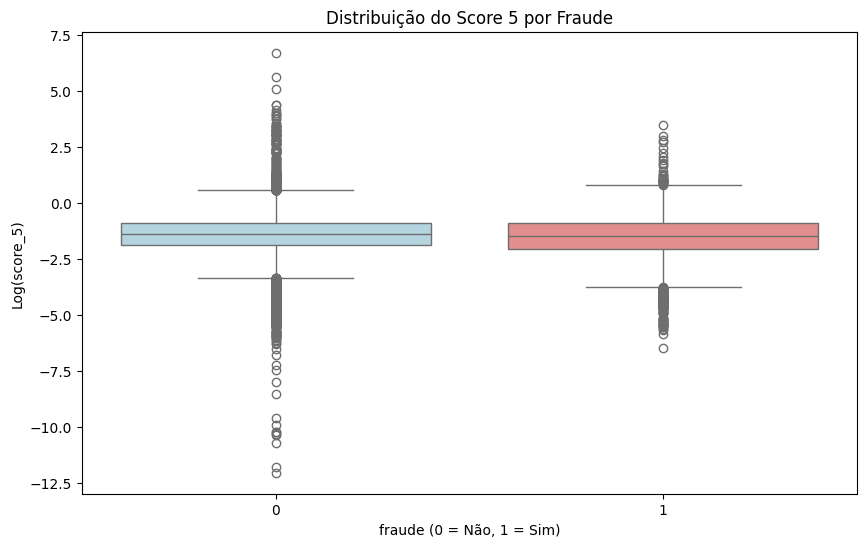

In [59]:
# score_5
criar_boxplot_fraude(df, 'fraude', 'score_5', 'Distribuição do Score 5 por Fraude', log=True)

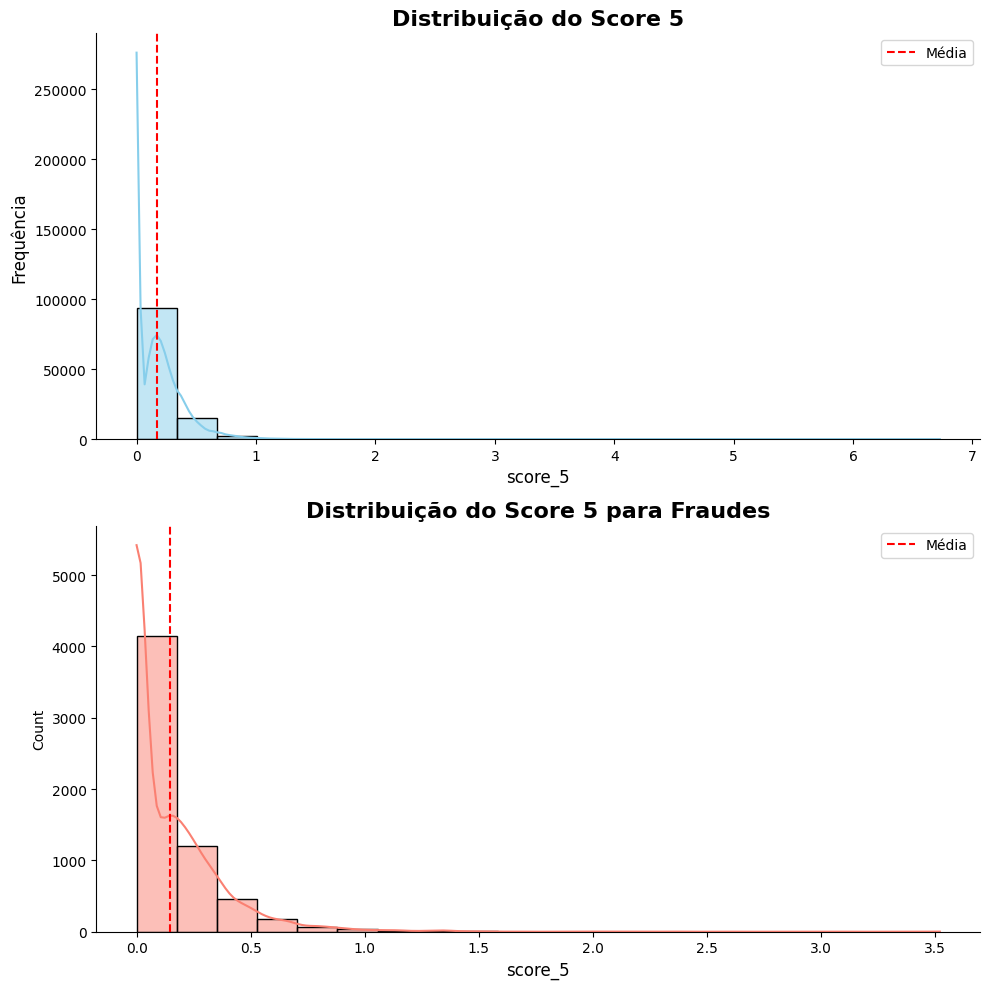

In [60]:
# fraude e score_5
plotar_histogramas_fraude(df, 'score_5', 'Distribuição do Score 5', 'Distribuição do Score 5 para Fraudes', log=True)

Vamos fazer um teste de hipóteses para avaliar se Score 5 é uma boa variável para o modelo de detecção de fraudes. O teste de Mann-Whitney U é novamente é o mais adequado por se tratar de um teste não paramétrico, que não assume qe os dados sigam uma normal, comparando a distribuição de Score 5 entre transações fraudulentas e não fraudulentas.

Hipóteses:

* Hipótese Nula (H0): As distribuições do Score 5 são iguais para transações fraudulentas e não fraudulentas.
* Hipótese Alternativa (H1): As distribuições do Score 5 são diferentes para transações fraudulentas e não fraudulentas.

In [61]:
# Separando os scores_5 para fraudes e não fraudes na forma original
score_5_fraud = np.log1p(df[df['fraude'] == 1]['score_5'])
score_5_non_fraud = np.log1p(df[df['fraude'] == 0]['score_5'])

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_5_fraud, score_5_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 5 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 5 para transações fraudulentas e não fraudulentas.")

Estatística do Teste: 292807273.0
P-valor: 4.5222595603393083e-41
Rejeitamos a Hipótese Nula: As distribuições do Score 5 para transações fraudulentas e não fraudulentas são significativamente diferentes.


* Score 5 é uma variável significativa para distinguir entre transações fraudulentas e não fraudulentas. A diferença nas distribuições sugere que Score 5 tem um comportamento diferente nas fraudes, tornando-se uma boa variável para o modelo de detecção de fraudes. 
* Dada a significância estatística, incorporar o Score 5 no modelo de machine learning pode ajudar a melhorar a detecção de fraudes. Ele contribui com informações diferenciadas que podem aumentar a precisão do modelo.
* A diferença nas distribuições pode revelar padrões específicos de comportamento que são mais comuns em fraudes. Isso pode ser útil para ajustar outros parâmetros ou variáveis no modelo.

### 2.4.6 - Score 6

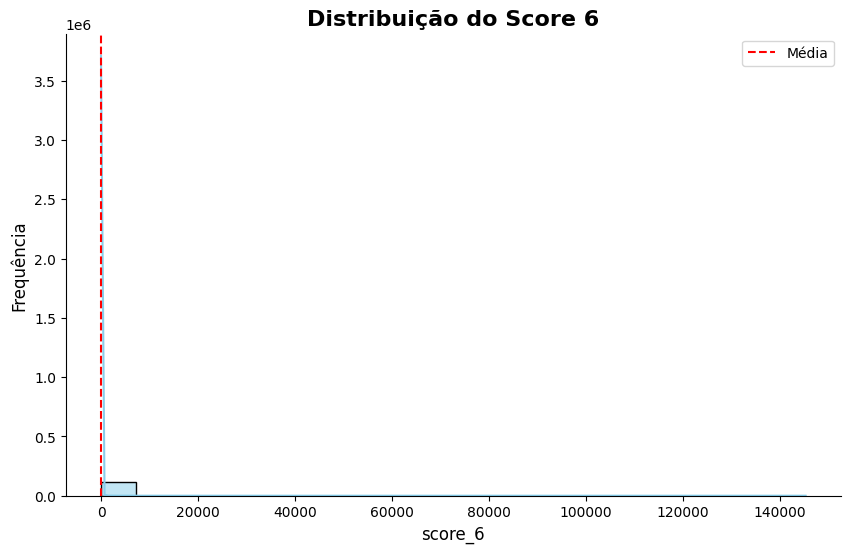

In [62]:
# score_6
criar_histograma(df, 'score_6', 'Distribuição do Score 6')

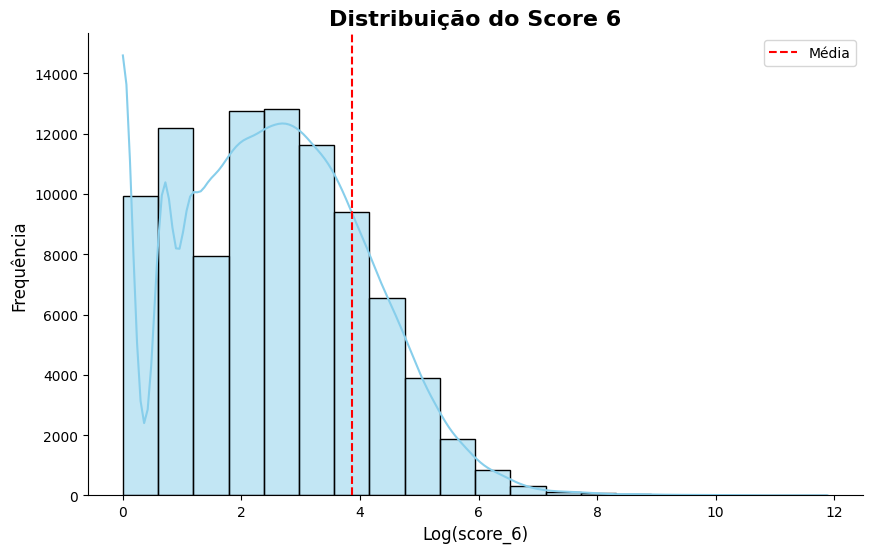

In [63]:
# score_6
criar_histograma(df, 'score_6', 'Distribuição do Score 6', log=True)

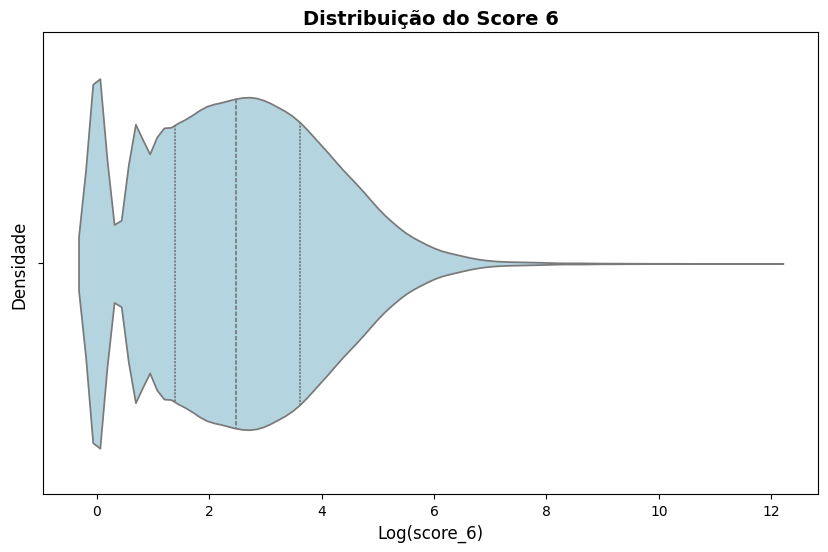

In [64]:
# score_6
criar_violin_plot(df, 'score_6', 'Distribuição do Score 6', log=True)

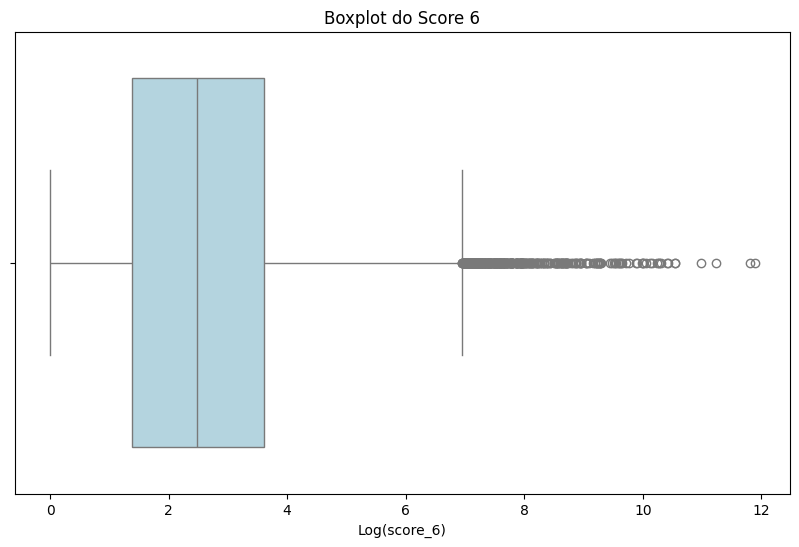

In [65]:
# score_6
criar_boxplot(df, 'score_6', 'Boxplot do Score 6', log=True)

In [66]:
# Calculando a curtose da coluna score_6
curtosis = df['score_6'].kurtosis()
print(f'Curtose da coluna score_6: {curtosis}')

Curtose da coluna score_6: 19999.494650104978


* Mesmo após a transformação logarítmica, a distribuição de Score 6 continua assimétrica à direita, com uma longa cauda se estendendo para valores maiores. Isso sugere que a maioria dos valores de Score 6 são relativamente baixos, mas ainda existem alguns valores muito altos.

* A média da distribuição logarítmica está em torno de 4, o que sugere que a maioria dos valores de Score 6 está concentrada em torno de e^4(aproximadamente 54.6) no espaço original antes da transformação logarítmica. Isso significa que, no geral, Score 6 tem um valor moderadamente alto após a transformação.

* Valor de Curtose >> 0, Indica que a distribuição de score_6 tem caudas extremamente gordas em comparação com uma distribuição normal.

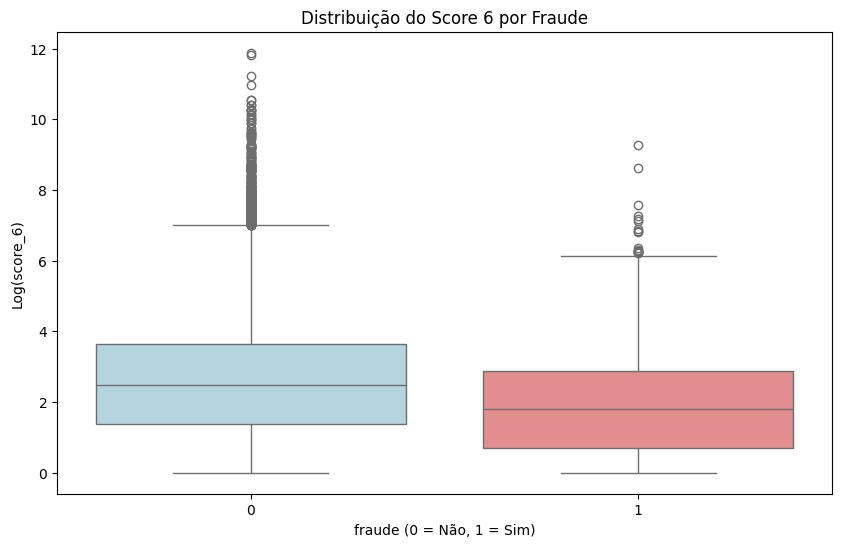

In [67]:
# score_6
criar_boxplot_fraude(df, 'fraude', 'score_6', 'Distribuição do Score 6 por Fraude', log=True)

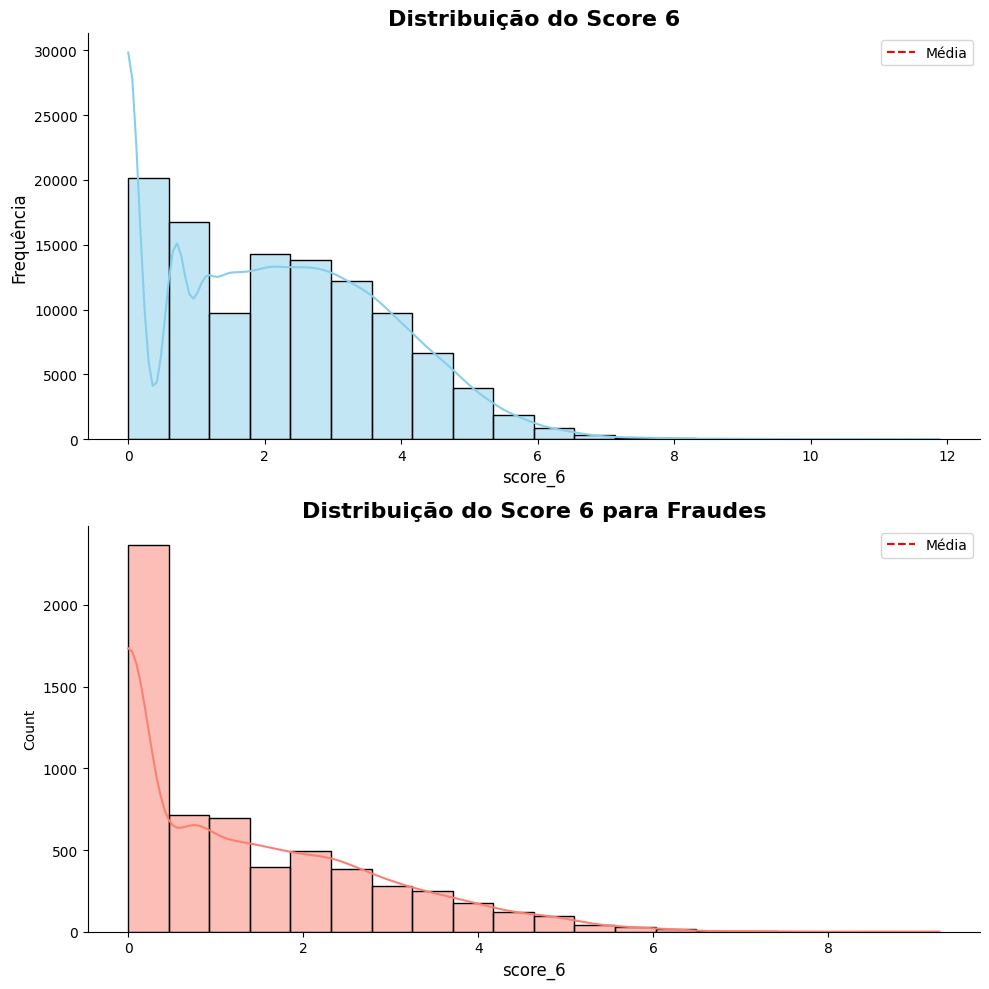

In [68]:
# fraude e score_6
plotar_histogramas_fraude(df, 'score_6', 'Distribuição do Score 6', 'Distribuição do Score 6 para Fraudes', log=True)

* A diferença nas distribuições sugere que o Score 6 pode ser um bom discriminador entre transações fraudulentas e não fraudulentas. Pontuações mais baixas podem estar associadas a um risco maior de fraude.

* A aplicação de uma transformação logarítmica ajudou a revelar essas diferenças. Continuar usando essa transformação no modelo pode melhorar a precisão.

* O Score 6 após a transformação logarítmica, pode ser uma variável valiosa para a detecção de fraudes.

Para provar que a variável Score 6 é boa para o modelo, vamos realizar um teste de hipóteses, usando novamente o teste de Mann-Whitney U, para comparar as distribuições do Score 6 entre transações fraudulentas e não fraudulentas.

Hipóteses:

* Hipótese Nula (H0): As distribuições do Score 6 são iguais para transações fraudulentas e não fraudulentas.
* Hipótese Alternativa (H1): As distribuições do Score 6 são diferentes para transações fraudulentas e não fraudulentas.

In [69]:
# Verificando valores ausentes em score_2 e fraude
print(df['score_6'].isnull().sum())
print(df['fraude'].isnull().sum())

# Removendo linhas com valores ausentes
df_clean = df.dropna(subset=['score_6', 'fraude'])

# Separando os scores_6 para fraudes e não fraudes na forma original
score_6_fraud = df_clean[df_clean['fraude'] == 1]['score_6']
score_6_non_fraud = df_clean[df_clean['fraude'] == 0]['score_6']

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_6_fraud, score_6_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 6 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 6 para transações fraudulentas e não fraudulentas.")

3
0
Estatística do Teste: 216365523.5
P-valor: 0.0
Rejeitamos a Hipótese Nula: As distribuições do Score 6 para transações fraudulentas e não fraudulentas são significativamente diferentes.


Dada a significância estatística, incorporar o Score 6 no modelo de machine learning pode ajudar a melhorar a detecção de fraudes, pois contribui com informações que podem aumentar a precisão do modelo.

### 2.4.7 - Score 7

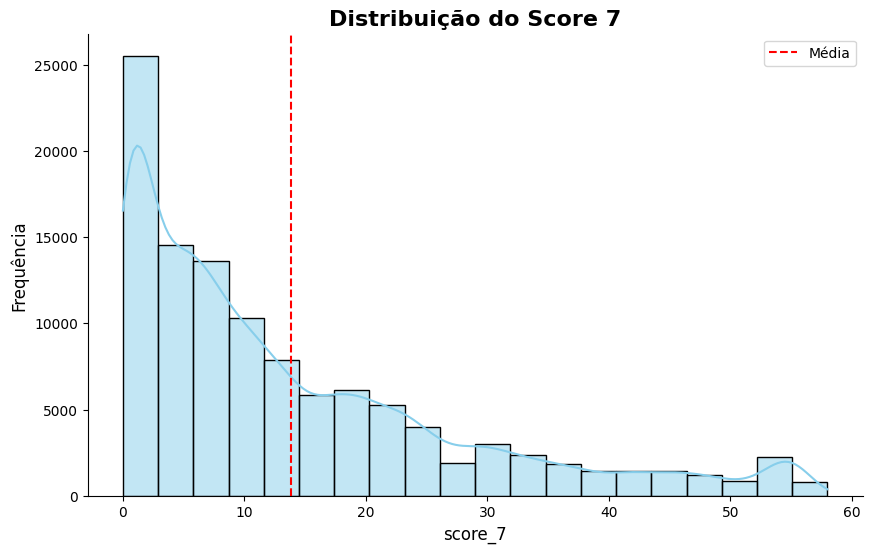

In [70]:
# score_7
criar_histograma(df, 'score_7', 'Distribuição do Score 7')

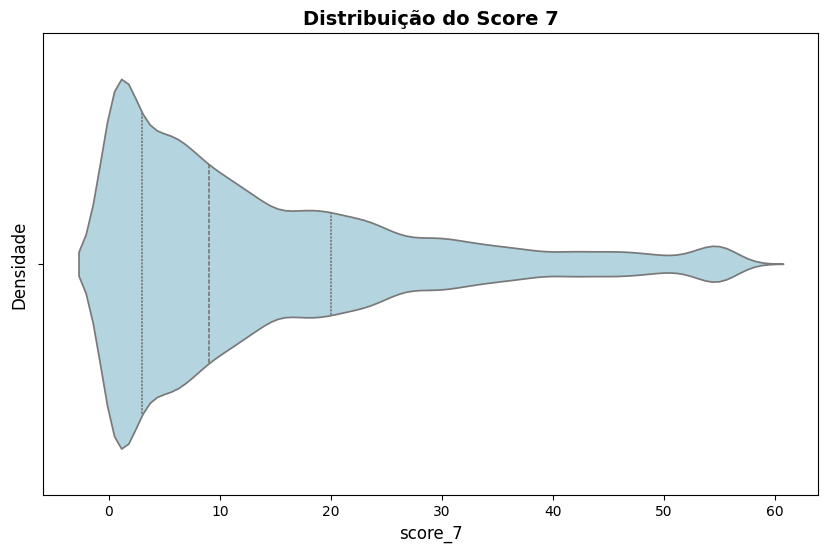

In [71]:
# score_7
criar_violin_plot(df, 'score_7', 'Distribuição do Score 7')

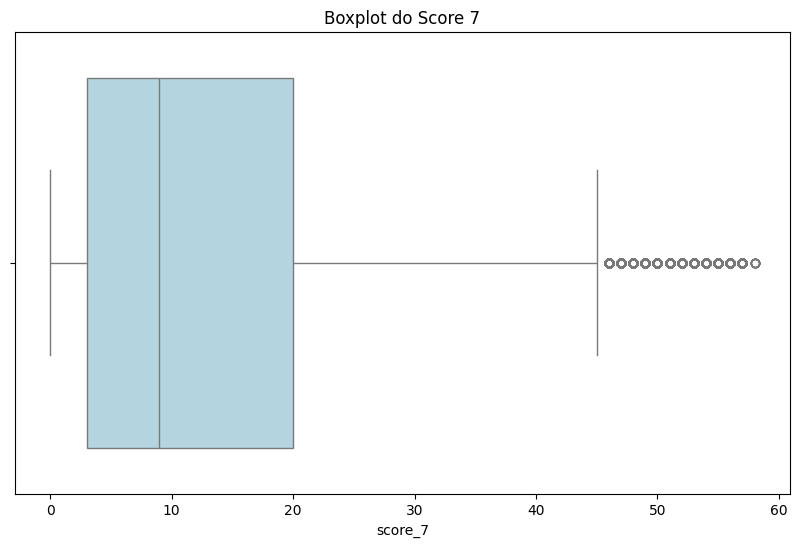

In [72]:
# score_7
criar_boxplot(df, 'score_7', 'Boxplot do Score 7')

In [73]:
# Calculando a Skew da coluna Score_7
skewness = df['score_7'].skew()
print(f'Skew da coluna Score_7: {skewness}')

Skew da coluna Score_7: 1.2945744156560413


In [74]:
# Calculando a curtose da coluna score_7
curtosis = df['score_7'].kurtosis()
print(f'Curtose da coluna score_7: {curtosis}')

Curtose da coluna score_7: 1.001981932488675


* A maioria dos valores de Score 7 está concentrada nos intervalos mais baixos, com a cauda se estendendo para valores mais altos. A Skew de 1.196 confirma a assimetria à direita, mostrando que a maioria dos compradores tem scores relativamente baixos, mas alguns têm scores significativamente altos.

* A média está deslocada para a direita devido aos valores mais altos na cauda, o que é típico em distribuições assimétricas positivas.

* A maior frequência de scores está entre 0 e 10, diminuindo gradualmente conforme os valores aumentam.

* A leve curtose positiva na coluna score_7 sugere uma distribuição com uma presença moderada de outliers. Isso torna os dados mais adequados para modelagem.

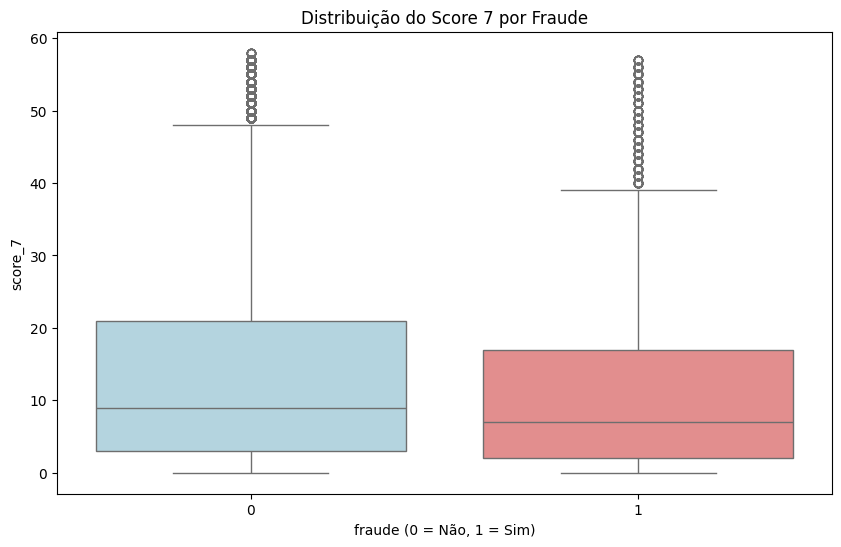

In [75]:
# score_7
criar_boxplot_fraude(df, 'fraude', 'score_7', 'Distribuição do Score 7 por Fraude')

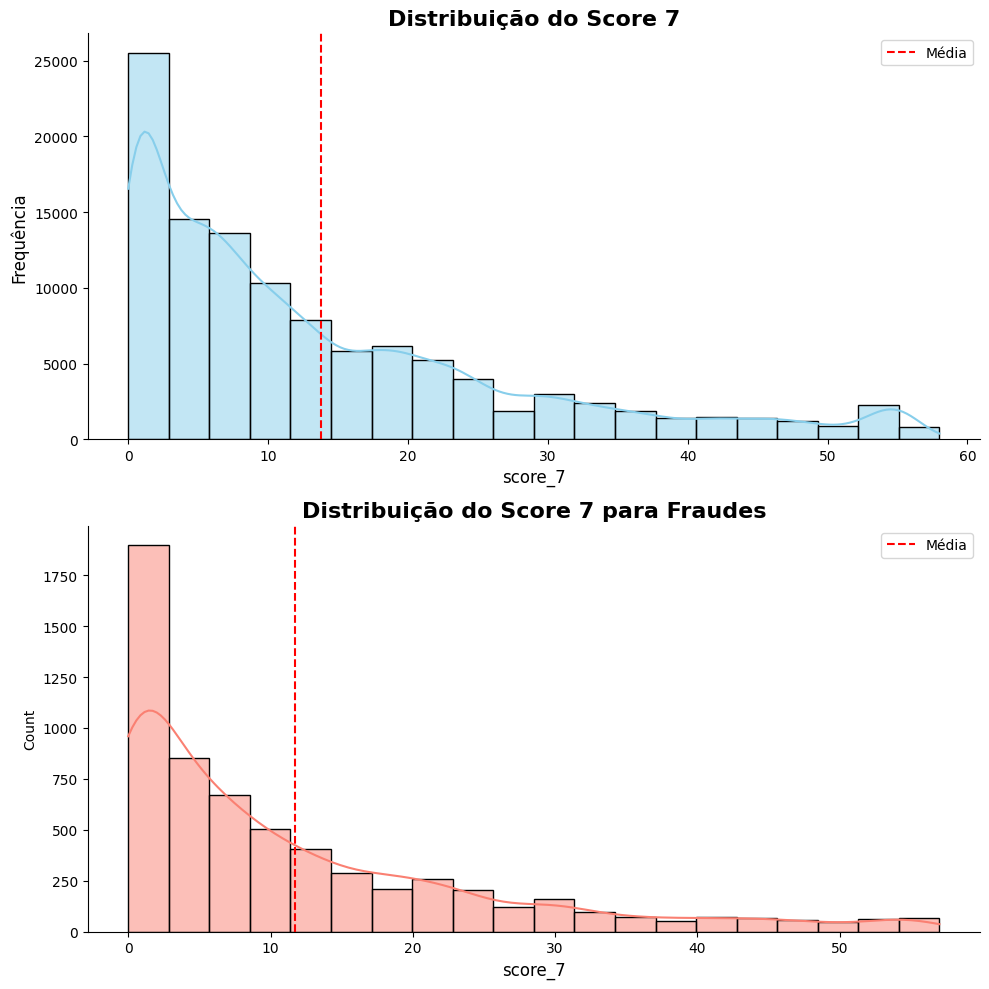

In [76]:
# fraude e score_7
plotar_histogramas_fraude(df, 'score_7', 'Distribuição do Score 7', 'Distribuição do Score 7 para Fraudes')

Vamos realizar um teste de hipóteses para verificar se Score 7 é uma boa variável para o modelo.

Hipóteses:

* Hipótese Nula (H0): As distribuições do Score 7 são iguais para transações fraudulentas e não fraudulentas.
* Hipótese Alternativa (H1): As distribuições do Score 7 são diferentes para transações fraudulentas e não fraudulentas.

In [77]:
# Separar os scores_7 para fraudes e não fraudes na forma original
score_7_fraud = df[df['fraude'] == 1]['score_7']
score_7_non_fraud = df[df['fraude'] == 0]['score_7']

# Realizar o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_7_fraud, score_7_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definir o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 7 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 7 para transações fraudulentas e não fraudulentas.")

Estatística do Teste: 285159282.5
P-valor: 5.353318042133586e-59
Rejeitamos a Hipótese Nula: As distribuições do Score 7 para transações fraudulentas e não fraudulentas são significativamente diferentes.


Incorporar o Score 7 no modelo de machine learning pode ajudar a melhorar a detecção de fraudes, pois ele contribui com informações que podem aumentar a precisão do modelo.

### 2.4.8 - Score 8

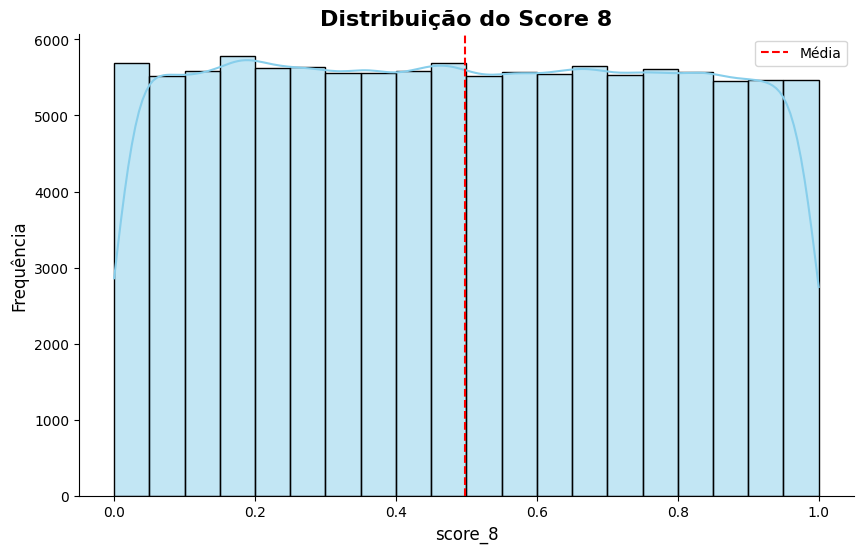

In [78]:
# score_8
criar_histograma(df, 'score_8', 'Distribuição do Score 8')

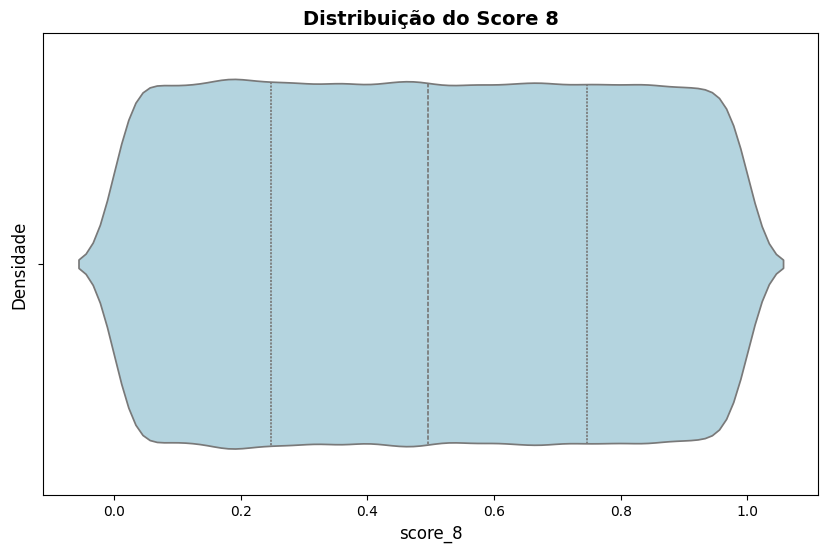

In [79]:
# score_8
criar_violin_plot(df, 'score_8', 'Distribuição do Score 8')

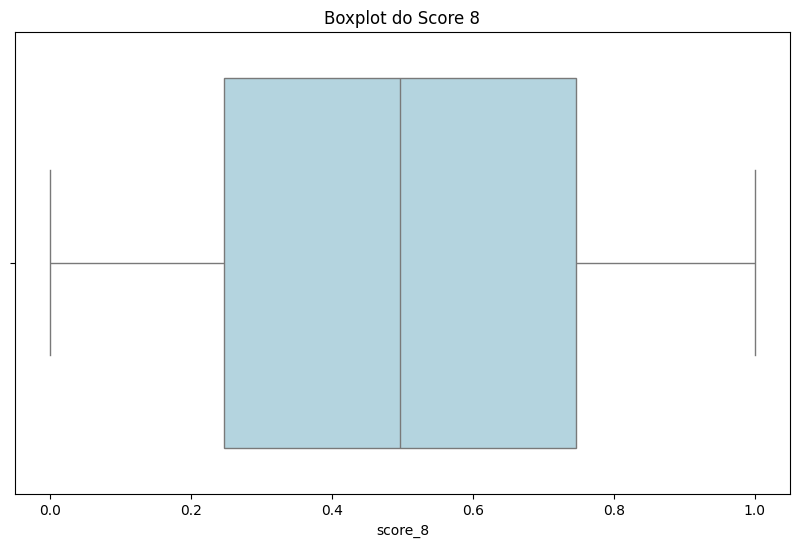

In [80]:
# score_8
criar_boxplot(df, 'score_8', 'Boxplot do Score 8')

In [81]:
# Calculando a Skew da coluna Score_8
skewness = df['score_8'].skew()
print(f'Skew da coluna Score_8: {skewness}')

Skew da coluna Score_8: 0.008631381491530726


In [82]:
# Calculando a curtose da coluna score_8
curtosis = df['score_8'].kurtosis()
print(f'Curtose da coluna score_8: {curtosis}')

Curtose da coluna score_8: -1.1976750319189744


* O Score 8 mostra uma distribuição aproximadamente uniforme, com frequências relativamente constantes ao longo da faixa de valores, exceto nas extremidades (0 e 1), onde há uma queda na frequência.

* A linha vermelha tracejada indica que a média do Score 8 está centralizada em torno de 0.5, sugerindo que os valores do score estão distribuídos igualmente acima e abaixo da média.

* A variabilidade dos scores é baixa, com a maioria das frequências oscilando entre 7000 e 8000, indicando consistência nos valores de Score 8.

* A curtose negativa na coluna score_8 sugere uma distribuição com menos outliers e uma variabilidade mais uniforme. A maior parte dos dados está distribuída uniformemente ao redor da média.

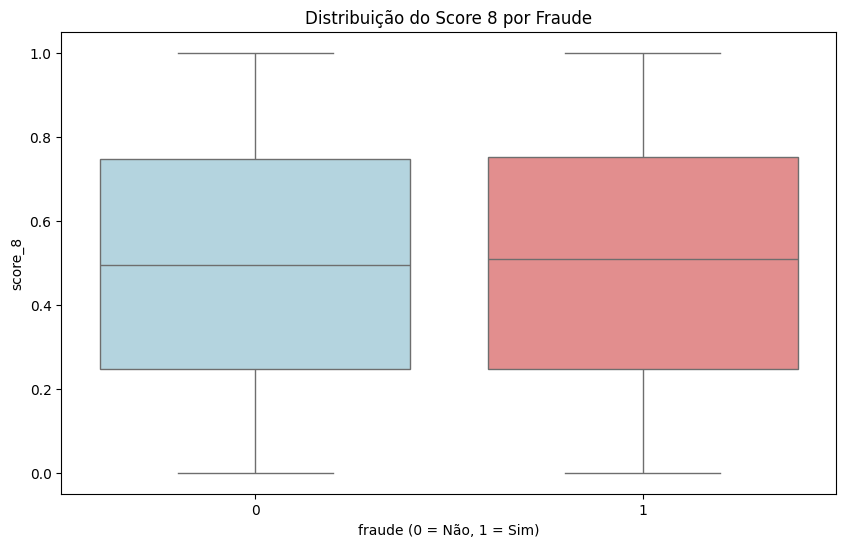

In [83]:
# score_8
criar_boxplot_fraude(df, 'fraude', 'score_8', 'Distribuição do Score 8 por Fraude')

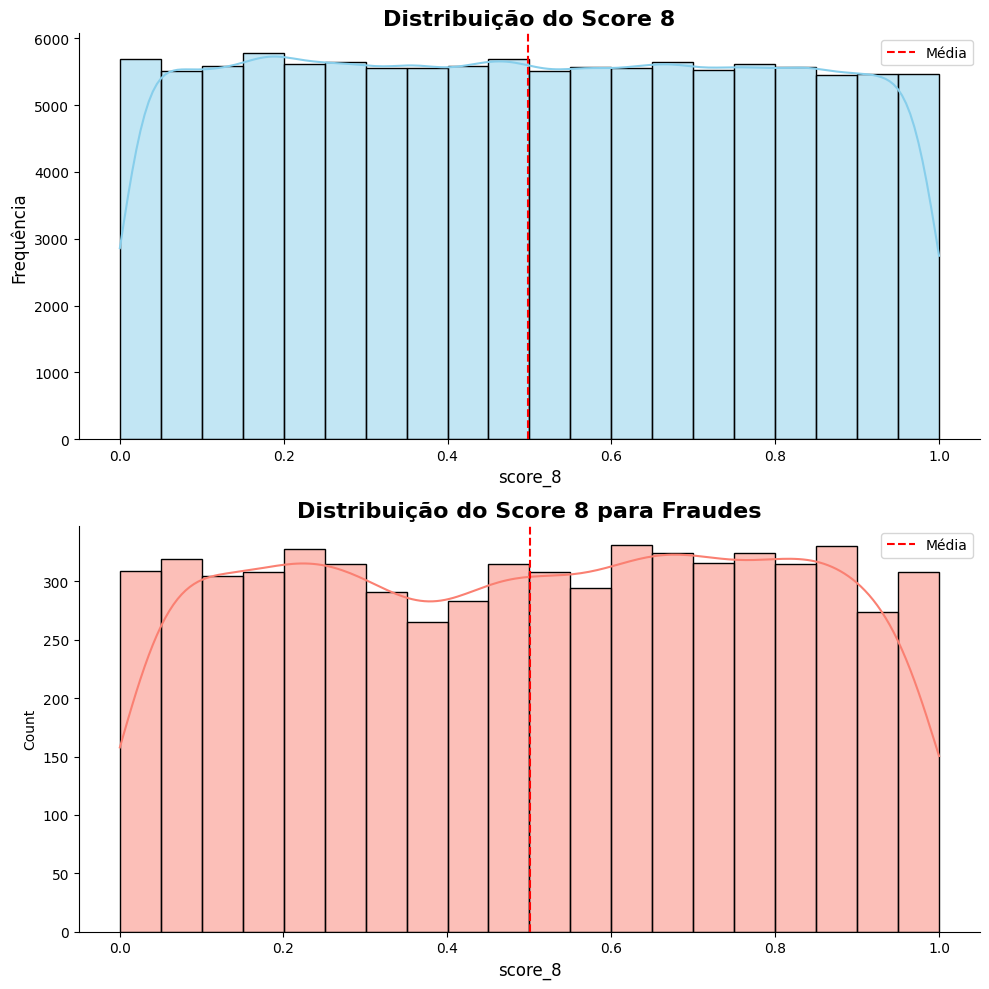

In [84]:
# fraude e score_8
plotar_histogramas_fraude(df, 'score_8', 'Distribuição do Score 8', 'Distribuição do Score 8 para Fraudes')

Vamos realizar um teste de hipóteses para avaliar se o Score 8 é uma boa variável para o modelo de detecção de fraudes.

Hipóteses:

* Hipótese Nula (H0): As distribuições do Score 8 são iguais para transações fraudulentas e não fraudulentas.

* Hipótese Alternativa (H1): As distribuições do Score 8 são diferentes para transações fraudulentas e não fraudulentas.

In [85]:
# Separando os scores_8 para fraudes e não fraudes
score_8_fraud = df[df['fraude'] == 1]['score_8']
score_8_non_fraud = df[df['fraude'] == 0]['score_8']

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_8_fraud, score_8_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 8 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 8 para transações fraudulentas e não fraudulentas.")

Estatística do Teste: 327429114.0
P-valor: 0.3115168516397522
Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 8 para transações fraudulentas e não fraudulentas.


Com base no teste de hipóteses, Score 8 não parece ser uma variável efetiva para distinguir entre fraudes e não fraudes. Sugerindo que sua inclusão no modelo pode não fornecer uma vantagem significativa em termos de precisão preditiva.

### 2.4.9 - Score 9

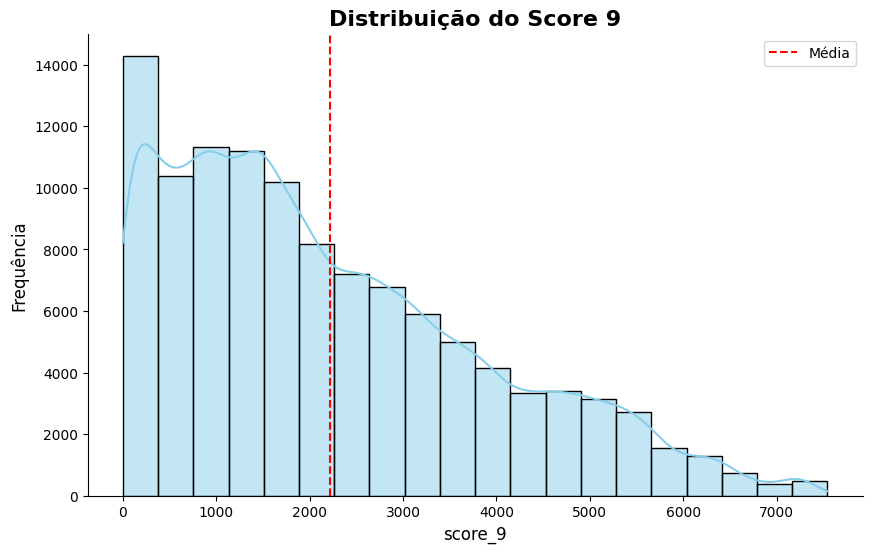

In [86]:
# score_9
criar_histograma(df, 'score_9', 'Distribuição do Score 9')

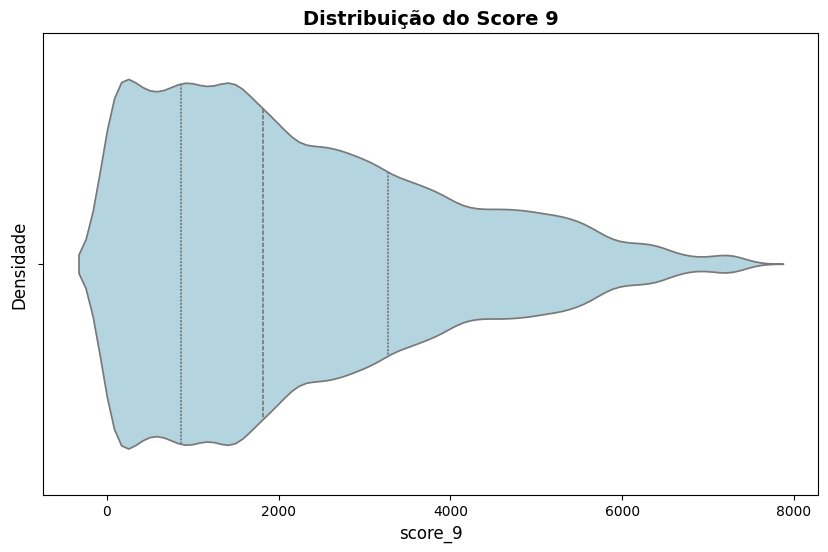

In [87]:
# score_9
criar_violin_plot(df, 'score_9', 'Distribuição do Score 9')

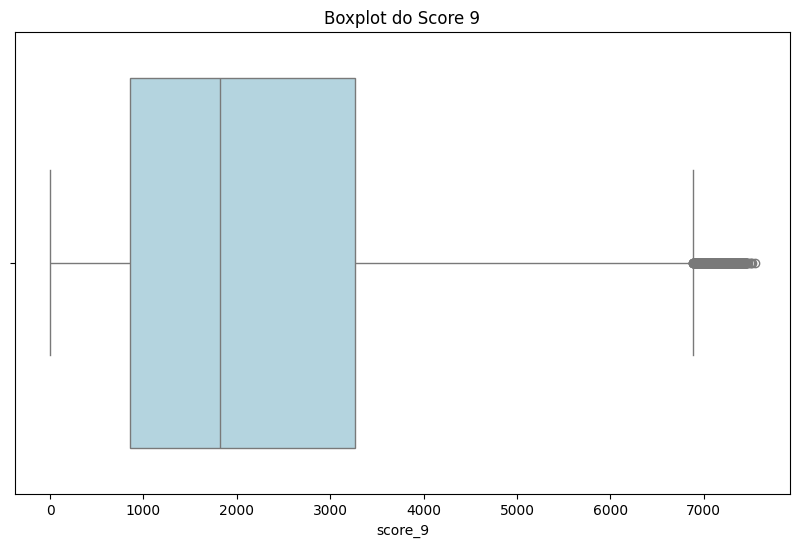

In [88]:
# score_9
criar_boxplot(df, 'score_9', 'Boxplot do Score 9')

In [89]:
# Calculando a Skew da coluna Score_9
skewness = df['score_9'].skew()
print(f'Skew da coluna Score_9: {skewness}')

Skew da coluna Score_9: 0.7715504771190473


In [90]:
# Calculando a curtose da coluna score_9
curtosis = df['score_9'].kurtosis()
print(f'Curtose da coluna score_9: {curtosis}')

Curtose da coluna score_9: -0.1704889104431606


* O gráfico mostra uma distribuição com uma leve assimetria à direita, onde a frequência é maior em valores mais baixos e diminui gradualmente conforme os valores aumentam. O que se confirma com a Skew de 0.77.

* A linha vermelha tracejada indicando a média, sugere que os valores tendem a se concentrar em torno dos valores mais baixos, mas ainda há uma quantidade significativa de valores altos que puxam a média para cima.

* A leve curtose negativa sugere uma ocorrência relativamente baixa de outliers. Em termos de detecção de fraudes, isso pode significar que a maioria das transações tem scores de fraude mais consistentes e menos variáveis.

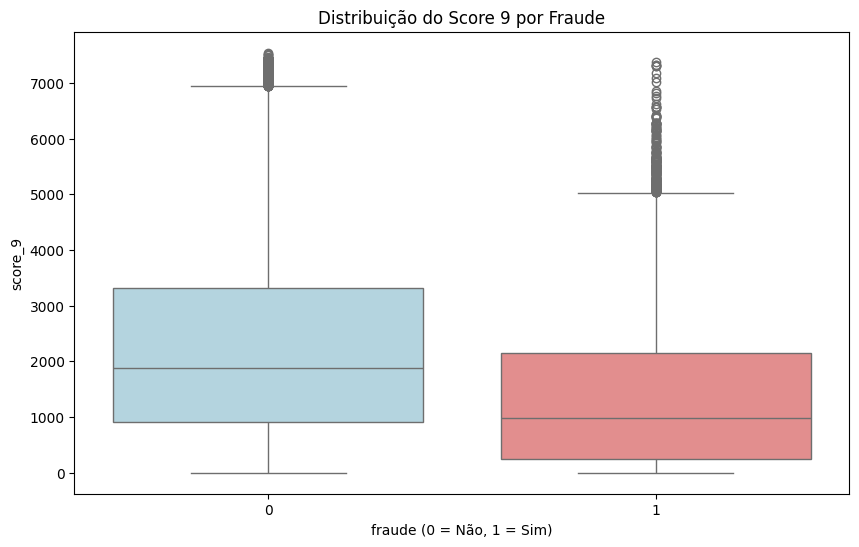

In [91]:
# score_9
criar_boxplot_fraude(df, 'fraude', 'score_9', 'Distribuição do Score 9 por Fraude')

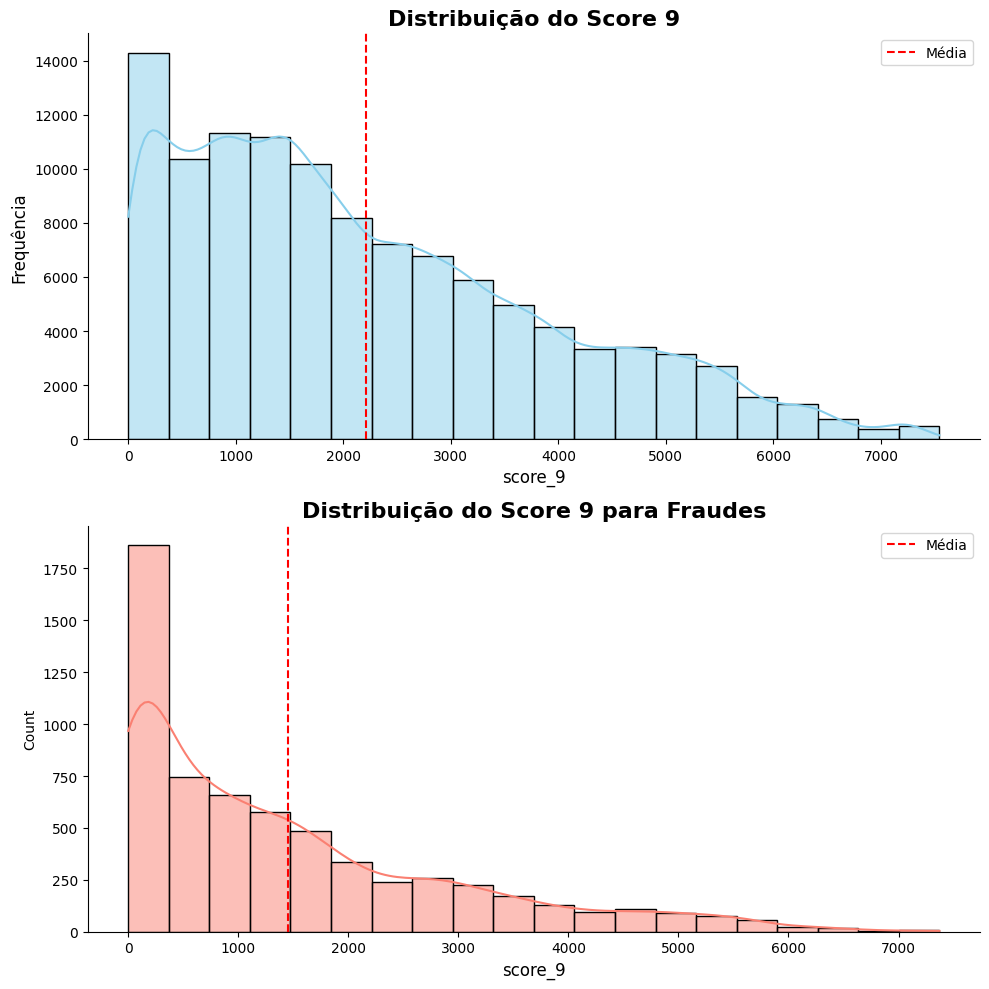

In [92]:
# fraude e score_9
plotar_histogramas_fraude(df, 'score_9', 'Distribuição do Score 9', 'Distribuição do Score 9 para Fraudes')

A tendência de fraudes terem score_9 mais baixos pode ser explorada no modelo de detecção, ajudando a identificar transações suspeitas.

Para confirmar, vamos realizar um teste de hipóteses para verificar se o Score 9 é uma boa variável para o modelo. Mesmo a skew sendo próxima de zero(skew=0.77), não haverá a necessidade de testar a normalidade dos dados, pois pelo gráfico podemos rejeitar essa hipotese.

Hipóteses:

* Hipótese Nula (H0): As distribuições do Score 9 são iguais para transações fraudulentas e não fraudulentas.

* Hipótese Alternativa (H1): As distribuições do Score 9 são diferentes para transações fraudulentas e não fraudulentas.

In [93]:
# Verificando valores ausentes em score_9 e fraude
print(df['score_9'].isnull().sum())
print(df['fraude'].isnull().sum())

# Removendo linhas com valores ausentes
df_clean = df.dropna(subset=['score_9', 'fraude'])

# Separando os scores_9 para fraudes e não fraudes
score_9_fraud = df_clean[df_clean['fraude'] == 1]['score_9']
score_9_non_fraud = df_clean[df_clean['fraude'] == 0]['score_9']

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_9_fraud, score_9_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 9 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 9 para transações fraudulentas e não fraudulentas.")

3
0
Estatística do Teste: 222422772.0
P-valor: 0.0
Rejeitamos a Hipótese Nula: As distribuições do Score 9 para transações fraudulentas e não fraudulentas são significativamente diferentes.


A diferença significativa sugere que Score 9 pode distinguir eficazmente entre fraudes e transações legítimas. Sua inclusão pode melhorar a precisão do modelo.

### 2.4.10 - Score 10

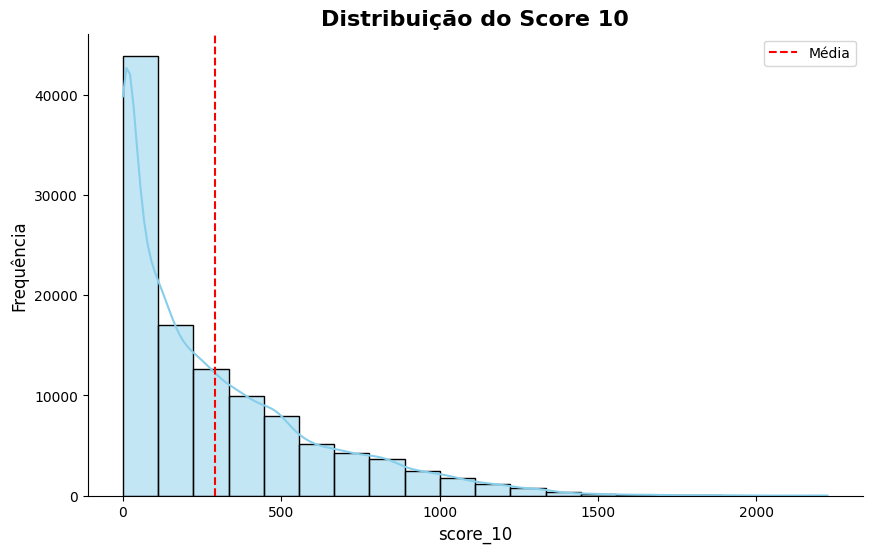

In [94]:
# score_10
criar_histograma(df, 'score_10', 'Distribuição do Score 10')

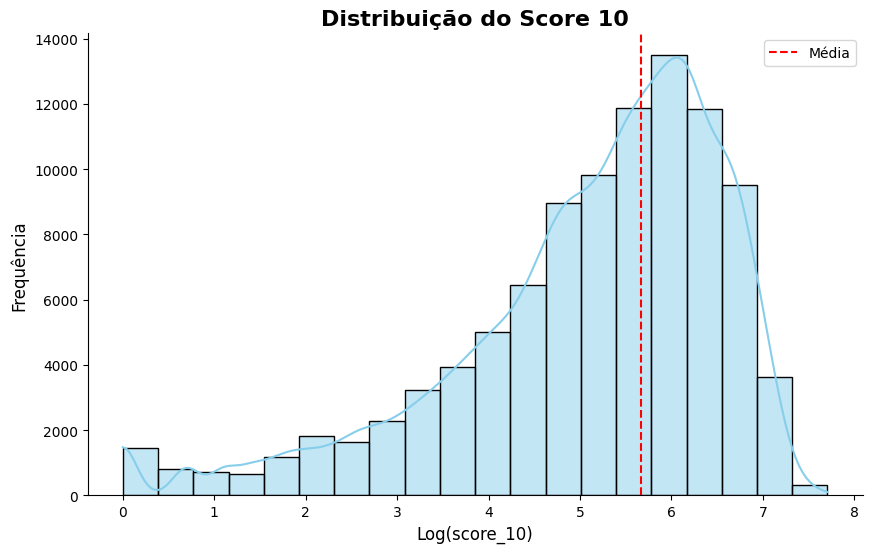

In [95]:
# score_10
criar_histograma(df, 'score_10', 'Distribuição do Score 10', log=True)

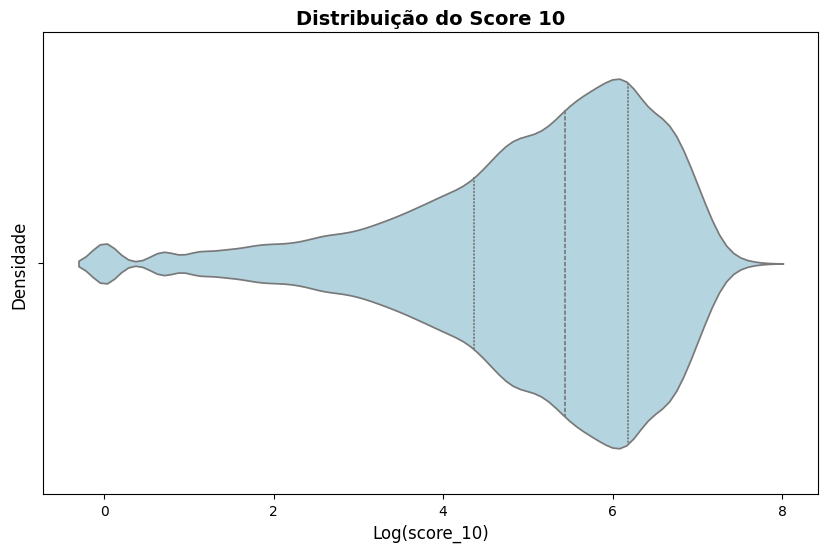

In [96]:
# score_10
criar_violin_plot(df, 'score_10', 'Distribuição do Score 10', log=True)

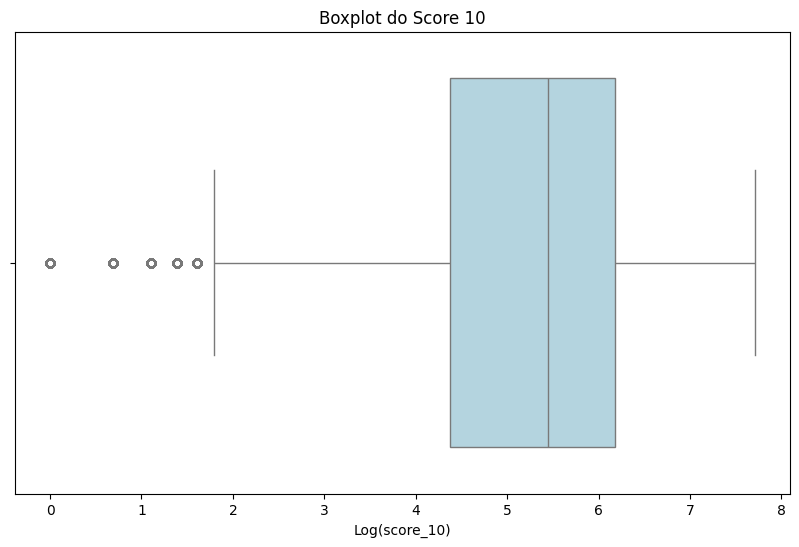

In [97]:
# score_10
criar_boxplot(df, 'score_10', 'Boxplot do Score 10', log=True)

In [98]:
# Calculando a Skew da coluna Score_10
skewness = np.log1p(df['score_10']).skew()
print(f'Skew da coluna Score_10: {skewness}')

Skew da coluna Score_10: -1.036234312456903


In [99]:
# Calculando a curtose da coluna score_10
curtosis = df['score_10'].kurtosis()
print(f'Curtose da coluna score_10: {curtosis}')

Curtose da coluna score_10: 1.9726028276025311


* O valor negativo da Skew indica que a distribuição é assimétrica à esquerda. A maioria dos dados está concentrada à direita da média, com uma cauda longa à esquerda.

* A maior parte dos dados está concentrada entre os valores de Log(score_10) de aproximadamente 4 a 7, com um pico em torno de 6. Isso sugere que a maioria dos scores está em uma faixa específica, com poucos valores extremamente baixos.

* A linha vermelha tracejada indica a média da distribuição, que está próxima do pico da distribuição, mas ligeiramente deslocada para a direita devido à assimetria.

* A curtose positiva na coluna score_10 sugere uma distribuição com uma presença moderada de outliers. Isso torna os dados mais adequados para modelagem, com uma necessidade menor de tratamento intensivo de outliers.

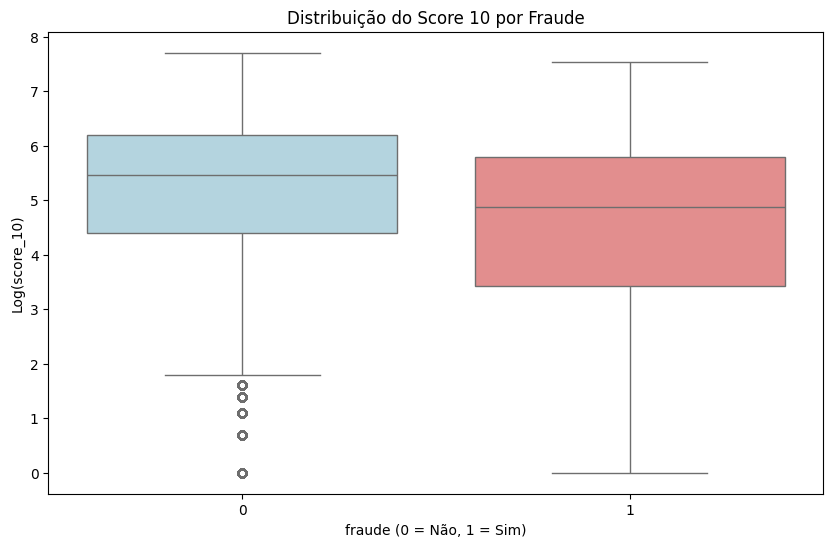

In [100]:
# score_10
criar_boxplot_fraude(df, 'fraude', 'score_10', 'Distribuição do Score 10 por Fraude', log=True)

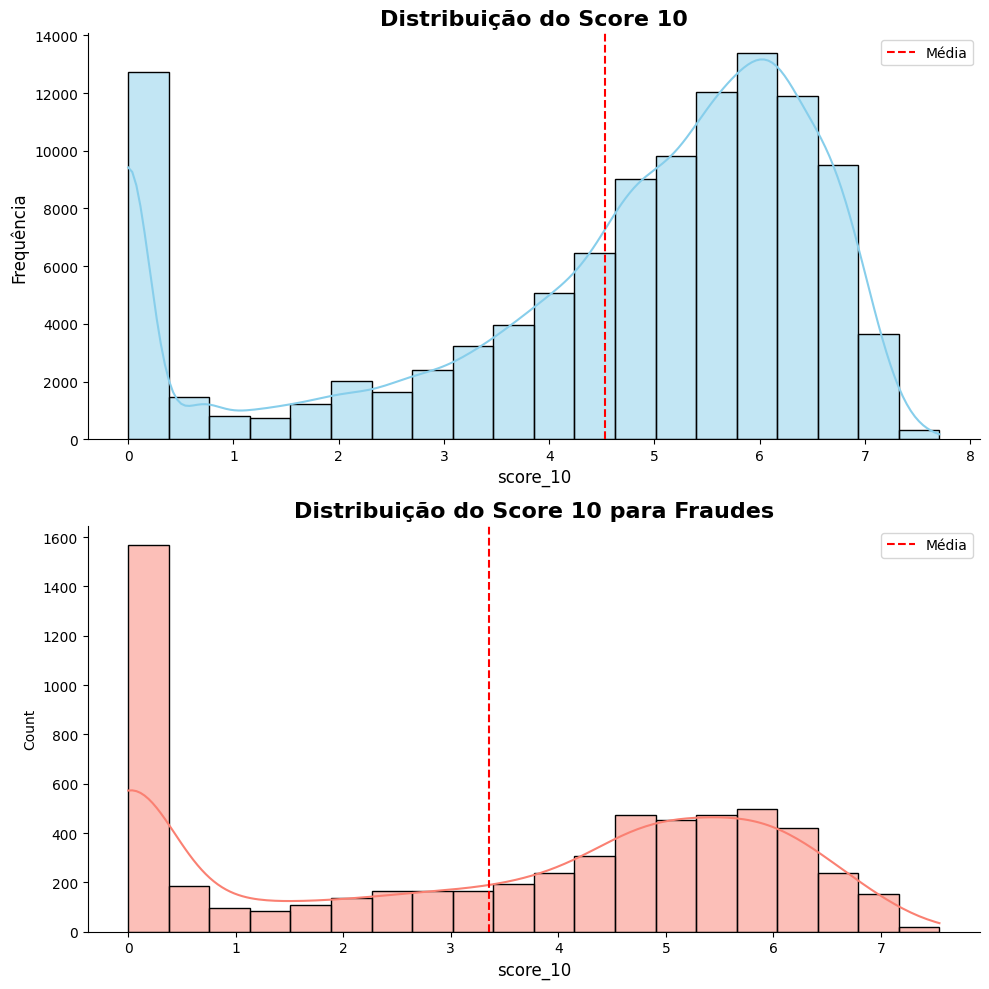

In [101]:
# fraude e score_10
plotar_histogramas_fraude(df, 'score_10', 'Distribuição do Score 10', 'Distribuição do Score 10 para Fraudes', log=True)

A presença de picos em 0 e a ligeira diferença na média entre fraudes e não fraudes, indicando quanto menor o score maior a probabilidade de fraude, sugerem que score_10 pode ser útil como um indicador de risco.

Vamos novamente realizar um teste de hipóteses para verificar se o Score 10 é uma boa variável para o modelo.

Hipóteses:

* Hipótese Nula (H0): As distribuições do Score 10 são iguais para transações fraudulentas e não fraudulentas.

* Hipótese Alternativa (H1): As distribuições do Score 10 são diferentes para transações fraudulentas e não fraudulentas.

Vamos comparar as distribuições usando o teste de Mann-Whitney U

In [102]:
# Verificando valores ausentes em score_10 e fraude
print(df['score_10'].isnull().sum())
print(df['fraude'].isnull().sum())

# Removendo linhas com valores ausentes
df_clean = df.dropna(subset=['score_10', 'fraude'])

# Separar os scores_10 para fraudes e não fraudes
score_10_fraud = df_clean[df_clean['fraude'] == 1]['score_10']
score_10_non_fraud = df_clean[df_clean['fraude'] == 0]['score_10']

# Realizar o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(score_10_fraud, score_10_non_fraud)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definir o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições do Score 10 para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições do Score 10 para transações fraudulentas e não fraudulentas.")

223
0
Estatística do Teste: 225872269.0
P-valor: 0.0
Rejeitamos a Hipótese Nula: As distribuições do Score 10 para transações fraudulentas e não fraudulentas são significativamente diferentes.


Incorporar Score 10 no modelo deve aumentar a precisão ao identificar fraudes, dado que captura padrões comportamentais distintos.

### 2.4.11 - Conclusão

De todos os 10 scores testados, apenas o score 8 não será usado no modelo, pois as trasações fraudulentas não são significamente diferentes das não fraudulentas. 

## 2.5 - Entrega dos documentos

### 2.5.1 - entrega_doc_1

In [103]:
df.entrega_doc_1.value_counts()

entrega_doc_1
1    100114
0     11514
Name: count, dtype: int64

In [104]:
# Verificando valores vazios
df.entrega_doc_1.isnull().sum()

0

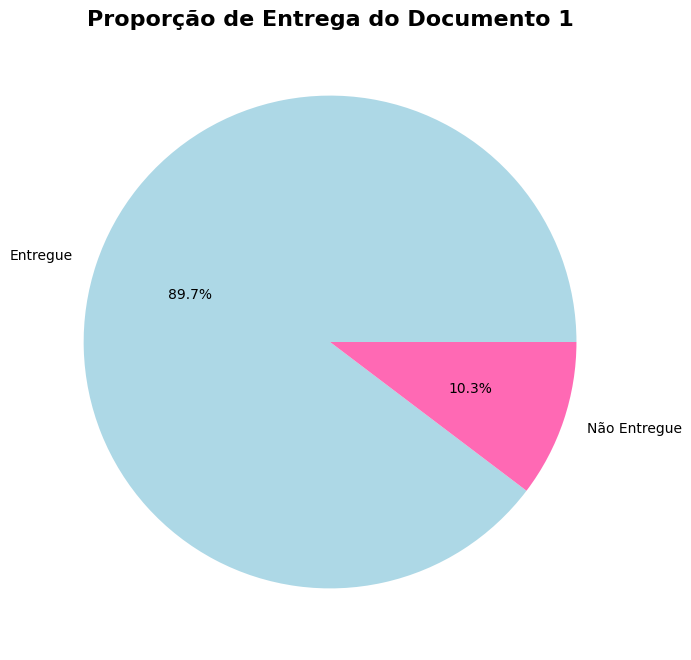

In [105]:
# Contando a quantidade de entregas e não entregas do documento 1
doc_counts = df['entrega_doc_1'].value_counts()

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 8))

# Criando o gráfico de pizza para a proporção de entrega do documento 1
plt.pie(doc_counts, labels=['Entregue', 'Não Entregue'], autopct='%1.1f%%', colors=['lightblue', 'HotPink'])

# Adicionando o título ao gráfico
plt.title('Proporção de Entrega do Documento 1', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()


In [106]:
def analisar_entrega_doc(df, x, titulo_grafico, nome_variavel):
    # Configurando o tamanho da figura do gráfico
    plt.figure(figsize=(12, 6))

    # Criando o gráfico de barras empilhadas para a frequência de fraudes por entrega do documento 1
    sns.countplot(x=x, hue='fraude', data=df)

    # Adicionando o título ao gráfico
    plt.title(titulo_grafico, fontsize=16, fontweight='bold')

    # Configurando o rótulo do eixo X
    plt.xlabel(nome_variavel, fontsize=14)

    # Configurando o rótulo do eixo Y
    plt.ylabel('Contagem', fontsize=14)

    # Adicionando a legenda ao gráfico
    plt.legend(title='Fraude', loc='upper right', labels=['Não Fraudulenta', 'Fraudulenta'])

    # Adicionando os rótulos das categorias no eixo X
    plt.xticks([0, 1], ['Não Entregue', 'Entregue'])

    # Exibindo o gráfico
    plt.show()

    # Agrupando por x e calculando a contagem de fraudes e não fraudes
    grouped_doc1_perc = df.groupby(x)['fraude'].value_counts(normalize=True).unstack() * 100

    # Renomeando as colunas para algo mais compreensível
    grouped_doc1_perc.columns = ['Não Fraudulenta (%)', 'Fraudulenta (%)']

    return grouped_doc1_perc

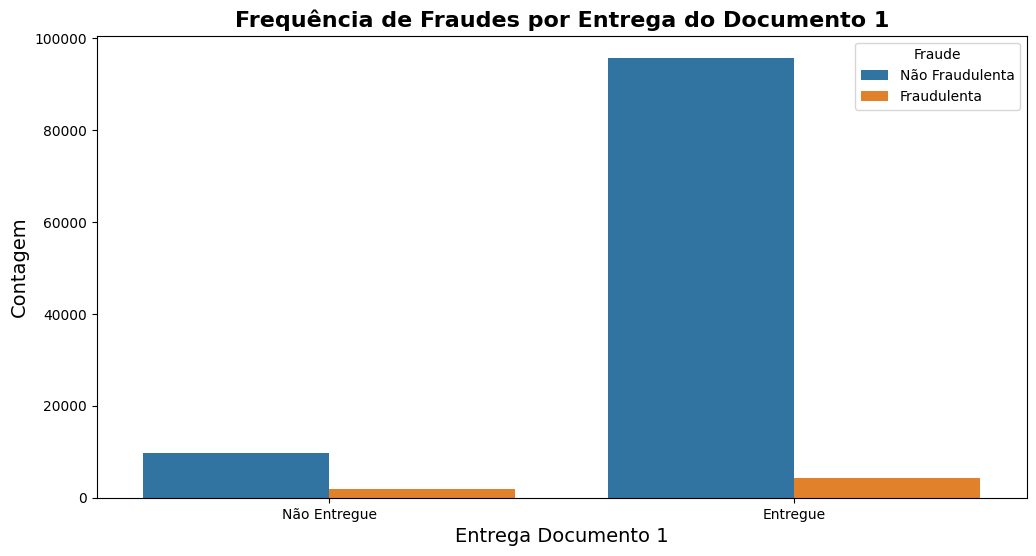

Não Fraudulenta (%)  Fraudulenta (%)
entrega_doc_1                                      
0                        83.837068        16.162932
1                        95.703898         4.296102

In [107]:
analisar_entrega_doc(df, 'entrega_doc_1', 'Frequência de Fraudes por Entrega do Documento 1', 'Entrega Documento 1')

* As transações onde o documento 1 não foi entregue (0) têm uma taxa de fraude significativamente maior (16.16%) comparada às transações onde o documento foi entregue (1) com uma taxa de fraude de apenas 4.30%, ou seja, a entrega do documento 1 é um fator importante na redução da probabilidade de fraude.

* A entrega do documento 1 parece ser uma medida eficaz de verificação. Transações com o documento entregue têm uma taxa muito menor de fraude, indicando que essa verificação ajuda a identificar atividades fraudulentas.

Para confirmarmos que a entrega do documento 1 influencia a ocorrência de fraude, iremos usar o Teste Qui-Quadrado de Independência, pois ele verifica se há uma associação significativa entre duas variáveis categóricas.

Hipóteses:
* Hipótese Nula (H0): Não há associação entre a entrega do documento e a ocorrência de fraude.

* Hipótese Alternativa (H1): Há uma associação entre a entrega do documento e a ocorrência de fraude.

In [108]:
# Criando uma tabela de contingência para entrega_doc_1 e fraude
contingency_table = pd.crosstab(df['entrega_doc_1'], df['fraude'])

# Realizando o teste Qui-Quadrado de Independência
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Estatística do Teste: {chi2}')
print(f'P-valor: {p}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p < alpha:
    print("Rejeitamos a Hipótese Nula: Há uma associação significativa entre a entrega do documento e a ocorrência de fraude.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma associação significativa entre a entrega do documento e a ocorrência de fraude.")


Estatística do Teste: 2785.9604716099807
P-valor: 0.0
Rejeitamos a Hipótese Nula: Há uma associação significativa entre a entrega do documento e a ocorrência de fraude.


O p-valor de 0.0 indica uma associação estatisticamente significativa entre a entrega do documento 1 e a ocorrência de fraude. Isso confirma que a entrega (ou não entrega) do documento tem uma influência direta nas chances de uma transação ser fraudulenta.

### 2.5.2 - entrega_doc_2

In [109]:
df.entrega_doc_2.isnull().sum()

80773

In [110]:
df.entrega_doc_2.value_counts()

entrega_doc_2
Y    17719
N    13136
Name: count, dtype: int64

In [111]:
# Substituir valores vazios por 0 na coluna especificada
df['entrega_doc_2'].fillna(0, inplace=True)
# Substituindo os valores Y por 1 e N por 0
df['entrega_doc_2'] = df['entrega_doc_2'].replace({'Y': 1, 'N': 0})

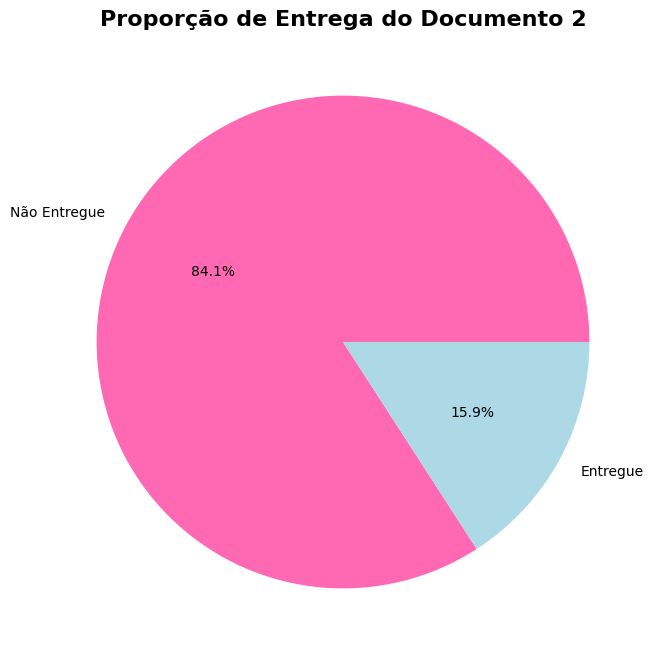

In [112]:
# Contando a quantidade de entregas e não entregas do documento 2
doc_counts = df['entrega_doc_2'].value_counts()

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 8))

# Criando o gráfico de pizza para a proporção de entrega do documento 2
plt.pie(doc_counts, labels=['Não Entregue', 'Entregue'], autopct='%1.1f%%', colors=['HotPink', 'lightblue'])

# Adicionando o título ao gráfico
plt.title('Proporção de Entrega do Documento 2', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()

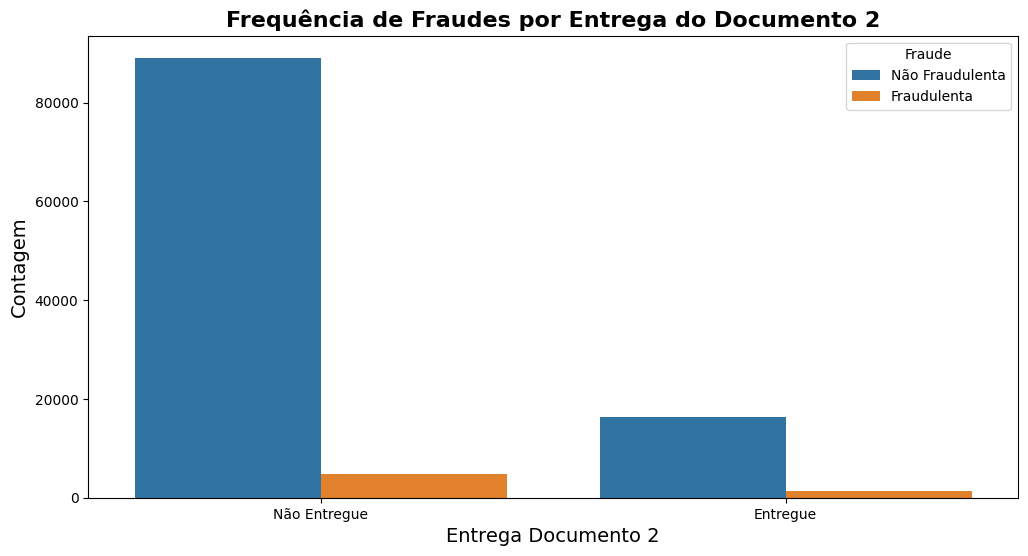

Não Fraudulenta (%)  Fraudulenta (%)
entrega_doc_2                                      
0                        94.852464         5.147536
1                        92.505220         7.494780

In [113]:
analisar_entrega_doc(df, 'entrega_doc_2', 'Frequência de Fraudes por Entrega do Documento 2', 'Entrega Documento 2')

* A entrega do documento 2 (entrega_doc_2) pode estar associada a um risco maior de fraude. Pode valer a pena investigar mais a fundo por que as transações com o documento entregue têm uma taxa de fraude mais alta.

* A entrega do documento 2 pode ser um critério a ser revisado ou reformulado. Pode ser interessante verificar se existem inconsistências ou falsificações nos documentos entregues.

* Considerar a integração de entrega_doc_2 no modelo de detecção de fraudes, mas com uma análise cuidadosa para entender seu impacto.

Para verificar se faz sentido usar essa variável no modelo de machine learning, iremos realizar um Teste Qui-Quadrado de Independência.

Hipóteses:
* Hipótese Nula (H0): Não há associação entre a entrega do documento 2 e a ocorrência de fraude.

* Hipótese Alternativa (H1): Há uma associação entre a entrega do documento 2 e a ocorrência de fraude.

In [114]:
# Criar uma tabela de contingência para entrega_doc_2 e fraude
contingency_table = pd.crosstab(df['entrega_doc_2'], df['fraude'])

# Realizar o teste Qui-Quadrado de Independência
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Estatística do Teste: {chi2}')
print(f'P-valor: {p}')

# Definir o nível de significância
alpha = 0.01  # 99% de confiança

if p < alpha:
    print("Rejeitamos a Hipótese Nula: Há uma associação significativa entre a entrega do documento 2 e a ocorrência de fraude.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma associação significativa entre a entrega do documento 2 e a ocorrência de fraude.")


Estatística do Teste: 157.02161772971937
P-valor: 5.063212603934679e-36
Rejeitamos a Hipótese Nula: Há uma associação significativa entre a entrega do documento 2 e a ocorrência de fraude.


O p-valor extremamente baixo confirma uma associação estatisticamente significativa entre a entrega do documento 2 e a ocorrência de fraude, ou seja, a entrega ou não do documento 2 impacta a probabilidade de uma transação ser fraudulenta.

### 2.5.3 - entrega_doc_3

In [115]:
df.entrega_doc_3.isnull().sum()

0

In [116]:
df.entrega_doc_3.value_counts()

entrega_doc_3
Y    60616
N    51012
Name: count, dtype: int64

In [117]:
# Substituindo os valores Y por 1 e N por 0
df['entrega_doc_3'] = df['entrega_doc_3'].replace({'Y': 1, 'N': 0})

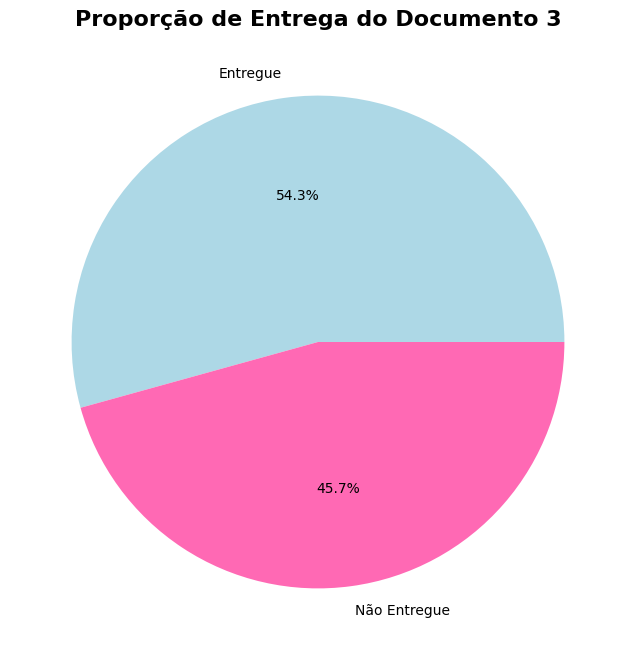

In [118]:
# Contando a quantidade de entregas e não entregas do documento 2
doc_counts = df['entrega_doc_3'].value_counts()

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 8))

# Criando o gráfico de pizza para a proporção de entrega do documento 2
plt.pie(doc_counts, labels=['Entregue', 'Não Entregue'], autopct='%1.1f%%', colors=['lightblue', 'HotPink'])

# Adicionando o título ao gráfico
plt.title('Proporção de Entrega do Documento 3', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()

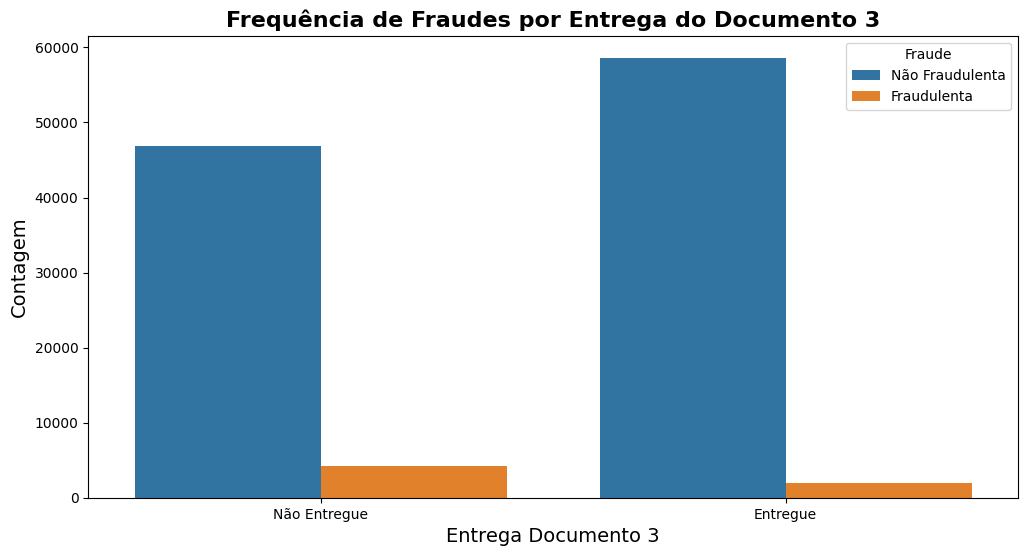

Não Fraudulenta (%)  Fraudulenta (%)
entrega_doc_3                                      
0                        91.815651         8.184349
1                        96.721988         3.278012

In [119]:
analisar_entrega_doc(df, 'entrega_doc_3', 'Frequência de Fraudes por Entrega do Documento 3', 'Entrega Documento 3')

* Quando o documento 3 não é entregue (0), a taxa de fraude é de 8.18%.

* Quando o documento 3 é entregue (1), a taxa de fraude cai significativamente para 3.28%.

* A entrega do documento 3 parece ser uma medida eficaz na redução da probabilidade de fraude. As transações que entregam o documento 3 têm uma taxa de fraude muito menor.

 Implementar ou reforçar a exigência de entrega do documento 3 pode ser uma estratégia eficaz para mitigar fraudes.

Para verificar se faz sentido usar a variável entrega_doc_3 no modelo de machine learning, vamos realizar um Teste Qui-Quadrado de Independência.

Hipóteses:
* Hipótese Nula (H0): Não há associação entre a entrega do documento 3 e a ocorrência de fraude.

* Hipótese Alternativa (H1): Há uma associação entre a entrega do documento 3 e a ocorrência de fraude.

In [120]:
# Criando uma tabela de contingência para entrega_doc_3 e fraude
contingency_table = pd.crosstab(df['entrega_doc_3'], df['fraude'])

# Realizando o teste Qui-Quadrado de Independência
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Estatística do Teste: {chi2}')
print(f'P-valor: {p}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p < alpha:
    print("Rejeitamos a Hipótese Nula: Há uma associação significativa entre a entrega do documento 3 e a ocorrência de fraude.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma associação significativa entre a entrega do documento 3 e a ocorrência de fraude.")


Estatística do Teste: 1277.5962537254113
P-valor: 8.354153133989186e-280
Rejeitamos a Hipótese Nula: Há uma associação significativa entre a entrega do documento 3 e a ocorrência de fraude.


Dada a significância estatística, entrega_doc_3 é uma variável importante a ser incluída no modelo de detecção de fraudes. Sua capacidade de reduzir a incidência de fraudes pode aumentar a precisão do modelo.

### 2.5.4 - Conclusão

Todas as variáveis relacionadas à entrega de documentos são estatisticamente significativas para o modelo de machine learning, indicando que a entrega ou não entrega desses documentos tem uma influência substancial na detecção de fraudes. Essas variáveis devem ser integradas ao modelo preditivo para aumentar sua precisão e eficácia na identificação de transações fraudulentas.

## 2.6 - Data da compra

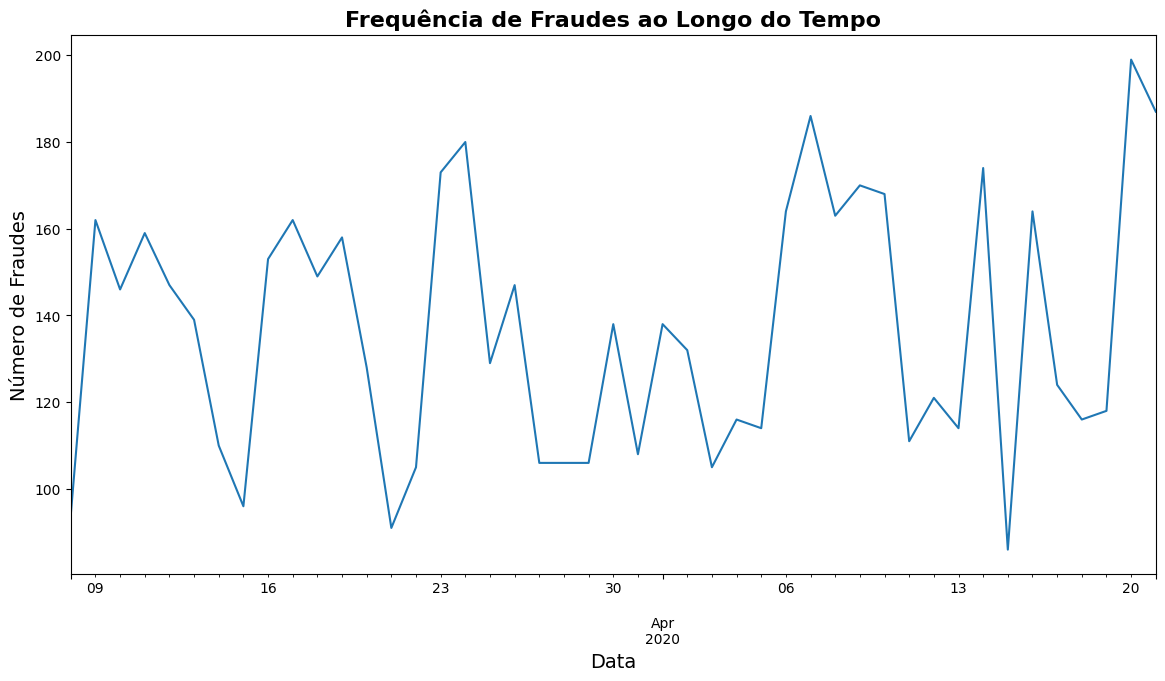

In [121]:
# Convertendo a coluna de data e hora para datetime
df['data_compra'] = pd.to_datetime(df['data_compra'])

# Definindo a coluna de data e hora como índice
df.set_index('data_compra', inplace=True)

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Resampleando os dados para calcular a soma das fraudes em uma base mensal
df['fraude'].resample('D').sum().plot()

# Adicionando o título ao gráfico
plt.title('Frequência de Fraudes ao Longo do Tempo', fontsize=16, fontweight='bold')

# Configurando o rótulo do eixo X
plt.xlabel('Data', fontsize=14)

# Configurando o rótulo do eixo Y
plt.ylabel('Número de Fraudes', fontsize=14)

# Exibindo o gráfico
plt.show()


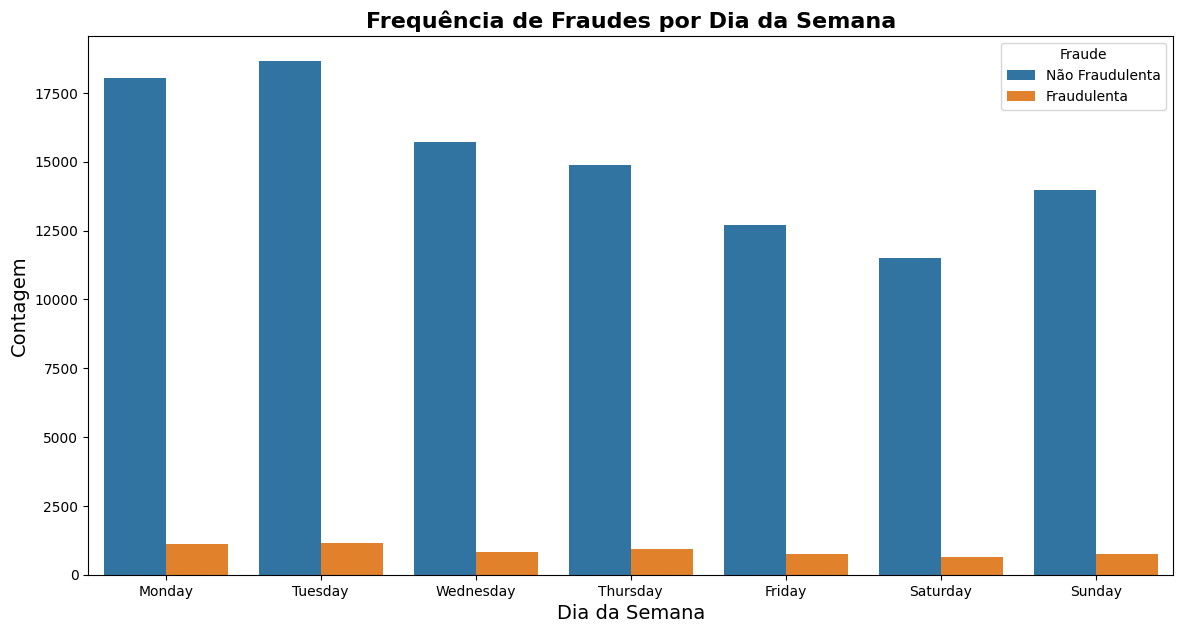

Não Fraudulenta (%)  Fraudulenta (%)
dia_da_semana                                      
Friday                   94.280196         5.719804
Monday                   94.236597         5.763403
Saturday                 94.659875         5.340125
Sunday                   94.875977         5.124023
Thursday                 94.191344         5.808656
Tuesday                  94.224648         5.775352
Wednesday                95.019944         4.980056

In [122]:
# Extraindo o nome do dia da semana a partir do índice de data e hora
df['dia_da_semana'] = df.index.day_name()

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o gráfico de barras para a frequência de fraudes por dia da semana
sns.countplot(x='dia_da_semana', hue='fraude', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Adicionando o título ao gráfico
plt.title('Frequência de Fraudes por Dia da Semana', fontsize=16, fontweight='bold')

# Configurando o rótulo do eixo X
plt.xlabel('Dia da Semana', fontsize=14)

# Configurando o rótulo do eixo Y
plt.ylabel('Contagem', fontsize=14)

# Adicionando a legenda ao gráfico
plt.legend(title='Fraude', labels=['Não Fraudulenta', 'Fraudulenta'])

# Exibindo o gráfico
plt.show()

# Agrupando por dia da semana e calculando a contagem de fraudes e não fraudes
grouped_weekday_perc = df.groupby('dia_da_semana')['fraude'].value_counts(normalize=True).unstack() * 100

# Renomeando as colunas para algo mais compreensível
grouped_weekday_perc.columns = ['Não Fraudulenta (%)', 'Fraudulenta (%)']

# Exibindo o DataFrame resultante
grouped_weekday_perc


A taxa de fraudes varia ligeiramente ao longo da semana, mas todas estão em torno de 5-6%. Isso sugere que não há um dia específico que seja significativamente mais arriscado para fraudes.

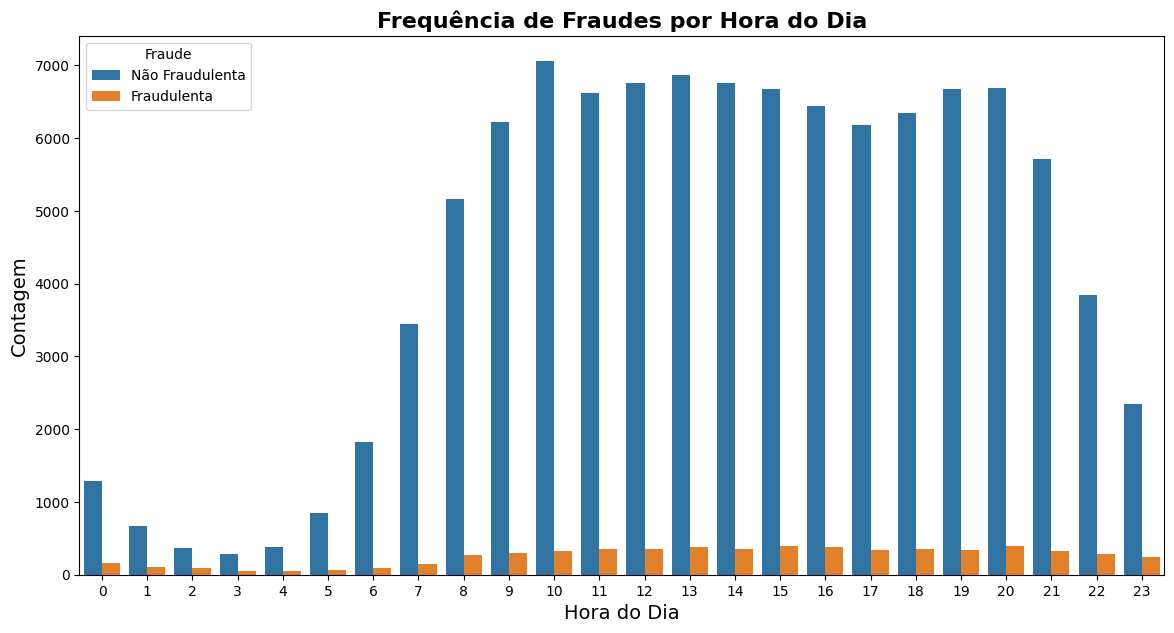

Não Fraudulenta (%)  Fraudulenta (%)
hora                                      
0               89.027778        10.972222
1               86.028461        13.971539
2               80.349345        19.650655
3               84.319527        15.680473
4               88.045977        11.954023
5               92.632719         7.367281
6               95.208333         4.791667
7               95.984384         4.015616
8               95.113406         4.886594
9               95.518723         4.481277
10              95.661017         4.338983
11              94.858943         5.141057
12              94.964838         5.035162
13              94.755003         5.244997
14              94.944530         5.055470
15              94.489304         5.510696
16              94.459103         5.540897
17              94.892638         5.107362
18              94.669255         5.330745
19              95.114656         4.885344
20              94.399774         5.600226
21              94.584299         5.415701
22              93.014262         6.985738
23              90.380916         9.619084

In [123]:
# Extraindo a hora do dia a partir do índice de data e hora
df['hora'] = df.index.hour

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o gráfico de barras para a frequência de fraudes por hora do dia
sns.countplot(x='hora', hue='fraude', data=df)

# Adicionando o título ao gráfico
plt.title('Frequência de Fraudes por Hora do Dia', fontsize=16, fontweight='bold')

# Configurando o rótulo do eixo X
plt.xlabel('Hora do Dia', fontsize=14)

# Configurando o rótulo do eixo Y
plt.ylabel('Contagem', fontsize=14)

# Adicionando a legenda ao gráfico
plt.legend(title='Fraude', labels=['Não Fraudulenta', 'Fraudulenta'])

# Exibindo o gráfico
plt.show()

# Agrupando por hora do dia e calculando a contagem de fraudes e não fraudes
grouped_hour_perc = df.groupby('hora')['fraude'].value_counts(normalize=True).unstack() * 100

# Renomeando as colunas para algo mais compreensível
grouped_hour_perc.columns = ['Não Fraudulenta (%)', 'Fraudulenta (%)']

# Exibindo o DataFrame resultante
grouped_hour_perc

1. Alta Taxa de Fraude de Madrugada:

    * Entre 0h e 4h, as fraudes são significativamente mais altas, com picos às 2h (19.65%) e 3h (15.68%). Isso sugere que a madrugada é um horário de maior risco para fraudes.

    * Transações em horários noturnos (0h - 4h) apresentam uma taxa de fraude elevada, indicando a necessidade de vigilância reforçada.

2. Redução de Fraude ao Amanhecer e Manhã:

    * A partir das 5h, há uma redução nas fraudes, com a menor taxa de fraude observada entre 6h (4.79%) e 10h (4.34%). Esse período parece ser o mais seguro para transações.

    * As fraudes permanecem baixas durante a manhã até cerca de 10h.

3. Estabilidade Durante o Dia:

    * Entre 11h e 20h, a taxa de fraude se mantém relativamente estável, com pequenas variações em torno de 5-6%. Isso mostra uma estabilidade na taxa de fraudes durante o dia.

4. Aumento de Fraudes à Noite:

    * Após as 21h, observa-se um aumento nas fraudes, especialmente às 22h (6.99%) e 23h (9.62%). A noite volta a ser um período de maior risco.

Uma oportunidade de melhoria seria intensificar o monitoramento e os controles de segurança durante a madrugada (0h - 4h) e à noite (21h - 23h), quando as fraudes são mais frequentes.

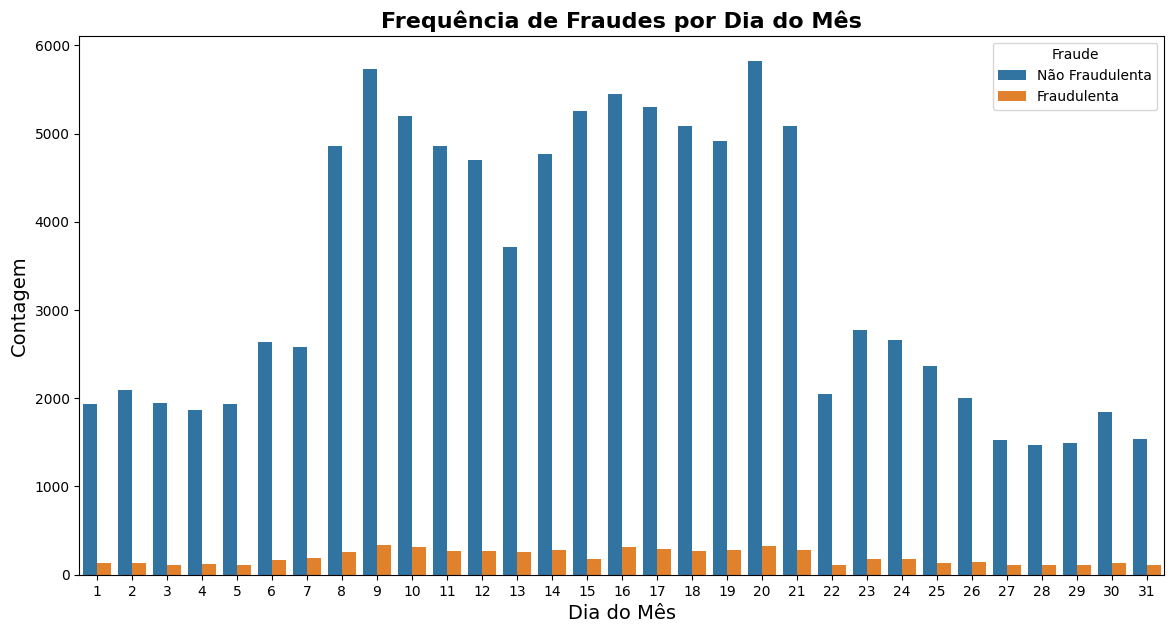

Não Fraudulenta (%)  Fraudulenta (%)
dia_do_mes                                      
1                     93.355802         6.644198
2                     94.083371         5.916629
3                     94.880546         5.119454
4                     94.159114         5.840886
5                     94.422701         5.577299
6                     94.153298         5.846702
7                     93.268187         6.731813
8                     94.973597         5.026403
9                     94.524163         5.475837
10                    94.308501         5.691499
11                    94.737868         5.262132
12                    94.610899         5.389101
13                    93.620777         6.379223
14                    94.372895         5.627105
15                    96.653797         3.346203
16                    94.498438         5.501562
17                    94.878223         5.121777
18                    95.045803         4.954197
19                    94.685153         5.314847
20                    94.678600         5.321400
21                    94.816334         5.183666
22                    95.116279         4.883721
23                    94.131615         5.868385
24                    93.664203         6.335797
25                    94.819277         5.180723
26                    93.178654         6.821346
27                    93.516820         6.483180
28                    93.282636         6.717364
29                    93.391521         6.608479
30                    93.044355         6.955645
31                    93.418647         6.581353

In [124]:
# Extraindo o dia do mês a partir do índice de data e hora
df['dia_do_mes'] = df.index.day

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o gráfico de barras para a frequência de fraudes por dia do mês
sns.countplot(x='dia_do_mes', hue='fraude', data=df)

# Adicionando o título ao gráfico
plt.title('Frequência de Fraudes por Dia do Mês', fontsize=16, fontweight='bold')

# Configurando o rótulo do eixo X
plt.xlabel('Dia do Mês', fontsize=14)

# Configurando o rótulo do eixo Y
plt.ylabel('Contagem', fontsize=14)

# Adicionando a legenda ao gráfico
plt.legend(title='Fraude', labels=['Não Fraudulenta', 'Fraudulenta'])

# Exibindo o gráfico
plt.show()

# Agrupando por dia do mês e calculando a contagem de fraudes e não fraudes
grouped_day_perc = df.groupby('dia_do_mes')['fraude'].value_counts(normalize=True).unstack() * 100

# Renomeando as colunas para algo mais compreensível
grouped_day_perc.columns = ['Não Fraudulenta (%)', 'Fraudulenta (%)']

# Exibindo o DataFrame resultante
grouped_day_perc

* A maioria dos dias do mês apresenta percentuais altos de transações não fraudulentas, acima de 93%. Sugerindo que na maioria dos dias, as transações são predominantemente legítimas.

* Os dias 26, 30 e 1 têm as maiores proporções de fraudes, com mais de 6,8% de transações fraudulentas (6,82%, 6,96% e 6,64%, respectivamente). Sugerindo que pode haver um padrão nos últimos dias do mês, e no começo, podendo estar relacionado a prazos, salários ou comportamento financeiro particular em torno dessas datas, que podem estar sendo explorados por fraudadores.

* O dia 15 apresenta a menor taxa de fraudes, com apenas 3,35% de transações fraudulentas, existindo também utros dias com baixa incidência de fraudes incluem o dia 22 (4,88%) e o dia 18 (4,95%). Pode ser que nestes dias específicos o comportamento dos clientes seja mais previsível ou que existam menos oportunidades para fraude.

* Nos últimos dias de cada mês do dia 29 a 31, as fraudes voltam a aumentar, o que pode ser um padrão cíclico de maior vulnerabilidade a fraudes no fechamento do mês.

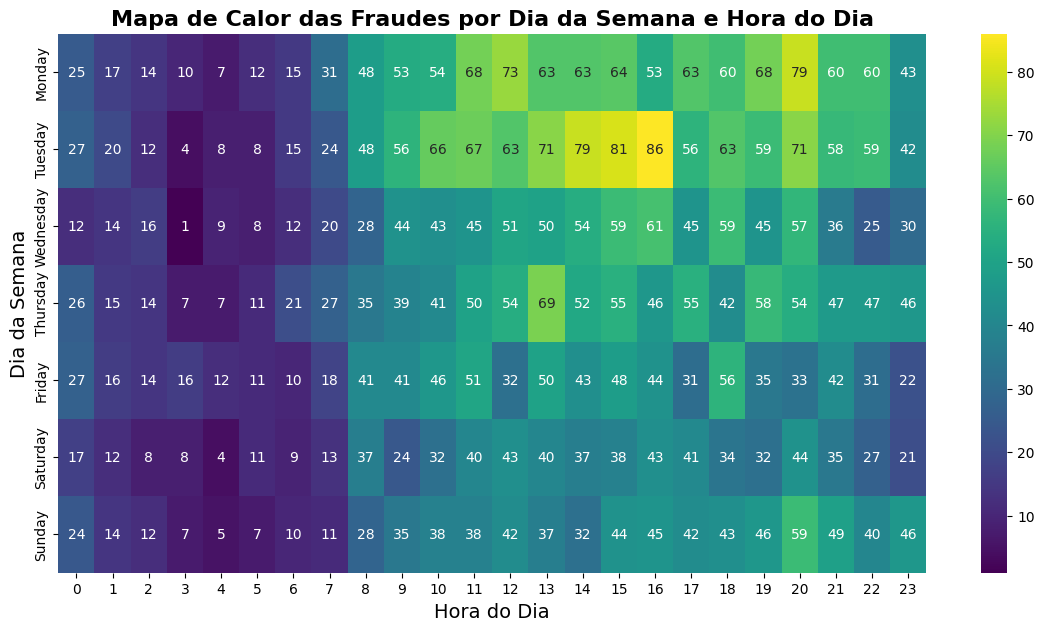

In [125]:
# Criando uma tabela pivô para a soma das fraudes por dia da semana e hora do dia
heatmap_data = df.pivot_table(index='dia_da_semana', columns='hora', values='fraude', aggfunc='sum')

# Reordenando os dias da semana para que apareçam em ordem cronológica
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o mapa de calor
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")

# Adicionando o título ao gráfico
plt.title('Mapa de Calor das Fraudes por Dia da Semana e Hora do Dia', fontsize=16, fontweight='bold')

# Configurando o rótulo do eixo X
plt.xlabel('Hora do Dia', fontsize=14)

# Configurando o rótulo do eixo Y
plt.ylabel('Dia da Semana', fontsize=14)

# Exibindo o gráfico
plt.show()


* Terça-feira às 16h: Com 86 incidentes de fraude, é o horário com maior número de fraudes da semana. Esse período requer atenção especial.

* Segunda-feira ao Meio-dia: Um segundo pico notável com 73 fraudes, sugerindo que o início da semana útil é um momento crítico para a detecção de fraudes.

* Sábado e Domingo: O número de fraudes é consideravelmente menor, especialmente de manhã e à tarde, indicando uma menor atividade fraudulenta nos finais de semana.

* 21h às 23h: Um aumento nas fraudes é observado em alguns dias, especialmente nas segundas e terças-feiras. Esse comportamento à noite pode sugerir que fraudadores tentam explorar horários fora do expediente comercial típico.

Usaremos o Teste Qui-Quadrado de Independência para verificar a associação entre dia_da_semana e fraude.

Hipóteses:
* Hipótese Nula (H0): Não há associação entre o dia da semana e a ocorrência de fraude.

* Hipótese Alternativa (H1): Há uma associação entre o dia da semana e a ocorrência de fraude.

In [126]:
# Criando uma tabela de contingência para dia_da_semana e fraude
contingency_table_weekday = pd.crosstab(df['dia_da_semana'], df['fraude'])

# Realizar o teste Qui-Quadrado de Independência
chi2_weekday, p_weekday, dof_weekday, expected_weekday = chi2_contingency(contingency_table_weekday)

print(f'Estatística do Teste para Dia da Semana: {chi2_weekday}')
print(f'P-valor para Dia da Semana: {p_weekday}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_weekday < alpha:
    print("Rejeitamos a Hipótese Nula para Dia da Semana: Há uma associação significativa entre o dia da semana e a ocorrência de fraude.")
else:
    print("Não rejeitamos a Hipótese Nula para Dia da Semana: Não há uma associação significativa entre o dia da semana e a ocorrência de fraude.")

Estatística do Teste para Dia da Semana: 22.63194210437787
P-valor para Dia da Semana: 0.0009296025583078324
Rejeitamos a Hipótese Nula para Dia da Semana: Há uma associação significativa entre o dia da semana e a ocorrência de fraude.


O p-valor de 0.00093 confirma uma associação estatisticamente significativa entre o dia da semana e a ocorrência de fraude. Isso implica que o dia da semana influencia a probabilidade de uma transação ser fraudulenta.

Vamos realizar o teste de hipóteses para verificar a associação entre a variável hora e a ocorrência de fraude. Usaremos o Teste Qui-Quadrado de Independência para isso.

Hipóteses:
* Hipótese Nula (H0): Não há associação entre a hora do dia e a ocorrência de fraude.

* Hipótese Alternativa (H1): Há uma associação entre a hora do dia e a ocorrência de fraude.

In [127]:
# Criando uma tabela de contingência para hora e fraude
contingency_table_hour = pd.crosstab(df['hora'], df['fraude'])

# Realizando o teste Qui-Quadrado de Independência
chi2_hour, p_hour, dof_hour, expected_hour = chi2_contingency(contingency_table_hour)

print(f'Estatística do Teste para Hora do Dia: {chi2_hour}')
print(f'P-valor para Hora do Dia: {p_hour}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_hour < alpha:
    print("Rejeitamos a Hipótese Nula para Hora do Dia: Há uma associação significativa entre a hora do dia e a ocorrência de fraude.")
else:
    print("Não rejeitamos a Hipótese Nula para Hora do Dia: Não há uma associação significativa entre a hora do dia e a ocorrência de fraude.")

Estatística do Teste para Hora do Dia: 643.7832575605825
P-valor para Hora do Dia: 2.9786785758891377e-121
Rejeitamos a Hipótese Nula para Hora do Dia: Há uma associação significativa entre a hora do dia e a ocorrência de fraude.


O p-valor extremamente baixo confirma uma associação estatisticamente significativa entre a hora do dia e a ocorrência de fraude. Isso implica que o horário em que uma transação ocorre tem uma influência significativa na probabilidade de ser fraudulenta. A hora do dia é uma variável relevante para a detecção de fraudes. Certos horários, especialmente durante a madrugada e no início da tarde, apresentam um risco significativamente maior de fraudes.

Vamos fazer um teste de hipóteses para nos ajudar a determinar se o dia do mês tem uma relação significativa com a ocorrência de fraudes. Será usado um teste do qui-quadrado de independência para verificar se há uma associação entre ads duas variáveis.

Hipóteses:

* Hipótese Nula (H0): O dia do mês não tem efeito significativo na ocorrência de fraudes.

* Hipótese Alternativa (H1): O dia do mês tem efeito significativo na ocorrência de fraudes.

In [128]:
# Criando uma tabela de contingência para hora e fraude
contingency_table = pd.crosstab(df['dia_do_mes'], df['fraude'])

# Realizando o teste Qui-Quadrado de Independência
chi2_day, p_day, dof_day, expected_day = chi2_contingency(contingency_table)

# Exibindo os resultados
print(f"Qui-Quadrado: {chi2_day}")
print(f"P-Valor: {p_day}")

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

# Verificando a significância
if p_day < alpha:
    print("Rejeitamos a Hipótese Nula. Há uma associação significativa entre o dia do mês e a ocorrência de fraudes.")
else:
    print("Não rejeitamos a Hipótese Nula. Não há associação significativa entre o dia do mês e a ocorrência de fraudes.")

Qui-Quadrado: 116.47487986230203
P-Valor: 3.951009822262001e-12
Rejeitamos a Hipótese Nula. Há uma associação significativa entre o dia do mês e a ocorrência de fraudes.


Com o p_valor encontrado podemos concluir que o dia do mês realmente tem uma influência significativa nas fraudes, e pode ser um fator importante a ser considerado no seu modelo preditivo.

### 2.6.1 - Conclusão

Ambas as variáveis, dia da semana , dia do mês e hora do dia, são significativas e devem ser integradas ao modelo preditivo para aumentar a precisão na detecção de fraudes.

## 2.7 - Produto e Categoria Produto

In [129]:
df.produto.nunique(), df.categoria_produto.nunique()

(94101, 4444)

### 2.7.1 - TargetEncoder

Depois de usar diversas técnicas para reduzir a dimensionalidade das variáveis "produto" e "categoria_produto", a única que obteve um bom resultado no modelo de machine learning foi o Target Encoder, que é uma técnica usada para transformar variáveis categóricas em valores numéricos baseados na média da variável alvo. Ele calcula a média da variável dependente para cada categoria e substitui as categorias por essas médias. Isso ajuda a capturar a relação entre a variável categórica e a variável alvo, tornando os dados mais úteis para modelos de machine learning.

Sendo muito útil quando se tem variáveis categóricas com muitos níveis, evitando o aumento desnecessário da dimensionalidade que ocorre com a criação de dummies.

In [130]:
# DataFrame com as colunas 'produto' e 'fraude'
encoder = TargetEncoder(cols=['produto'])
X_encoded = encoder.fit_transform(df.drop(columns='fraude'), df['fraude'])
df['produto'] = X_encoded['produto']

In [131]:
# DataFrame com as colunas 'categoria_produto' e 'fraude'
encoder = TargetEncoder(cols=['categoria_produto'])
X_encoded = encoder.fit_transform(df.drop(columns='fraude'), df['fraude'])
df['categoria_produto'] = X_encoded['categoria_produto']

In [132]:
df.head()

score_1  score_2   score_3  score_4   score_5  score_6  \
data_compra                                                                   
2020-03-27 11:51:16        4   0.7685  94436.24     20.0  0.444828      1.0   
2020-04-15 19:58:08        4   0.7550   9258.50      1.0  0.000000     33.0   
2020-04-16 16:03:10        4   0.7631  18923.90     50.0  0.482385     18.0   
2020-04-02 10:24:45        2   0.7315   5728.68     15.0  0.000000      1.0   
2020-04-13 18:42:28        4   0.7359  42727.15     50.0  0.000000     47.0   

                    pais  score_7   produto  categoria_produto  ...  score_10  \
data_compra                                                     ...             
2020-03-27 11:51:16   BR        5  0.077601           0.073810  ...     102.0   
2020-04-15 19:58:08   BR        0  0.048019           0.026882  ...       0.0   
2020-04-16 16:03:10   BR       23  0.046675           0.047098  ...    1147.0   
2020-04-02 10:24:45   BR        2  0.048019           0.050740  ...     150.0   
2020-04-13 18:42:28   BR        1  0.048019           0.074286  ...     506.0   

                     entrega_doc_1  entrega_doc_2  entrega_doc_3  \
data_compra                                                        
2020-03-27 11:51:16              1              0              0   
2020-04-15 19:58:08              1              1              0   
2020-04-16 16:03:10              1              0              1   
2020-04-02 10:24:45              1              0              0   
2020-04-13 18:42:28              1              0              1   

                     valor_compra  score_fraude_modelo  fraude  dia_da_semana  \
data_compra                                                                     
2020-03-27 11:51:16          5.64                   66       0         Friday   
2020-04-15 19:58:08        124.71                   72       0      Wednesday   
2020-04-16 16:03:10          3.54                    2       0       Thursday   
2020-04-02 10:24:45          3.53                   76       0       Thursday   
2020-04-13 18:42:28         28.00                   32       0         Monday   

                     hora dia_do_mes  
data_compra                           
2020-03-27 11:51:16    11         27  
2020-04-15 19:58:08    19         15  
2020-04-16 16:03:10    16         16  
2020-04-02 10:24:45    10          2  
2020-04-13 18:42:28    18         13  

[5 rows x 22 columns]

## 2.9 - Valor da compra

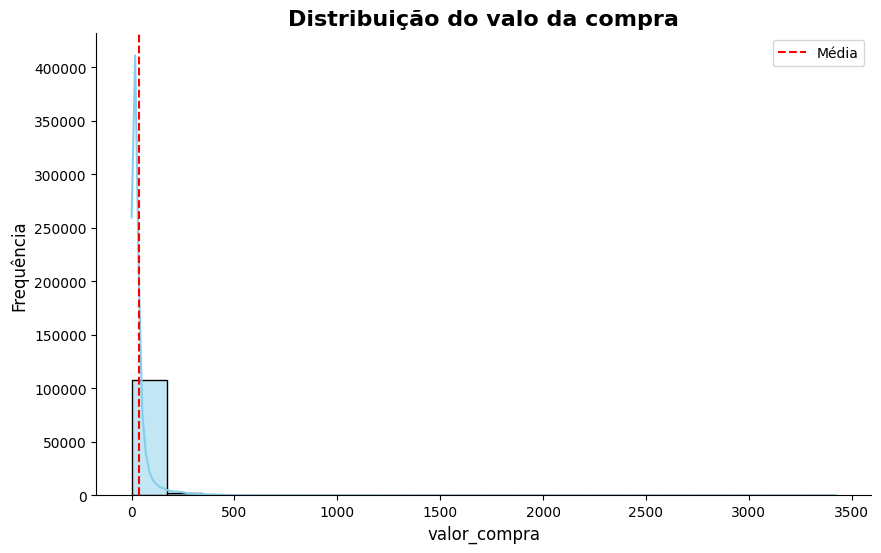

In [133]:
# valor_compra
criar_histograma(df, 'valor_compra', 'Distribuição do valo da compra')

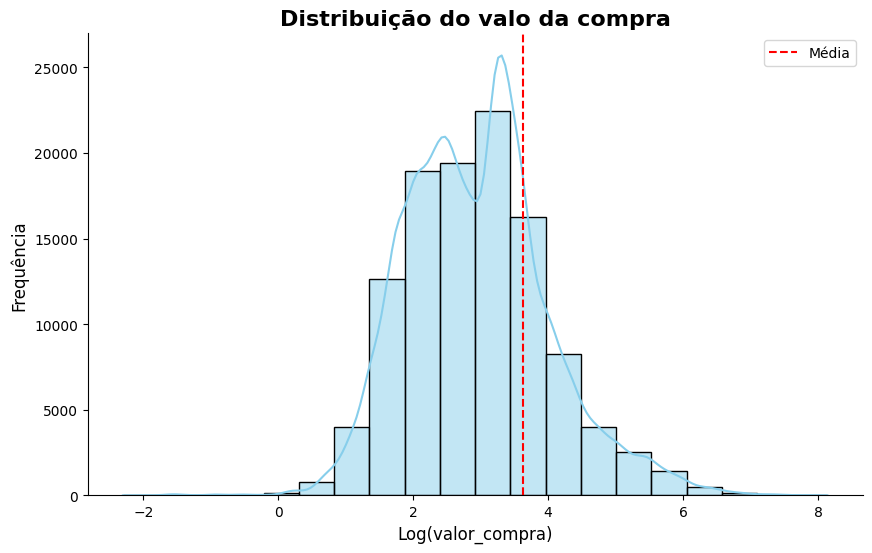

In [134]:
# valor_compra
criar_histograma(df, 'valor_compra', 'Distribuição do valo da compra', log=True)

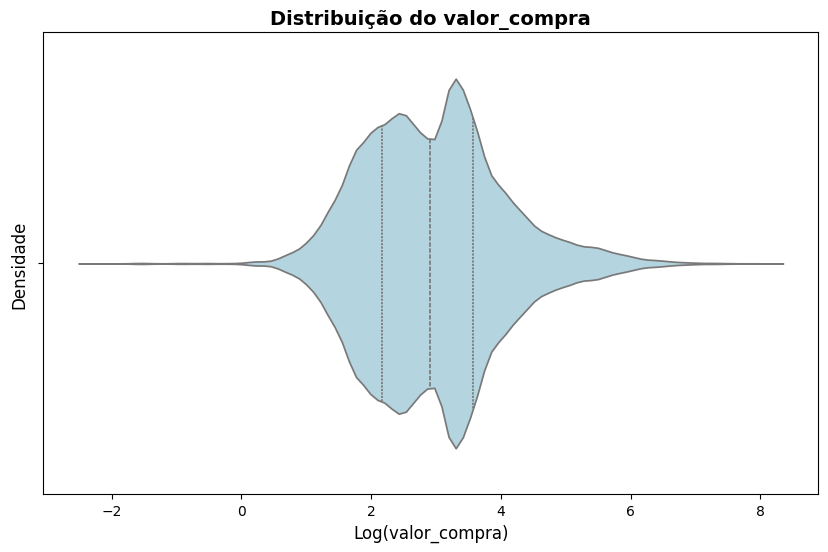

In [135]:
# valor_compra
criar_violin_plot(df, 'valor_compra', 'Distribuição do valor_compra', log=True)

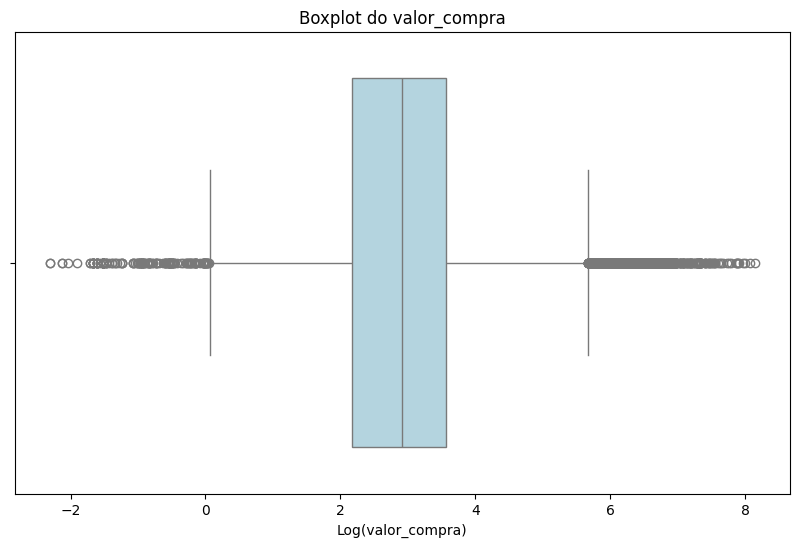

In [136]:
# valor_compra
criar_boxplot(df, 'valor_compra', 'Boxplot do valor_compra', log=True)

In [137]:
# Calculando a Skew da coluna valor_compra
skewness = np.log1p(df['valor_compra']).skew()
print(f'Skew da coluna valor_compra: {skewness}')

Skew da coluna valor_compra: 0.6392516071895464


* O gráfico mostra que a distribuição dos valores de compra em uma escala logarítmica apresenta uma forma aproximadamente simétrica, mas com uma leve assimetria positiva (à direita), também confirmada pela Skew de 0.639. A maioria dos valores de compra está concentrada em torno da média, indicada pela linha vermelha tracejada.

* A cauda direita mais longa sugere a presença de outliers, ou seja, transações com valores de compra muito altos. Esses outliers podem puxar a média para a direita, resultando em uma distribuição com assimetria positiva.

* A maioria das compras está concentrada em torno de valores de compra mais baixos, com uma densidade maior nas barras centrais do histograma.

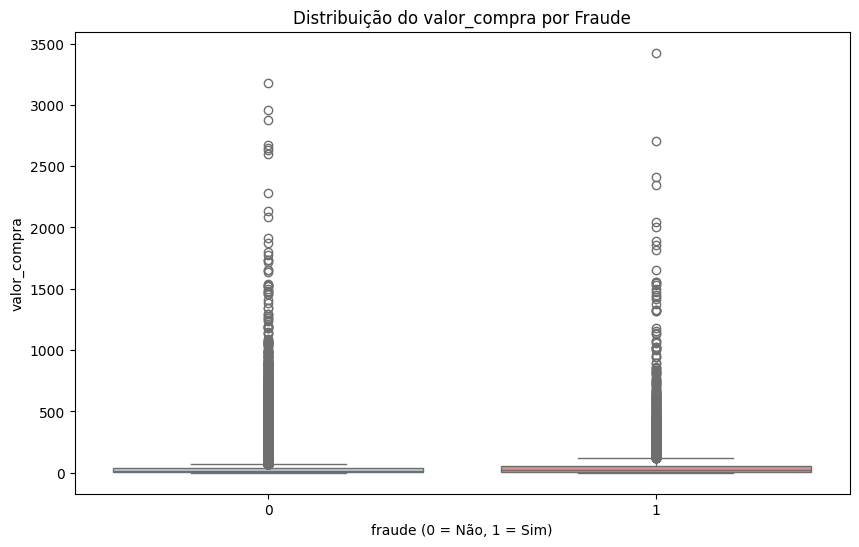

In [138]:
# valor_compra
criar_boxplot_fraude(df, 'fraude', 'valor_compra', 'Distribuição do valor_compra por Fraude')

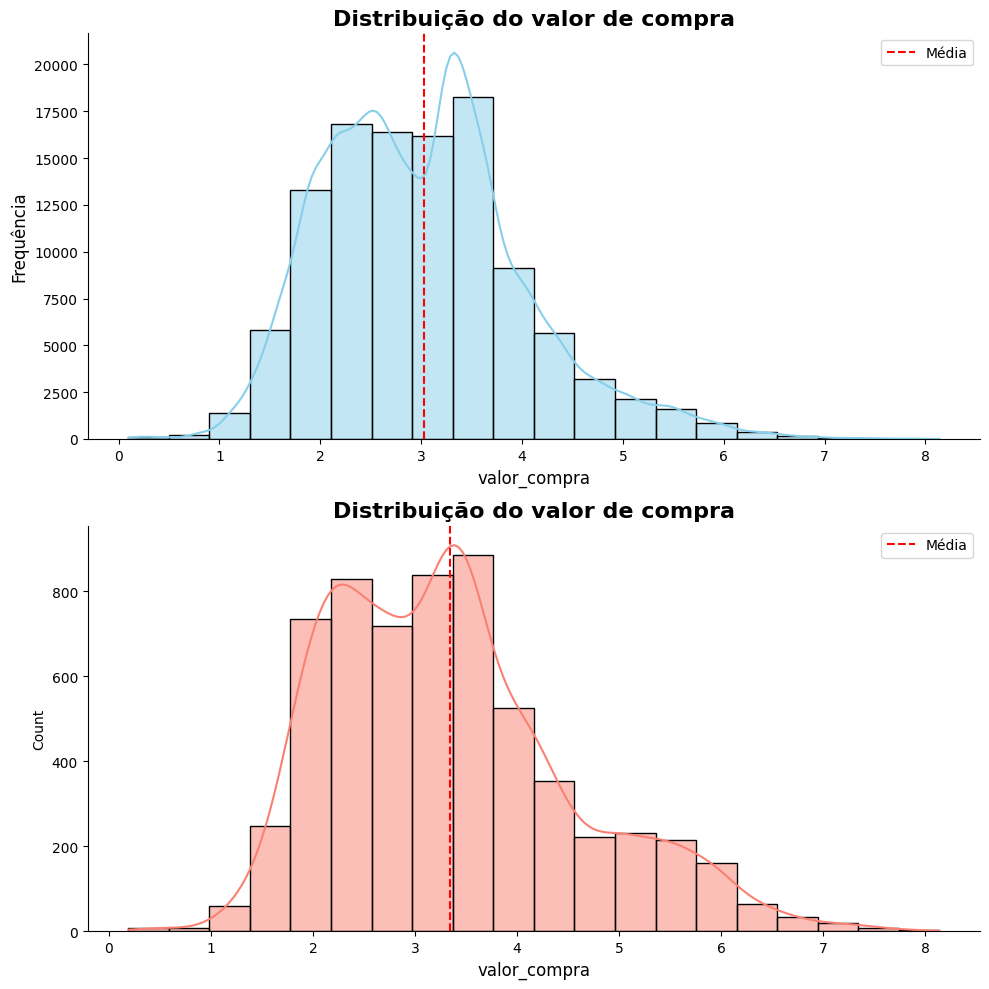

In [139]:
# fraude e valor_compra
plotar_histogramas_fraude(df, 'valor_compra', 'Distribuição do valor de compra', 'Distribuição do valor de compra', log=True)

* As médias de ambos os gráficos estão próximas, indicando que as fraudes ocorrem em valores de compra que não são significativamente diferentes da distribuição geral.

* A distribuição das fraudes é mais concentrada em valores baixos, sugerindo que os fraudadores preferem transações de valor mais baixo possivelmente para evitar detecção.

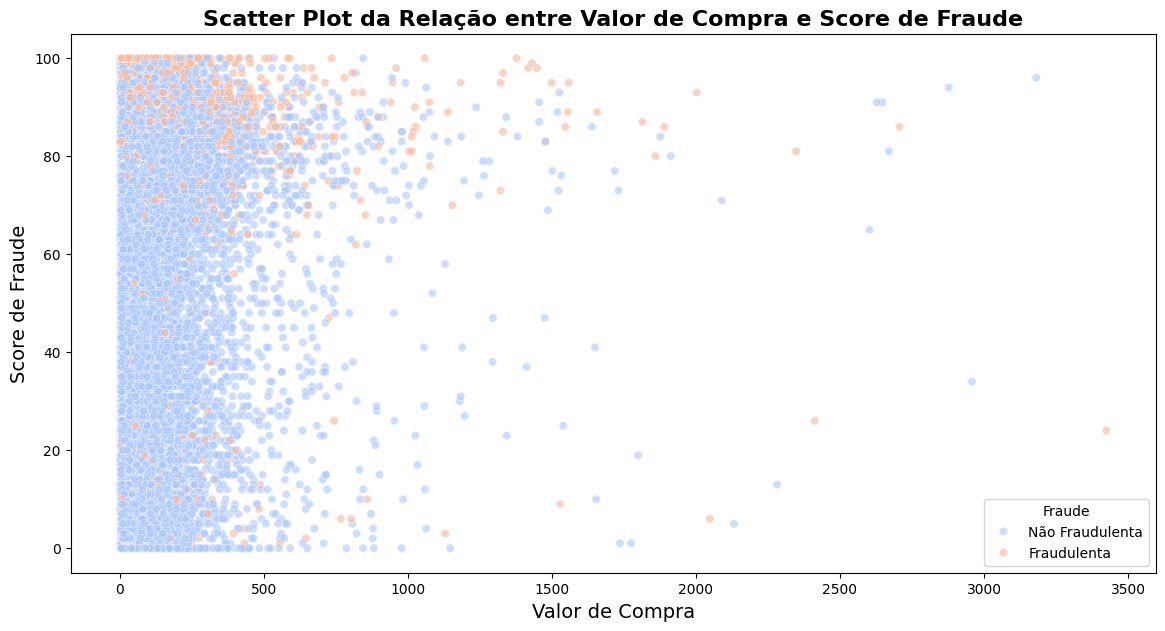

In [140]:
# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o scatter plot com a paleta de cores correta e uma legenda diferenciada
scatter = sns.scatterplot(x='valor_compra', y='score_fraude_modelo', hue='fraude', data=df, palette='coolwarm', alpha=0.6)

# Adicionando título e rótulos
plt.title('Scatter Plot da Relação entre Valor de Compra e Score de Fraude', fontsize=16, fontweight='bold')
plt.xlabel('Valor de Compra', fontsize=14)
plt.ylabel('Score de Fraude', fontsize=14)

# Ajustando a legenda para garantir que as cores sejam distintas
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=['Não Fraudulenta', 'Fraudulenta'], title='Fraude')

# Exibindo o gráfico
plt.show()

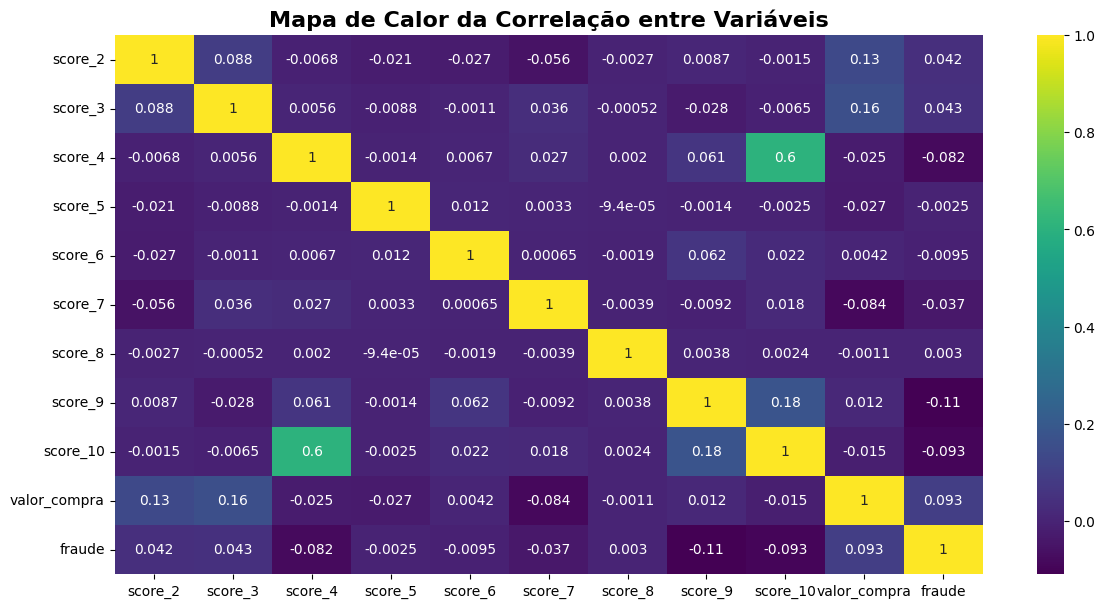

In [141]:
# Calculando a matriz de correlação
correlation_matrix = df[['score_2', 'score_3', 'score_4', 'score_5', 'score_6', 'score_7', 'score_8', 'score_9', 'score_10', 'valor_compra', 'fraude']].corr()

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Adicionando título ao gráfico
plt.title('Mapa de Calor da Correlação entre Variáveis', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()

O valor de compra não apresenta nenhuma forte correlação com outra variável.

Como para valor_compra, tivemos uma skew proxima de zero(skew = -0.639), iremos realizar um teste de hipoteses para verificar a normalidade dos dados.

* P-valor < 0.05: Rejeitamos a hipótese nula, indicando que os dados não seguem uma distribuição normal.

* P-valor ≥ 0.05: Não rejeitamos a hipótese nula, indicando que os dados seguem uma distribuição normal.

In [142]:
# Verificando valores ausentes em score_2 e fraude
print(df['valor_compra'].isnull().sum())
print(df['fraude'].isnull().sum())

# Remover linhas com valores ausentes
df_clean = df.dropna(subset=['valor_compra', 'fraude'])

# Realizando o teste de Shapiro-Wilk para score_3
stat, p_value = shapiro(np.log1p(df_clean['valor_compra']))

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.05  # 95% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: Os dados não seguem uma distribuição normal.")
else:
    print("Não rejeitamos a Hipótese Nula: Os dados seguem uma distribuição normal.")

0
0
Estatística do Teste: 0.9756032168460409
P-valor: 6.365397027320808e-79
Rejeitamos a Hipótese Nula: Os dados não seguem uma distribuição normal.


Como os dados não seguem uma normal, iremos usar um teste de hipoteses não paramétrico.

Para verificar se a variável valor_compra será uma boa variável para o modelo de machine learning na detecção de fraudes, iremos usar o Teste de Mann-Whitney U. Esse teste é ideal para comparar duas distribuições e verificar se há uma diferença significativa entre os valores de compra em transações fraudulentas e não fraudulentas.

Hipóteses:
* Hipótese Nula (H0): As distribuições de valor_compra são iguais para transações fraudulentas e não fraudulentas.

* Hipótese Alternativa (H1): As distribuições de valor_compra são diferentes para transações fraudulentas e não fraudulentas.

In [143]:
# Separando os valores de compra para fraudes e não fraudes
compra_fraude = df[df['fraude'] == 1]['valor_compra']
compra_nao_fraude = df[df['fraude'] == 0]['valor_compra']

# Realizando o teste de Mann-Whitney U
stat, p_value = mannwhitneyu(compra_fraude, compra_nao_fraude)

print(f'Estatística do Teste: {stat}')
print(f'P-valor: {p_value}')

# Definindo o nível de significância
alpha = 0.01  # 99% de confiança

if p_value < alpha:
    print("Rejeitamos a Hipótese Nula: As distribuições de valor_compra para transações fraudulentas e não fraudulentas são significativamente diferentes.")
else:
    print("Não rejeitamos a Hipótese Nula: Não há uma diferença significativa nas distribuições de valor_compra para transações fraudulentas e não fraudulentas.")

Estatística do Teste: 371712861.0
P-valor: 1.1064498359427433e-80
Rejeitamos a Hipótese Nula: As distribuições de valor_compra para transações fraudulentas e não fraudulentas são significativamente diferentes.


O p-valor extremamente baixo confirma que há uma diferença estatisticamente significativa entre as distribuições de valor_compra para transações fraudulentas e não fraudulentas. Isso indica que a variável valor_compra é relevante para a detecção de fraudes.

## 2.10 - Variáveis para o modelo

Com base nas análises realizadas, as seguintes variáveis fazem sentido para serem incluídas no seu modelo de machine learning para detecção de fraudes:

1. Variáveis de Score:

    * Score 1 a Score 10: Esses scores fornecem uma avaliação quantitativa que pode ajudar a identificar padrões associados a fraudes. Com excessão de score_8.

2. Variáveis de Entrega de Documentos:

    * entrega_doc_1, entrega_doc_2, entrega_doc_3: As análises indicaram que a entrega ou não entrega desses documentos está associada à incidência de fraudes.

3. Variáveis Temporais:

    * dia_da_semana: O dia da semana mostrou uma associação significativa com a ocorrência de fraudes.

    * hora: A hora do dia também apresentou uma relação significativa com fraudes.

4. Variáveis de Clusters:

    * cluster_produto e cluster_categoria: A clusterização ajudou a identificar agrupamentos de produtos com diferentes riscos de fraude, sendo essas variáveis relevantes para o modelo.

5. Variáveis Financeiras:

    * valor_compra: A variável de valor de compra mostrou ser relevante na distinção entre transações fraudulentas e não fraudulentas.

# 3 - Modelo Atual

Vamos inicialmente verificar como o modelo atual de previsão de fraudes esta se comportando, para analisar o desempenho e a eficácia, seguiremos diversas abordagens que incluem análises estatísticas, visuais e de desempenho.

## 3.1 - Estatística descritiva

In [144]:
# Estatística descritiv para score_fraude_modelo
df['score_fraude_modelo'].describe()

count    111628.000000
mean         46.620185
std          27.983894
min           0.000000
25%          22.000000
50%          47.000000
75%          71.000000
max         100.000000
Name: score_fraude_modelo, dtype: float64

Desvio Padrão (std): 27.98% Um desvio padrão relativamente alto indica que os scores de fraude variam significativamente ao redor da média. Isso sugere diversidade nos níveis de risco atribuídos às transações.

Mediana (50%): 47% A mediana quase igual à média sugere uma distribuição relativamente simétrica dos scores de fraude.

Terceiro Quartil (75%): O terceiro quartil é 71%, ou seja, 75% dos scores de fraude estão abaixo de 71%. Os 25% restantes (quartil superior) possuem scores de fraude entre 715 e 1005. Esse alto valor do terceiro quartil sugere que um score de fraude acima de 71% é relativamente raro e pode indicar um risco mais elevado.

As transações com um score de fraude acima de 71 (terceiro quartil) devem ser tratadas com atenção, priorizar a revisão de transações com scores superiores a 71 pode melhorar a detecção e a prevenção de fraudes.

## 3.2 - Histograma do Score de Fraude

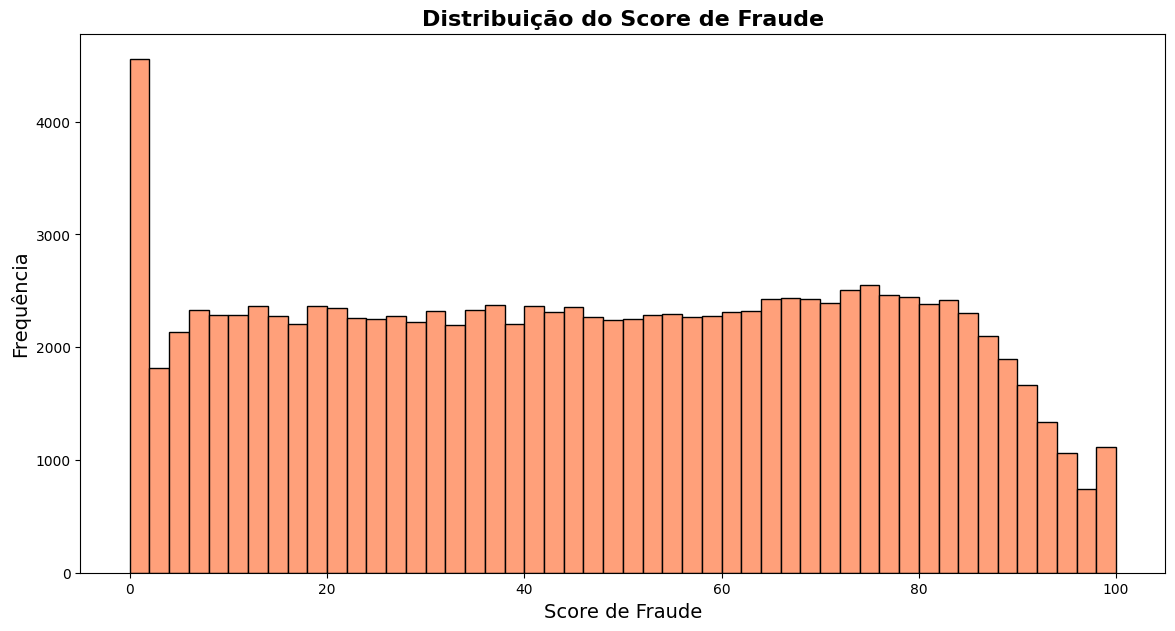

In [145]:
# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criar o histograma
plt.hist(df['score_fraude_modelo'], bins=50, color='LightSalmon', edgecolor='black')

# Adicionando título e rótulos
plt.title('Distribuição do Score de Fraude', fontsize=16, fontweight='bold')
plt.xlabel('Score de Fraude', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Exibindo o gráfico
plt.show()

Alta concentração de transações com Score 0:

* Existe uma grande quantidade de transações que têm um score de fraude igual a 0.
* A presença de um grande número de transações com score 0 pode indicar um possível viés do modelo, o que vale a pena investigar. Se o número de fraudes reais for muito baixo no conjunto de dados, o modelo pode estar superestimando a segurança das transações.

Leve inclinação crescente em scores altos (70-85):
* Observa-se um aumento na frequência de scores na faixa de 70 a 85, indicando que mais transações estão sendo classificadas como alto risco de fraude.

## 3.3 - Boxplot do Score de Fraude por Fraude

Para identificar diferenças na distribuição dos scores entre transações fraudulentas e não fraudulentas, iremos usar o boxplot.

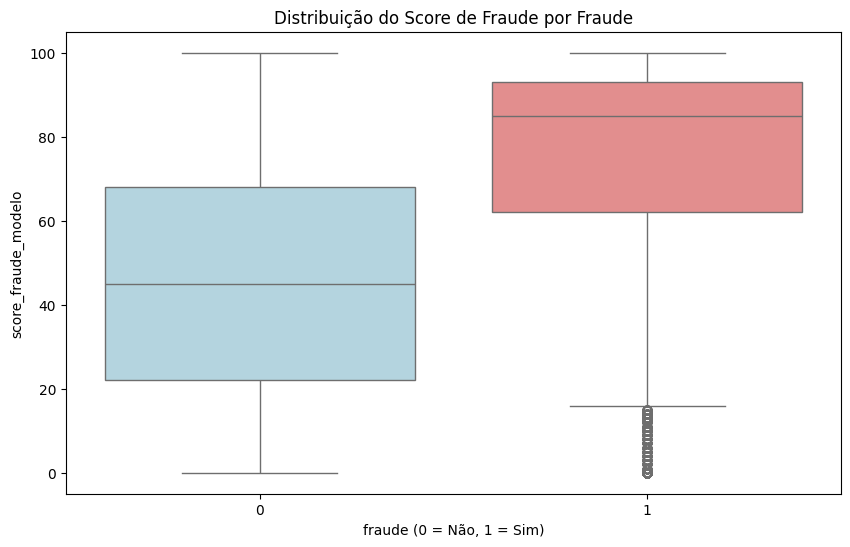

In [146]:
# score_fraude_modelo
criar_boxplot_fraude(df, 'fraude', 'score_fraude_modelo', 'Distribuição do Score de Fraude por Fraude')

* Os scores de fraude são significativamente mais altos para transações fraudulentas (1) em comparação com as não fraudulentas (0). Isso sugere que o modelo de score de fraude é eficaz em atribuir scores mais altos a casos fraudulentos.

* A variabilidade dos scores é maior para transações não fraudulentas (0), indicando que os scores para essas transações são mais dispersos.

## 3.4 - Curva ROC e AUC

A curva ROC mostra a relação entre a taxa de verdadeiros positivos (True Positive Rate) e a taxa de falsos positivos (False Positive Rate) para diferentes limiares de decisão. Quanto mais a curva se aproxima do canto superior esquerdo, melhor é o desempenho do modelo.

In [147]:
df_train1, df_test1 = train_test_split(df, test_size=0.2, random_state = 10)

In [148]:
def plot_roc_curve(df, score_column, target_column):
    """
    Calcula e plota a Curva ROC para os scores de fraude.
    
    Parâmetros:
    df: DataFrame contendo os dados.
    score_column: string com o nome da coluna que contém os scores de fraude.
    target_column: string com o nome da coluna que contém a variável alvo (fraude).
    
    Retorna:
    Plota a Curva ROC e exibe a AUC no gráfico.
    """
    
    # Calculando as previsões de probabilidade
    y_scores = df[score_column]
    
    # Calculando a Curva ROC
    fpr, tpr, thresholds = roc_curve(df[target_column], y_scores)
    auc = roc_auc_score(df[target_column], y_scores)
    
    # Plotar a Curva ROC
    plt.figure(figsize=(14, 7))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', color='red')
    
    # Adicionando título e rótulos
    plt.title('Curva ROC do Score de Fraude', fontsize=16, fontweight='bold')
    plt.xlabel('Taxa de Falsos Positivos', fontsize=14)
    plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=14)
    
    # Adicionando legenda
    plt.legend(loc='lower right')
    plt.show()


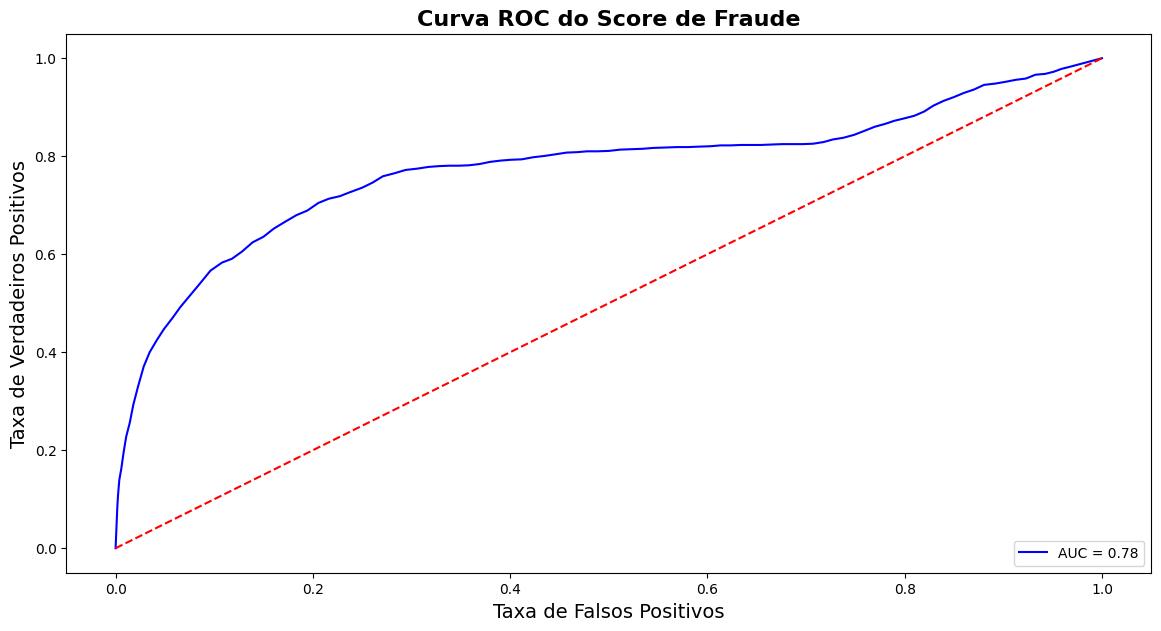

In [149]:
plot_roc_curve(df_test1, 'score_fraude_modelo', 'fraude')

* Um AUC de 0.78 é bom, mas há espaço para melhorias. Continuar monitorando e ajustando o modelo pode ajudar a aumentar a precisão na detecção de fraudes.
* O desempenho do modelo pode ser melhorado ajustando o limiar de decisão para equilibrar a sensibilidade e a especificidade conforme necessário.

## 3.5 - Threshold e Matriz de Confusão

Agora vamos analisar qual o ponto de corte que maximiza o lucro e visualizar as outras métricas. Consideraremos que o valor da compra está na mesma unidade de medida para todas as transações.

In [150]:
# Definindo uma função que calcula o valor de perda, faturamento e lucro para um dado threshold
def calcular_valores(threshold, df, coluna):
  # Selecionando as compras que foram aprovadas pelo modelo, ou seja, 
  # que têm score_fraude_modelo menor ou igual ao threshold
  compras_aprovadas = df[df[coluna] <= threshold]

  # Calcular o valor total das compras aprovadas
  valor_total = compras_aprovadas["valor_compra"].sum()

  # Calcular o valor das compras aprovadas que eram fraudulentas
  valor_fraude = compras_aprovadas[compras_aprovadas["fraude"] == 1]["valor_compra"].sum()

  # Calcular o valor das compras aprovadas que não eram fraudulentas
  valor_nao_fraude = valor_total - valor_fraude

  # Calcular o valor de perda, que é igual ao valor das compras fraudulentas
  valor_perda = valor_fraude

  # Calcular o valor de faturamento, que é igual a 10% do valor das compras não fraudulentas
  valor_faturamento = valor_nao_fraude * 0.1

  # Calcular o valor de lucro, que é igual ao valor de faturamento menos o valor de perda
  valor_lucro = valor_faturamento - valor_perda

  # Retornar os valores calculados
  return valor_perda, valor_faturamento, valor_lucro

In [151]:
# Criando uma lista vazia para armazenar as métricas
metricas_atual = []

# Iterando sobre os possíveis valores de threshold de 0 a 100
for threshold in range(1, 100, 1):
  # Chamando a função calcular_metricas para o threshold atual
  perda, faturamento, lucro = calcular_valores(threshold, df_test1, 'score_fraude_modelo')

  # Adicionando as métricas como uma lista à lista metricas
  metricas_atual.append([threshold, perda, faturamento, lucro])

# Criando um dataframe a partir da lista metricas
df_thres_atual = pd.DataFrame(metricas_atual, columns=["threshold", "perda", "faturamento", "lucro"])

# Imprimindo o dataframe
df_thres_atual

threshold     perda  faturamento     lucro
0           1    587.04     3007.985  2420.945
1           2   1585.82     3637.584  2051.764
2           3   1694.50     4196.722  2502.222
3           4   1730.92     4913.956  3183.036
4           5   2082.27     5790.104  3707.834
..        ...       ...          ...       ...
94         95  73146.60    75135.683  1989.083
95         96  76046.93    75459.114  -587.816
96         97  77212.98    75729.733 -1483.247
97         98  79237.23    75932.607 -3304.623
98         99  80591.61    76022.848 -4568.762

[99 rows x 4 columns]

In [152]:
# Encontrando o índice do threshold que tem o maior valor de lucro
indice_max = df_thres_atual["lucro"].idxmax()

# Selecionando a linha do dataframe que corresponde ao índice máximo
linha_max = df_thres_atual.iloc[indice_max]
threshold_otimo_atual = linha_max[0]
linha_max

threshold         73.000
perda          19811.050
faturamento    55751.644
lucro          35940.594
Name: 72, dtype: float64

In [153]:
print(f"Taxa de lucro: {35940.594/55751.644}")

Taxa de lucro: 0.6446553217336515


A partir da análise do ponto de corte e dos dados, podemos concluir que:

* O ponto de corte de 73 é o valor que maximiza o lucro, ou seja, é o valor que define se uma transação deve ser bloqueada ou não, de acordo com o modelo de classificação.
* As perdas por fraude são de 19811.050, o que significa que o modelo não conseguiu bloquear todas as transações fraudulentas e permitiu que algumas delas fossem realizadas, causando um prejuízo para a empresa.
* As receitas são de 55751.644, o que significa que o modelo permitiu que a maioria das transações legítimas fossem realizadas, gerando uma receita de 10% do valor da compra para a empresa.
* O lucro é de 35940.594, o que significa que a receita foi maior do que as perdas por fraude, e que o modelo foi capaz de otimizar o lucro da empresa.

In [154]:
df.head()

score_1  score_2   score_3  score_4   score_5  score_6  \
data_compra                                                                   
2020-03-27 11:51:16        4   0.7685  94436.24     20.0  0.444828      1.0   
2020-04-15 19:58:08        4   0.7550   9258.50      1.0  0.000000     33.0   
2020-04-16 16:03:10        4   0.7631  18923.90     50.0  0.482385     18.0   
2020-04-02 10:24:45        2   0.7315   5728.68     15.0  0.000000      1.0   
2020-04-13 18:42:28        4   0.7359  42727.15     50.0  0.000000     47.0   

                    pais  score_7   produto  categoria_produto  ...  score_10  \
data_compra                                                     ...             
2020-03-27 11:51:16   BR        5  0.077601           0.073810  ...     102.0   
2020-04-15 19:58:08   BR        0  0.048019           0.026882  ...       0.0   
2020-04-16 16:03:10   BR       23  0.046675           0.047098  ...    1147.0   
2020-04-02 10:24:45   BR        2  0.048019           0.050740  ...     150.0   
2020-04-13 18:42:28   BR        1  0.048019           0.074286  ...     506.0   

                     entrega_doc_1  entrega_doc_2  entrega_doc_3  \
data_compra                                                        
2020-03-27 11:51:16              1              0              0   
2020-04-15 19:58:08              1              1              0   
2020-04-16 16:03:10              1              0              1   
2020-04-02 10:24:45              1              0              0   
2020-04-13 18:42:28              1              0              1   

                     valor_compra  score_fraude_modelo  fraude  dia_da_semana  \
data_compra                                                                     
2020-03-27 11:51:16          5.64                   66       0         Friday   
2020-04-15 19:58:08        124.71                   72       0      Wednesday   
2020-04-16 16:03:10          3.54                    2       0       Thursday   
2020-04-02 10:24:45          3.53                   76       0       Thursday   
2020-04-13 18:42:28         28.00                   32       0         Monday   

                     hora dia_do_mes  
data_compra                           
2020-03-27 11:51:16    11         27  
2020-04-15 19:58:08    19         15  
2020-04-16 16:03:10    16         16  
2020-04-02 10:24:45    10          2  
2020-04-13 18:42:28    18         13  

[5 rows x 22 columns]

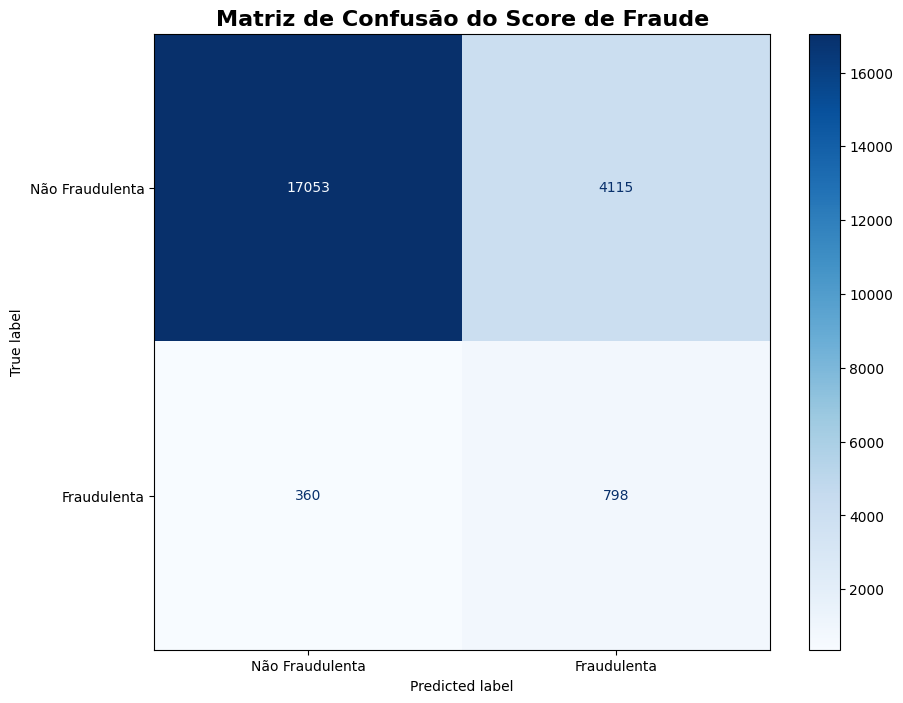

In [155]:
y_scores = df_test1['score_fraude_modelo']
# Definindo um limiar para classificação
y_pred = (y_scores > threshold_otimo_atual)

# Calculando a matriz de confusão
cm = confusion_matrix(df_test1['fraude'], y_pred)

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(10, 8))

# Exibindo a matriz de confusão com valores formatados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Fraudulenta', 'Fraudulenta'])
disp.plot(cmap='Blues', ax=plt.gca(), values_format='d')

# Adicionando título ao gráfico
plt.title('Matriz de Confusão do Score de Fraude', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()

1. Verdadeiros Negativos (TN):

    * 17053 transações não fraudulentas foram corretamente classificadas como não fraudulentas.
    * O modelo é eficiente em reconhecer transações legítimas.

2. Falsos Positivos (FP):

    * 4115 transações não fraudulentas foram incorretamente classificadas como fraudulentas.
    * Pode causar transtornos para usuários legítimos, necessitando de uma revisão para reduzir esse número.

3. Falsos Negativos (FN):

    * 360 transações fraudulentas foram incorretamente classificadas como não fraudulentas.
    * Representa um risco, pois fraudes passaram despercebidas, mas o número é relativamente baixo.

4. Verdadeiros Positivos (TP):

    * 798 transações fraudulentas foram corretamente identificadas como fraudulentas.
    * O modelo está eficaz na identificação de fraudes.

In [156]:
# Extraindo valores da matriz de confusão
true_negatives = cm[0, 0]
false_positives = cm[0, 1]
false_negatives = cm[1, 0]
true_positives = cm[1, 1]

# Calculando a taxa de fraude
total_transacoes = true_negatives + false_positives + false_negatives + true_positives
taxa_fraude = (false_negatives) / total_transacoes * 100

# Calculando a taxa de aprovação
taxa_aprovacao = (true_negatives + true_positives) / total_transacoes * 100

print(f"Taxa de fraude: {taxa_fraude:.2f}%")
print(f"Taxa de aprovação: {taxa_aprovacao:.2f}%")

Taxa de fraude: 1.61%
Taxa de aprovação: 79.96%


Parece que o sistema é eficaz na detecção de fraudes e aprova a maioria das transações. Trabalhar em maneiras de aumentar a taxa de aprovação sem comprometer a segurança pserá o próximo passo importante.

## 3.6 - Classification Report

In [157]:
# Supondo que y_true seja os valores verdadeiros e y_pred sejam as previsões
y_true = df_test1['fraude']
y_pred = (y_scores > threshold_otimo_atual)

# Gerando o relatório de classificação
print(classification_report(y_true, y_pred, target_names=['Não Fraudulenta', 'Fraudulenta']))

                 precision    recall  f1-score   support

Não Fraudulenta       0.98      0.81      0.88     21168
    Fraudulenta       0.16      0.69      0.26      1158

       accuracy                           0.80     22326
      macro avg       0.57      0.75      0.57     22326
   weighted avg       0.94      0.80      0.85     22326



1. Alta precisão para "Não Fraudulenta":

    * A precisão de 0.98 indica que quando o modelo prevê uma transação como não fraudulenta, ele está correto 98% das vezes.
    * O recall de 0.81 mostra que o modelo está identificando 81% de todas as transações não fraudulentas.

2. Baixa precisão para "Fraudulenta":

    * A precisão de 0.16 é baixa, indicando que quando o modelo prevê uma transação como fraudulenta, ele está correto apenas 16% das vezes.
    * O recall de 0.69 significa que o modelo está capturando 69% de todas as fraudes reais.

3. F1-Score:

    * Para "Não Fraudulenta", o F1-score de 0.88 mostra um bom equilíbrio entre precisão e recall.
    * Para "Fraudulenta", o F1-score de 0.26 é baixo, indicando que o modelo não está equilibrando bem precisão e recall para esta classe.

4. Acurácia Geral:

    * A acurácia de 0.80 sugere que 80% das transações são classificadas corretamente, o que é razoável, mas há espaço para melhorias, especialmente na classe fraudulenta.

O modelo está funcionando muito bem para detectar transações não fraudulentas, mas há um problema significativo na detecção de fraudes.

# 4 - Pré-Processamento

In [158]:
# Verificando as variáveis
df.columns

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'pais', 'score_7', 'produto', 'categoria_produto', 'score_8', 'score_9',
       'score_10', 'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3',
       'valor_compra', 'score_fraude_modelo', 'fraude', 'dia_da_semana',
       'hora', 'dia_do_mes'],
      dtype='object')

Para preparar o DataFrame para um modelo de machine learning, o pré-processamento das variáveis é essencial para garantir que o modelo funcione adequadamente. Aqui estão os passos que usaremos, para as variáveis disponiveis:

1. Variáveis de Score (Score 1 a Score 10, exceto Score 8):

    * Tratamento de valores faltantes: Para valores nulos, usaremostécnicas de imputação pela mediana, pois todos apresentam outliers e não seguem uma distribuição normal.
    * Transformação de variáveis: Se necessário, aplicar uma transformação como log ou box-cox.

2. Variáveis de Entrega de Documentos (entrega_doc_1, entrega_doc_2, entrega_doc_3):

    * Codificação: todas essas variáveis devem estar codificadas como variáveis binárias (0 para não entrega, 1 para entrega). Caso estejam como strings, use label encoding para convertê-las.

3. Variáveis Temporais (dia_da_semana, hora):

    * Dia da semana: Codificar como uma variável categórica, usando one-hot encoding ou label encoding. Se a ordem dos dias for relevante, label encoding pode ser mais apropriado.

## 4.1 - Seleção das variáveis e substituição pela mediana

In [159]:
selected_columns = [
    'score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6', 
    'score_7', 'score_9', 'score_10',  'produto', 'categoria_produto',
    'entrega_doc_1', 'entrega_doc_2', 'entrega_doc_3',
    'dia_da_semana', 'dia_do_mes', 'hora',
    'valor_compra', 'fraude'
]
df_model = df[selected_columns]

A variável "produto" será removida, pois posteriormente estava causando overfiting no modelo.

In [160]:
df_model.drop('produto', axis=1, inplace=True)

In [161]:
# Verificando valores faltantes
df_model.isnull().sum()

score_1                 0
score_2              9248
score_3              9248
score_4               223
score_5                 0
score_6                 3
score_7                 0
score_9                 3
score_10              223
categoria_produto       0
entrega_doc_1           0
entrega_doc_2           0
entrega_doc_3           0
dia_da_semana           0
dia_do_mes              0
hora                    0
valor_compra            0
fraude                  0
dtype: int64

In [162]:
# Listando variáveis com valores faltantes
missing_columns = df_model.columns[df_model.isnull().sum() > 0]

# Substituindo valores faltantes pela mediana dessas variáveis
for col in missing_columns:
    df_model[col].fillna(df_model[col].median(), inplace=True)

In [163]:
# Verificando se ainda existem valores faltantes
df_model.isnull().sum()

score_1              0
score_2              0
score_3              0
score_4              0
score_5              0
score_6              0
score_7              0
score_9              0
score_10             0
categoria_produto    0
entrega_doc_1        0
entrega_doc_2        0
entrega_doc_3        0
dia_da_semana        0
dia_do_mes           0
hora                 0
valor_compra         0
fraude               0
dtype: int64

In [164]:
df_model.head()

score_1  score_2   score_3  score_4   score_5  score_6  \
data_compra                                                                   
2020-03-27 11:51:16        4   0.7685  94436.24     20.0  0.444828      1.0   
2020-04-15 19:58:08        4   0.7550   9258.50      1.0  0.000000     33.0   
2020-04-16 16:03:10        4   0.7631  18923.90     50.0  0.482385     18.0   
2020-04-02 10:24:45        2   0.7315   5728.68     15.0  0.000000      1.0   
2020-04-13 18:42:28        4   0.7359  42727.15     50.0  0.000000     47.0   

                     score_7  score_9  score_10  categoria_produto  \
data_compra                                                          
2020-03-27 11:51:16        5    240.0     102.0           0.073810   
2020-04-15 19:58:08        0   4008.0       0.0           0.026882   
2020-04-16 16:03:10       23   1704.0    1147.0           0.047098   
2020-04-02 10:24:45        2   1025.0     150.0           0.050740   
2020-04-13 18:42:28        1   2798.0     506.0           0.074286   

                     entrega_doc_1  entrega_doc_2  entrega_doc_3  \
data_compra                                                        
2020-03-27 11:51:16              1              0              0   
2020-04-15 19:58:08              1              1              0   
2020-04-16 16:03:10              1              0              1   
2020-04-02 10:24:45              1              0              0   
2020-04-13 18:42:28              1              0              1   

                    dia_da_semana  dia_do_mes  hora  valor_compra  fraude  
data_compra                                                                
2020-03-27 11:51:16        Friday          27    11          5.64       0  
2020-04-15 19:58:08     Wednesday          15    19        124.71       0  
2020-04-16 16:03:10      Thursday          16    16          3.54       0  
2020-04-02 10:24:45      Thursday           2    10          3.53       0  
2020-04-13 18:42:28        Monday          13    18         28.00       0

## 4.2 - LabelEncoder: transformação de variáveis categóricas em numéricas

In [165]:
def label_encode_columns(df, column_names):
    ''' implementa uma função chamada label_encode_columns que recebe um DataFrame (df) 
        e uma lista de nomes de colunas (column_names). 
        A função utiliza o LabelEncoder do pacote sklearn.
        preprocessing para realizar a codificação de rótulos em cada uma das colunas especificadas.'''
    
    lab = LabelEncoder()
    for column_name in column_names:
        df[column_name] = lab.fit_transform(df[column_name].values)
    return df

In [166]:
df_model = label_encode_columns(df_model, ['dia_da_semana'])

In [167]:
# def classificar_hora(hora):
#     if 0 <= hora < 6:
#         return 'Madrugada'
#     elif 6 <= hora < 12:
#         return 'Manhã'
#     elif 12 <= hora < 18:
#         return 'Tarde'
#     else:
#         return 'Noite'

In [168]:
# # Aplicando a função classiicar_hora
# df_model['periodo_dia'] = df_model['hora'].apply(classificar_hora)

Variáeis Dummies

* dia_da_semana: Por ter valores como 'Monday', 'Wednesday', etc. Transformando essa variável em dummies, criaremos colunas binárias para cada dia.

* hora: Uma idéia para testar, tratar a hora do dia como categorias (manhã, tarde, noite), e criar dummies.

In [169]:
df_model.head()

score_1  score_2   score_3  score_4   score_5  score_6  \
data_compra                                                                   
2020-03-27 11:51:16        4   0.7685  94436.24     20.0  0.444828      1.0   
2020-04-15 19:58:08        4   0.7550   9258.50      1.0  0.000000     33.0   
2020-04-16 16:03:10        4   0.7631  18923.90     50.0  0.482385     18.0   
2020-04-02 10:24:45        2   0.7315   5728.68     15.0  0.000000      1.0   
2020-04-13 18:42:28        4   0.7359  42727.15     50.0  0.000000     47.0   

                     score_7  score_9  score_10  categoria_produto  \
data_compra                                                          
2020-03-27 11:51:16        5    240.0     102.0           0.073810   
2020-04-15 19:58:08        0   4008.0       0.0           0.026882   
2020-04-16 16:03:10       23   1704.0    1147.0           0.047098   
2020-04-02 10:24:45        2   1025.0     150.0           0.050740   
2020-04-13 18:42:28        1   2798.0     506.0           0.074286   

                     entrega_doc_1  entrega_doc_2  entrega_doc_3  \
data_compra                                                        
2020-03-27 11:51:16              1              0              0   
2020-04-15 19:58:08              1              1              0   
2020-04-16 16:03:10              1              0              1   
2020-04-02 10:24:45              1              0              0   
2020-04-13 18:42:28              1              0              1   

                     dia_da_semana  dia_do_mes  hora  valor_compra  fraude  
data_compra                                                                 
2020-03-27 11:51:16              0          27    11          5.64       0  
2020-04-15 19:58:08              6          15    19        124.71       0  
2020-04-16 16:03:10              4          16    16          3.54       0  
2020-04-02 10:24:45              4           2    10          3.53       0  
2020-04-13 18:42:28              1          13    18         28.00       0

In [170]:
# df_model = pd.get_dummies(df_model, columns=['dia_da_semana', 'hora']).astype(int)

## 4.3 - Análise da Multicolinearidade 

Como iremos testar o modelo de classificação de Regressão logistica, torna-se importante fazer uma análise de multicolinearidade das variáveis, que é um fenômeno que ocorre quando duas ou mais variáveis independentes em um modelo de machine learning estão altamente correlacionadas entre si. Isso pode ser um problema porque torna difícil determinar a relação exata de cada variável independente com a variável dependente, ou seja, fica complicado entender a contribuição individual de cada variável para o modelo.

Mas como identificar?

as formas mais comuns são:

* VIF (Variance Inflation Factor): O VIF é uma das maneiras mais comuns de identificar a multicolinearidade. Valores de VIF acima de 10 indicam uma alta multicolinearidade.

* Matriz de Correlação: Uma matriz de correlação pode mostrar visualmente quais variáveis estão altamente correlacionadas entre si.

* VIF < 5: Nenhuma multicolinearidade significativa.

* VIF entre 5 e 10: Moderada multicolinearidade, deve ser considerada com cuidado.

* VIF > 10: Alta multicolinearidade, é aconselhável investigar e corrigir.

In [171]:
df_model.columns

Index(['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'score_7', 'score_9', 'score_10', 'categoria_produto', 'entrega_doc_1',
       'entrega_doc_2', 'entrega_doc_3', 'dia_da_semana', 'dia_do_mes', 'hora',
       'valor_compra', 'fraude'],
      dtype='object')

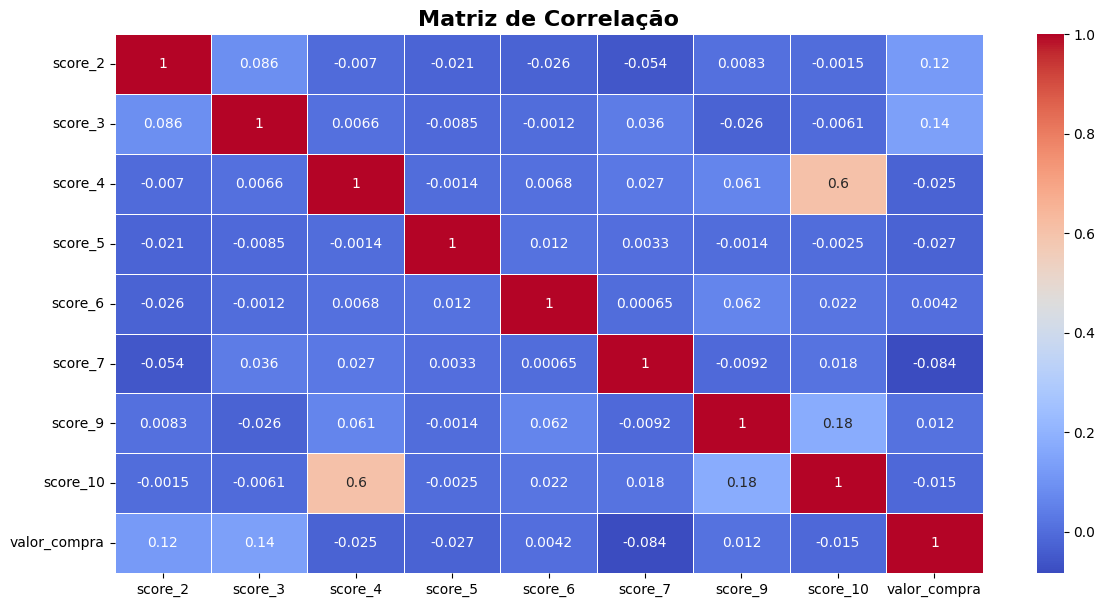

In [172]:
X = df_model[['score_2', 'score_3', 'score_4', 'score_5', 'score_6',
       'score_7', 'score_9', 'score_10', 'valor_compra']]

# Calculando a matriz de correlação
correlation_matrix = X.corr()

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Criando o mapa de calor para a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adicionando título ao gráfico
plt.title('Matriz de Correlação', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()

In [173]:
# Adicione uma constante aos dados
X = sm.add_constant(X)

# Calcule o VIF para cada variável
vif = pd.DataFrame()
vif['Variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exclue a constante da tabela de VIF
vif = vif[vif['Variável'] != 'const']
vif

Variável       VIF
1       score_2  1.023946
2       score_3  1.028922
3       score_4  1.583367
4       score_5  1.001214
5       score_6  1.004913
6       score_7  1.012361
7       score_9  1.041070
8      score_10  1.627878
9  valor_compra  1.042091

Todos os VIFs estão abaixo de 5, o que sugere que não há multicolinearidade problemática entre as variáveis.

## 4.4 - Particionamento dos Dados

É necessário dividir o dataframe em conjuntos de treinamento, teste e validação para avaliar e ajustar o desempenho do modelo, evitar overfitting e otimizar hiperparâmetros. Essa prática é essencial para criar modelos de Machine Learning confiáveis e com capacidade de generalização

In [174]:
# Semente aleatoria
SEED = 10

df_train, df_test = train_test_split(df_model, test_size=0.2, stratify = df_model['fraude'],
                                     random_state = SEED)

In [175]:
# Conlunto de Treino
X_train = df_train.drop('fraude', axis=1)
y_train = df_train['fraude']

# Conjunto de teste
X_test = df_test.drop('fraude', axis=1)
y_test = df_test['fraude']

In [176]:
# Verificando os tamanhos dos conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89302, 17), (22326, 17), (89302,), (22326,))

## 4.5 - Regressão Logistica - Seleção de variáveis

In [177]:
# Treinando o modelo de Regressão Logística com statsmodels
logit_model = sm.Logit(y_train, X_train).fit()

# Resumo do modelo com os p-valores
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.181810
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 fraude   No. Observations:                89302
Model:                          Logit   Df Residuals:                    89285
Method:                           MLE   Df Model:                           16
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                  0.1487
Time:                        05:31:53   Log-Likelihood:                -16236.
converged:                       True   LL-Null:                       -19072.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
score_1              -0.2766      0.016    -17.506      0.000      -0.308      -0.246
score_2              -0.7282      0.097     -7.525      0.000      -0.918      -0.539
score_3           -5.185e-08   1.83e-08     -2.828      0.005   -8.78e-08   -1.59e-08
score_4              -0.0061      0.001     -5.234      0.000      -0.008      -0.004
score_5              -0.0449      0.024     -1.901      0.057      -0.091       0.001
score_6              -0.0015      0.000     -4.080      0.000      -0.002      -0.001
score_7              -0.0076      0.001     -6.262      0.000      -0.010      -0.005
score_9              -0.0002   1.28e-05    -15.658      0.000      -0.000      -0.000
score_10             -0.0006   9.36e-05     -6.423      0.000      -0.001      -0.000
categoria_produto     9.1139      0.223     40.789      0.000       8.676       9.552
entrega_doc_1        -1.0865      0.043    -25.466      0.000      -1.170      -1.003
entrega_doc_2         0.9469      0.040     23.653      0.000       0.868       1.025
entrega_doc_3        -0.2218      0.048     -4.616      0.000      -0.316      -0.128
dia_da_semana        -0.0224      0.008     -2.952      0.003      -0.037      -0.008
dia_do_mes           -0.0037      0.002     -1.794      0.073      -0.008       0.000
hora                 -0.0194      0.003     -6.757      0.000      -0.025      -0.014
valor_compra          0.0013      0.000     10.544      0.000       0.001       0.002
=====================================================================================
"""

* p < 0.05: A maioria das variáveis apresenta p-valores menores que 0.05, indicando que são estatisticamente significativas. Isso significa que essas variáveis têm um efeito significativo sobre a probabilidade de ocorrência de fraude.

* p >= 0.05: A variável score_5, dia_da_semana e dia_do_mes possuem p-valores acima de 0.05, sugerindo que não são estatisticamente significativas no modelo, ou seja, não influenciam fortemente a probabilidade de fraude.

In [178]:
# Definindo as variáveis a serem removidas
variaveis_remover = ['score_5', 'dia_do_mes']

# Removendo as variáveis dos conjuntos de treino e teste
X_train = X_train.drop(columns=variaveis_remover)
X_test = X_test.drop(columns=variaveis_remover)

In [179]:
# Treinando o modelo de Regressão Logística com statsmodels
logit_model = sm.Logit(y_train, X_train).fit()

# Resumo do modelo com os p-valores
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.181859
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 fraude   No. Observations:                89302
Model:                          Logit   Df Residuals:                    89287
Method:                           MLE   Df Model:                           14
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                  0.1485
Time:                        05:31:54   Log-Likelihood:                -16240.
converged:                       True   LL-Null:                       -19072.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
score_1              -0.2822      0.016    -18.092      0.000      -0.313      -0.252
score_2              -0.7752      0.093     -8.328      0.000      -0.958      -0.593
score_3           -5.241e-08   1.83e-08     -2.860      0.004   -8.83e-08   -1.65e-08
score_4              -0.0061      0.001     -5.262      0.000      -0.008      -0.004
score_6              -0.0015      0.000     -4.136      0.000      -0.002      -0.001
score_7              -0.0077      0.001     -6.325      0.000      -0.010      -0.005
score_9              -0.0002   1.28e-05    -15.635      0.000      -0.000      -0.000
score_10             -0.0006   9.36e-05     -6.413      0.000      -0.001      -0.000
categoria_produto     9.0658      0.223     40.686      0.000       8.629       9.502
entrega_doc_1        -1.0873      0.043    -25.503      0.000      -1.171      -1.004
entrega_doc_2         0.9475      0.040     23.672      0.000       0.869       1.026
entrega_doc_3        -0.2220      0.048     -4.619      0.000      -0.316      -0.128
dia_da_semana        -0.0225      0.008     -2.967      0.003      -0.037      -0.008
hora                 -0.0197      0.003     -6.902      0.000      -0.025      -0.014
valor_compra          0.0013      0.000     10.806      0.000       0.001       0.002
=====================================================================================
"""

Agora todas as variaveis apresentam p_valor < 0.05. Portanto, são estatisticamente significativas.

## 4.6 - Random Forest - Feature importances

In [180]:
# Treinando um modelo de Random Forest
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

# Importância das features
importances = pd.Series(model.feature_importances_, index=X_train.columns)
# Limite para selecionar features importantes
important_features = importances[importances > 0.01]

# Selecionando apenas as features importantes
X_train_reduced = X_train[important_features.index]
X_test_reduced = X_test[important_features.index]

important_features

score_1              0.017425
score_2              0.099700
score_3              0.105013
score_4              0.053750
score_6              0.053647
score_7              0.073755
score_9              0.106188
score_10             0.089808
categoria_produto    0.139934
entrega_doc_1        0.013665
dia_da_semana        0.044454
hora                 0.074166
valor_compra         0.109806
dtype: float64

## 4.7 - Seleção dos algoritmos de Machine Learning

[LightGBM] [Info] Number of positive: 3918, number of negative: 67523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1936
[LightGBM] [Info] Number of data points in the train set: 71441, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.054842 -> initscore=-2.846887
[LightGBM] [Info] Start training from score -2.846887
[LightGBM] [Info] Number of positive: 3957, number of negative: 67484
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1936
[LightGBM] [Info] Number of data points in the train set: 71441, number of used features: 15
[LightGBM] [Info] [b

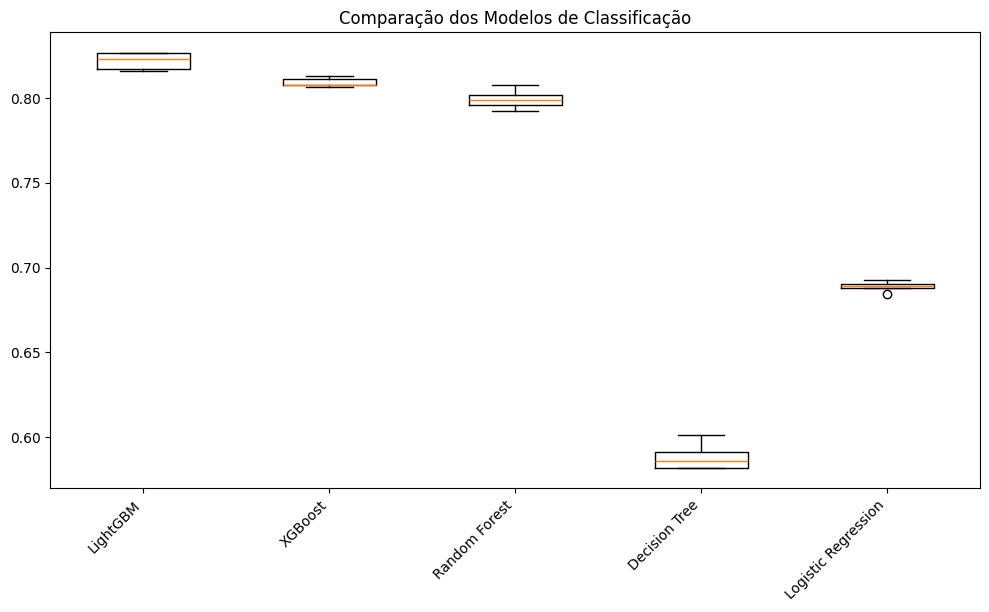

In [181]:
SEED = 10

# Definindo os modelos
LGB = LGBMClassifier(random_state=SEED)
XGB = XGBClassifier(random_state=SEED)
RDF = RandomForestClassifier(random_state=SEED)
DTC = DecisionTreeClassifier(random_state=SEED)
LR = LogisticRegression(random_state=SEED)

# Modelos que serão usados
models = [LGB, XGB, RDF, DTC, LR]

# Nome dos modelos que serão usados
model_names = ["LightGBM", "XGBoost", "Random Forest", "Decision Tree", "Logistic Regression"]

results = []

# Treino dos modelos
for item in models:
    kfold = KFold(n_splits=5, random_state=SEED, shuffle=True)
    cv_results = cross_val_score(item, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    msg = "%s: %f (%f)" % (model_names[models.index(item)], cv_results.mean(), cv_results.std())
    print(msg)

# Plot comparação dos modelos
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(results)
ax.set_xticklabels(model_names)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.title('Comparação dos Modelos de Classificação')
plt.show()

* *LightGBM*: Apresenta a maior mediana de performance entre todos os modelos, o que o torna uma escolha forte. Sua variabilidade é relativamente baixa, indicando resultados consistentes.

* *XGBoost*: Também apresenta uma boa performance, com uma mediana ligeiramente inferior ao LightGBM, mas ainda é um modelo competitivo com boa consistência.

* *Random Forest*: Tem uma mediana alta, próxima ao LightGBM, com variabilidade baixa. É um modelo robusto e confiável para essa tarefa.

* *Decision Tree*: Apresenta a menor mediana de performance e maior variabilidade, o que sugere que este modelo pode não ser tão eficaz quanto os outros para essa tarefa específica.

* *Logistic Regression*: Tem uma performance intermediária, com variabilidade baixa. É uma boa escolha se você busca simplicidade e interpretabilidade, embora não seja tão performático quanto LightGBM ou Random Forest.

A Regressão Logística pode não ter apresentado um desempenho ideal devido à presença de outliers nas variáveis, tendo em vista que se trata de um modelo sensível a outliers nas variáveis independentes.

## 4.7 - Treino do modelo LightGBM

Em nosso modelos, iremos usar o MLflow que é uma ferramenta para gerenciar o ciclo de vida do modelo de Machine Learning. Usar MLflow traz muitas vantagens, começando pela experimentação organizada. Usando o MLflow, podemos rastrear diferentes experimentos, armazenando informações detalhadas sobre parâmetros, métricas e modelos usados, facilitando a comparação e a reprodução dos resultados.

Além disso, ele simplifica o gerenciamento de modelos. Tornando possivel registrar os modelos de forma centralizada, que facilita o acesso e o versionamento. Sendo crucial em equipes de data science, onde múltiplas iterações de modelos são criadas e testadas.

Outra vantagem é a facilidade de implantação. O MLflow oferece suporte a diferentes ambientes de implantação, tornando simples mover um modelo do ambiente de desenvolvimento para produção. Agilizando o processo de entrega de modelos de aprendizado de máquina e permitindo uma atualização contínua.

Por fim, o MLflow é altamente escalável e pode ser integrado com várias ferramentas e frameworks de Machine Learning. Podendo garantir que se possa utilizá-lo independentemente da stack tecnológica que estiver usando, mantendo flexibilidade e adaptabilidade.

In [303]:
# Definindo os hiperparametros
params = {
    'num_leaves': [50, 80, 100, 125],
    'max_depth': [15, 18, 20],
    'learning_rate': [0.01, 0.025, 0.05],
    'n_estimators': [200, 210, 215, 220],
    'min_child_samples': [25, 30, 35, 40],
    'min_child_weight': [1e-5, 1e-3, 1e-2, 0.1],
    'subsample': [0.8, 0.9, 1, 1.1],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.001, 0.01, 0.1],
    'reg_lambda': [0, 0.001, 0.01, 0.1],
    'boosting_type': ['gbdt', 'dart']
}

# Criando o modelo
lgb = LGBMClassifier(class_weight='balanced', random_state=SEED, verbose_eval=False)
# Criando a validação cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [313]:
# Definindo os hiperparametros
params = {
    'num_leaves': [80],
    'max_depth': [18],
    'learning_rate': [0.025],
    'n_estimators': [210],
    'min_child_samples': [30],
    'min_child_weight': [0.01],
    'subsample': [0.9],
    'colsample_bytree': [0.6],
    'reg_alpha': [0],
    'reg_lambda': [0.001],
    'boosting_type': ['gbdt']
}

# Criando o modelo
lgb = LGBMClassifier(class_weight='balanced', random_state=SEED, verbose_eval=False)
# Criando a validação cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [ ]:
mlflow.start_run(run_name="Treinamento_LightGBM_Hiperparametros")
# Executando RandomizedSearchCV
random_search = RandomizedSearchCV(lgb, param_distributions=params, scoring='roc_auc', cv=kf.split(X_train, y_train), n_iter=100)
random_search.fit(X_train, y_train)
    
# Previsões no conjunto de teste
y_pred = random_search.predict(X_test)
y_pred_proba = random_search.predict_proba(X_test)[:, 1]
    
# Calculando métricas
auc_roc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
    
# Registrando parâmetros, métricas e modelo no MLflow
mlflow.log_params(random_search.best_params_)
mlflow.log_metric("AUC-ROC", auc_roc)
mlflow.log_metric("Accuracy", accuracy)
mlflow.log_metric("Precision", precision)
mlflow.log_metric("Recall", recall)
mlflow.log_metric("F1-Score", f1)
mlflow.sklearn.log_model(random_search.best_estimator_, "model")
    
# Exibindo resultados
print(f"Best parameter (CV score=%0.3f):" % random_search.best_score_)
print(random_search.best_params_)

## 4.8 - Avaliação do modelo

In [315]:
# Selecionando o melhor modelo encontrado
modelo = random_search.best_estimator_

# Fazendo as predições e calculando as probabilidades para os dados de teste
y_test_pred = modelo.predict(X_test)
probs_test = modelo.predict_proba(X_test)

# Criando um novo dataframe com os dados de teste, a variável resposta e a coluna de predição
df_lgb = df_test.copy()
df_lgb['col_alvo'] = df_lgb['fraude']
df_lgb['col_pred'] = probs_test[:, 1]

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] Unknown parameter: verbose_eval


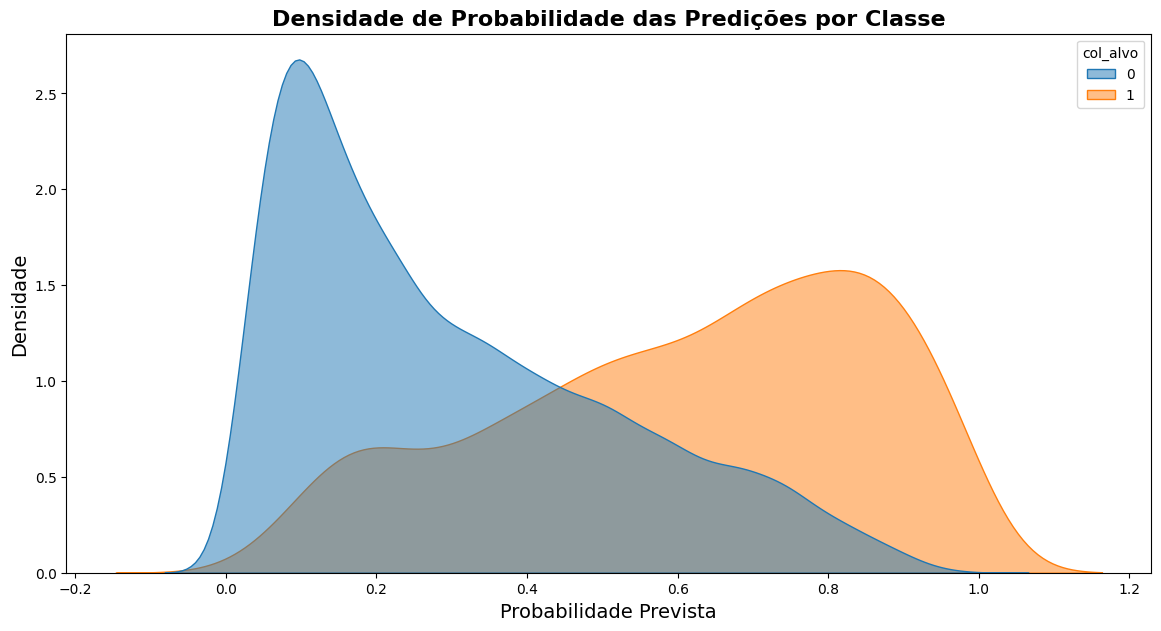

In [316]:
# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Gráfico de densidade para as probabilidades previstas (col_pred) por classe (col_alvo)
sns.kdeplot(data=df_lgb, x='col_pred', hue='col_alvo', fill=True, common_norm=False, alpha=0.5)

# Adicionando título e rótulos ao gráfico
plt.title('Densidade de Probabilidade das Predições por Classe', fontsize=16, fontweight='bold')
plt.xlabel('Probabilidade Prevista', fontsize=14)
plt.ylabel('Densidade', fontsize=14)

# Exibindo o gráfico
plt.show()

* Diferenciação das Classes: A classe 0 (não fraudulenta) mostra uma alta densidade de probabilidades previstas concentradas entre 0 e 0.4, enquanto a classe 1 (fraudulenta) tem alta densidade entre 0.5 e 0.9. Isso indica que o modelo está conseguindo distinguir razoavelmente bem entre as classes.

* Sobreposição de Probabilidades: Há uma área de sobreposição significativa entre 0.4 e 0.6, onde as probabilidades previstas para fraudes e não fraudes se misturam. Isso sugere que o modelo pode enfrentar dificuldades em classificar transações dentro dessa faixa de probabilidade, levando a falsos positivos e falsos negativos.

* Áreas de Incerteza: A sobreposição de densidades reflete áreas de incerteza, onde o modelo não é tão preciso. Essas áreas podem requerer análise mais detalhada ou ajustes no limiar de decisão para melhorar a acurácia das previsões.

* Distribuição Geral: A separação geral das densidades indica que o modelo tem uma boa base para distinguir fraudes de não fraudes, mas há espaço para melhorias, especialmente nas áreas de sobreposição.

In [317]:
df_lgb['col_pred'] = probs_test[:,1]*100

# Criar uma lista vazia para armazenar as métricas
metricas = []

# Iterar sobre os possíveis valores de threshold de 0 a 100
for threshold in range(1, 100, 1):
  # Chamar a função calcular_metricas para o threshold atual
  perda, faturamento, lucro = calcular_valores(threshold, df_lgb, 'col_pred')

  # Adicionar as métricas como uma lista à lista metricas
  metricas.append([threshold, perda, faturamento, lucro])

# Criar um dataframe a partir da lista metricas
df_thres = pd.DataFrame(metricas, columns=["threshold", "perda", "faturamento", "lucro"])

# Imprimir o dataframe
df_thres

threshold     perda  faturamento     lucro
0           1      0.00        6.824     6.824
1           2      0.00      349.280   349.280
2           3      0.00     1163.986  1163.986
3           4     49.07     2036.309  1987.239
4           5     52.00     3086.707  3034.707
..        ...       ...          ...       ...
94         95  76115.56    76233.729   118.169
95         96  76646.66    76443.360  -203.300
96         97  79163.31    76517.407 -2645.903
97         98  79525.76    76520.999 -3004.761
98         99  79681.44    76520.999 -3160.441

[99 rows x 4 columns]

In [318]:
# Encontrar o índice do threshold que tem o maior valor de lucro
indice_max = df_thres["lucro"].idxmax()

# Selecionar a linha do dataframe que corresponde ao índice máximo
linha_max = df_thres.iloc[indice_max]
threshold_otimo = linha_max[0]
linha_max

threshold         59.000
perda          20134.510
faturamento    57073.044
lucro          36938.534
Name: 58, dtype: float64

In [319]:
lucro = round(linha_max[3]/linha_max[2],2)
print(f'Taxa de lucro: {lucro}')

Taxa de lucro: 0.65


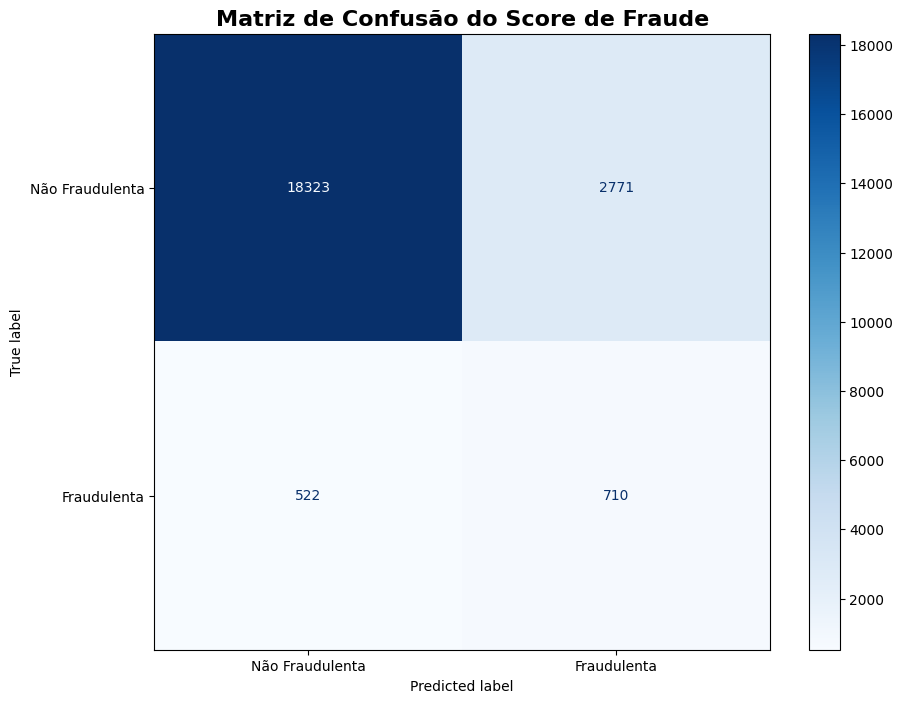

In [320]:
# Criar a coluna pred_fraude
df_lgb['pred_fraude'] = np.where(df_lgb['col_pred'] >= threshold_otimo, 1, 0)

# Usar a função confusion_matrix
cf_matrix = confusion_matrix(df_lgb['col_alvo'], df_lgb['pred_fraude'])

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(10, 8))

# Exibindo a matriz de confusão com valores formatados
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=['Não Fraudulenta', 'Fraudulenta'])
disp.plot(cmap='Blues', ax=plt.gca(), values_format='d')

# Adicionando título ao gráfico
plt.title('Matriz de Confusão do Score de Fraude', fontsize=16, fontweight='bold')

# Exibindo o gráfico
plt.show()

In [321]:
# Extraindo valores da matriz de confusão
true_negatives = cf_matrix[0, 0]
false_positives = cf_matrix[0, 1]
false_negatives = cf_matrix[1, 0]
true_positives = cf_matrix[1, 1]

# Calculando a taxa de fraude
total_transacoes = true_negatives + false_positives + false_negatives + true_positives
taxa_fraude = (false_negatives) / total_transacoes * 100

# Calculando a taxa de aprovação
taxa_aprovacao = (true_negatives + true_positives) / total_transacoes * 100

print(f"Taxa de fraude: {taxa_fraude:.2f}%")
print(f"Taxa de aprovação: {taxa_aprovacao:.2f}%")

Taxa de fraude: 2.34%
Taxa de aprovação: 85.25%


A Taxa de fraude aumentou 0.8% em relação ao modelo atual, mas em relação a taxa de aprovação, aumentamos de 79% para 84.5%.

* Eficiência em Reconhecer Transações Legítimas: O Modelo LGBM tem melhor performance (TN) com 1089 transações legítimas a mais corretamente classificadas do que o Modelo Atual.

* Transtornos para Usuários Legítimos: O Modelo LGBM também se sai melhor em termos de falsos positivos (FP), com 1163 menos transações legítimas incorretamente classificadas.

* Risco de Fraude: Embora o Modelo Atual detecte mais fraudes (TP) com 80 transações a mais identificadas corretamente, ele também deixa passar menos fraudes (FN), com 154 fraudes a menos não detectadas do que o Modelo LGBM.

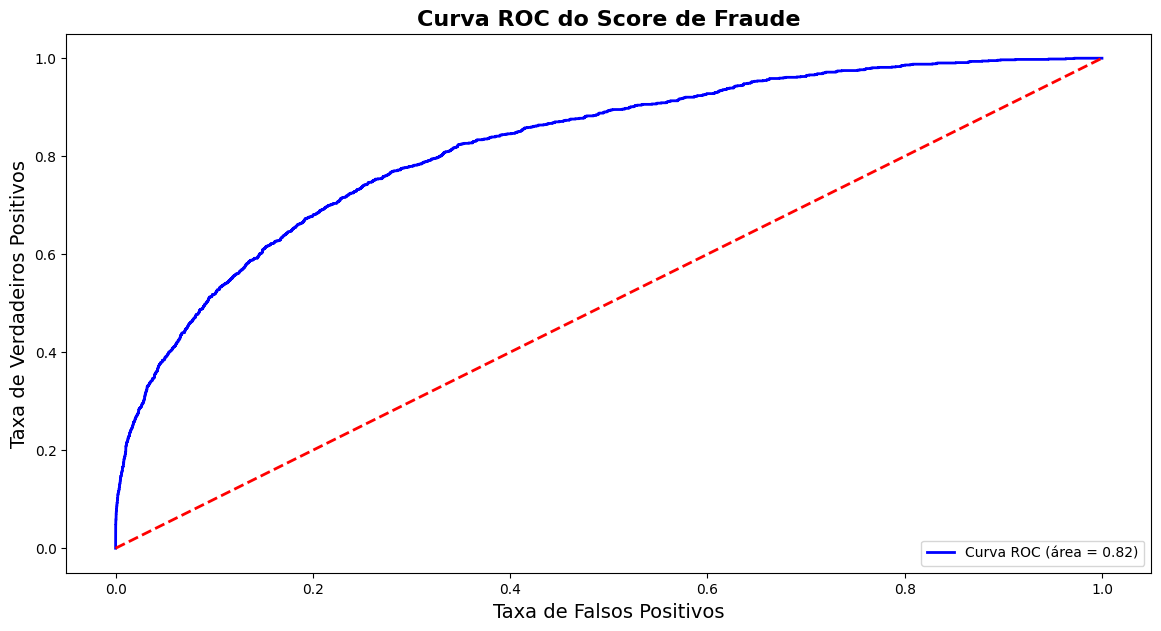

In [322]:
# Calcular as probabilidades de predição
y_pred_prob = df_lgb['col_pred']

# Calcular os valores da curva ROC
fpr, tpr, thresholds = roc_curve(df_lgb['col_alvo'], y_pred_prob)

# Calcular a AUC (Área Sob a Curva)
roc_auc = auc(fpr, tpr)

# Configurando o tamanho da figura do gráfico
plt.figure(figsize=(14, 7))

# Plotando a curva ROC
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)

# Adicionando linha diagonal indicando aleatoriedade
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Adicionando título e rótulos
plt.title('Curva ROC do Score de Fraude', fontsize=16, fontweight='bold')
plt.xlabel('Taxa de Falsos Positivos', fontsize=14)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=14)
plt.legend(loc="lower right")

# Exibindo o gráfico
plt.show()

Houve uma melhoria na curva ROC, de 0.78 do modelo atual para 0.82 no modelo treinado com LGBM, sendo bastante significativa. Uma área sob a curva (AUC) de 0.78 já indica um bom desempenho do modelo, mas subir para 0.82 mostra que o modelo agora é ainda mais eficaz em distinguir entre classes fraudulentas e não fraudulentas. Esse ganho pode resultar em uma detecção de fraudes mais precisa, reduzindo falsos positivos e falsos negativos, o que é crucial para minimizar prejuízos e aumentar a confiança no sistema.

In [323]:
# Binarizar a coluna de predições
df_lgb['pred_fraude'] = np.where(df_lgb['col_pred'] >= threshold_otimo, 1, 0)

# Usando a função classification_report
print(classification_report(df_lgb['col_alvo'], df_lgb['pred_fraude']))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     21094
           1       0.20      0.58      0.30      1232

    accuracy                           0.85     22326
   macro avg       0.59      0.72      0.61     22326
weighted avg       0.93      0.85      0.88     22326



1. Classe 0 (Não Fraudulenta):

    * Alta precisão (0.97) e f1-score (0.92), mas recall menor (0.87). Isso significa que o modelo é muito bom em identificar transações não fraudulentas, mas algumas fraudes ainda podem ser classificadas como não fraudulentas (falsos negativos).

2. Classe 1 (Fraudulenta):

    * Baixa precisão (0.20) e f1-score (0.30), mas recall relativamente alto (0.58). O modelo está identificando mais fraudes corretamente (maior recall), mas com muitas falsas fraudes (falsos positivos), diminuindo a precisão.

3. Acurácia Geral:

    * Com 0.85, o modelo tem uma boa acurácia geral, mas isso é principalmente devido ao grande número de transações não fraudulentas.

Comparando com o Modelo Atual

1. Melhoria Geral na Acurácia:

    * O modelo com LGBM mostra uma melhora na acurácia geral, passando de 0.80 para 0.85.

2. Performance para Transações Não Fraudulentas:

    * Precision e F1-Score são ligeiramente menores no LGBM, mas o Recall é significativamente maior (0.87 vs. 0.81). Isso indica que o modelo LGBM é melhor em capturar transações não fraudulentas, resultando em menos falsos negativos.

3. Detecção de Fraudes:

    * Precision e F1-Score para fraudes aumentaram no LGBM (precision: 0.20 vs. 0.16, f1-score: 0.30 vs. 0.26), embora o Recall tenha caído um pouco (0.58 vs. 0.69). Aumentar a precisão e o F1-score sugere que o modelo está melhor em reduzir falsos positivos, mas o trade-off é uma leve diminuição no recall, o que significa um leve aumento em falsos negativos.

In [324]:
# Registrando outras métricas
mlflow.log_metric("threshold", linha_max[0])
mlflow.log_metric("perda", linha_max[1])
mlflow.log_metric("faturamento", linha_max[2])
mlflow.log_metric("lucro", linha_max[3])
mlflow.log_metric("taxa_de_lucro", lucro)
mlflow.log_metric("taxa_de_fraude", taxa_fraude)
mlflow.log_metric("taxa_de_aprovacao", taxa_aprovacao)
mlflow.log_metric("Roc-Auc", roc_auc)

# Finalizando a run
mlflow.end_run()